# Rudarenje podataka

### Uvod

U ovoj skripti ćemo dati kratki pregled teme rudarenja podataka. Rudarenje podataka, ili analiza podataka se danas sve češće spominje, kako u akademskim krugovima, tako i u poslovnom svijetu. Svakog dana nastaju ogromne količine podataka, vlasnici podataka sve više prepoznaju njihovu važnost i značenje. U znanosti se uglavnom koriste razne numeričke metode za znanstvena računanja, dok se u poslovnom svijetu zadnjih godina sve više koriste razna data warehouse i data lake rješenja, te razni BI ili BO alati za obradu i analizu podataka. 

Često se pitanje obrade ili analize podataka svodi na razne poglede vezano za sami proces. No nekako bi se pojednostavljeno moglo reći da se pitanje rudarenja podataka može svesti na dva smjera: deskriptivna analiza podataka i prediktivna analiza podataka. Puno češće se susrećemo s deskriptivnom obradom podataka nego li s prediktivnom. 

Stoga ćemo kroz ovu kratku skriptu dati mali uvod obradu podataka korištenjem python jezika. Python se zadnji godina promovirao u jedan od najbrže rastućih alata za obradu i analizu podataka. Njegovi razni dodaci, brzina učenja korištenja pythona, te sve veća zajednica koju okuplja, doveli su do toga da python pomalo preuzima vodeće mjesto u svijetu rudarenja podataka. Zadnjih godinu dana je među najtraženijima u Google tražilici.

Kroz skriptu ćemo proći neka tri poglavlja:
1. Obrada podataka
2. Vizualiziranje podataka
3. Statistička analiza podataka

Ukratko, ova skripta je jako kratki uvod i pregled alata koji se mogu koristiti za obradu i analizu podataka.

### 1. Obrada podataka

Kod analize podataka, ili rudarenja podataka, proces obrade podataka je često najzahtjevniji i uzima najviše vremena. 
Iskustvo govori da kod analize podataka do 80% vremena uzme upravo obrada podataka. A sama analiza podataka uglavnom 
uzima puno manje vremena.
Zašto je tome tako? Pa prvenstveno jer svaki data set koji koristimo je uglavnom punilo više korisnika, često većina
njih unosi i krive zapise, krive formate ili jednostavno unesu samo djelomične podatke. Nadalje, stroj koji skuplja podatke može imati bugove pri čemu neke unose zapiše totalno neočekivano itd.
Stoga je svakako prije bilo kakve analize podataka važno pregledati podatke, provjeriti njihovu konzistentnost i očistiti ih. Jednom riječju podatke treba pripremiti i srediti prije same analize. Python je za taj postupak jako dobar alat, često ima već gotove objekte i funkcije koji riješavanju najčešće probleme kod nekog zapisa podataka.
Jedna odlična stvar kod Python jezika je to što ima jako zanimljive i fleksibilne strukture podataka i za njih gotove funkcije i objekte kako bi se s tim strukturama jako jednostavno upravljalo i ažuriralo. Stoga ćemo se u nastavku upoznati s tim osnovim značajkama Python jezika  obradi podataka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

U Pandas i Nupmy imamo nekoliko metoda za "skladištenje" podataka. Npr. Array, Series, DataFrame, Set itd.

In [2]:
vektor = pd.Series([10,20,30,40,50,60])
vektor

0    10
1    20
2    30
3    40
4    50
5    60
dtype: int64

In [3]:
vek = np.array([2.5,8,15,25,5.7])
vek

array([ 2.5,  8. , 15. , 25. ,  5.7])

In [4]:
vektor.values

array([10, 20, 30, 40, 50, 60], dtype=int64)

In [5]:
vektor.index

RangeIndex(start=0, stop=6, step=1)

U ovom primjeru vidimo da je ustvari Series u Pandas neki oblik array u Numpy. Kod Series se jedino stvaraju indexi s kojima se može pristupati elementima. Ti indexi su ovdje definirani kao integeri, rednim brojevima, no možemo ih mi i sami definirati svojim nazivima.

In [6]:
vektor=pd.Series([10,20,30,40,50,60], index=['Josip','Dalibor','Petar','Marko','Ivan','Igor'])

In [7]:
vektor

Josip      10
Dalibor    20
Petar      30
Marko      40
Ivan       50
Igor       60
dtype: int64

In [8]:
vektor['Ivan']

50

Također možemo dati i naziv indexu.

In [9]:
vektor.name='ocjene učenika'
vektor.index.name='učenici'

In [10]:
vektor

učenici
Josip      10
Dalibor    20
Petar      30
Marko      40
Ivan       50
Igor       60
Name: ocjene učenika, dtype: int64

U Numpy također imamo još neke zanimljive strukture za spremanje podataka.

In [11]:
matrica = np.array([[2,3,4],[5,9,15],[4,7,2]])
tenzor = np.array([[[10, 20, 30], [5, 15, 25]], [[12, 4, 3], [-2, -8, -15]]], dtype=np.int8)
matrica
tenzor

array([[[ 10,  20,  30],
        [  5,  15,  25]],

       [[ 12,   4,   3],
        [ -2,  -8, -15]]], dtype=int8)

In [12]:
vektor.dtype
vek.dtype
matrica.dtype
tenzor.dtype

dtype('int8')

In [13]:
np.diag([1,1,1,1])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [14]:
np.array([[2,2,2,1],[1,2,3,5],[2,5,7,3],[2,7,9,9]]) + np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

array([[2, 2, 2, 2],
       [1, 2, 4, 5],
       [2, 6, 7, 3],
       [3, 7, 9, 9]])

In [15]:
np.array([[2,2,2,1],[1,2,3,5],[2,5,7,3],[2,7,9,9]]) + np.diag([1,1,1,1])

array([[ 3,  2,  2,  1],
       [ 1,  3,  3,  5],
       [ 2,  5,  8,  3],
       [ 2,  7,  9, 10]])

Vidimo u prethodnim primjerima da s listama i matricama možemo raditi sve one standardne operacije koje smo navikli raditi s matricama.

Također ćemo na idućem primjeru pokazati jednostavne načine korištenja algoritama iz numeričke analize podataka kod rješavanja sustava AX = b

Znamo da će neki sustav AX = B imati rješenje samo ako je matrica A regularna, tj. ako je determinanta različita od 0.

In [21]:
from numpy import linalg as lg
A = np.random.rand(5,5)
b = np.random.rand(5)
if lg.det(A) != 0:
    x = np.dot(lg.inv(A),b)
    norma = lg.norm(b - np.dot(A,x))
print(norma)

3.396629320202206e-15


Za izračunati $x$ egzaktno rješavamo sustav $Ax=b+\delta b$, gdje je $\dfrac{||\delta b||}{||b||} \lessapprox 2\cdot 10^{-15}$. 

Još neke  metode za riješavaje sustava su *cg, gmres, bicg*

In [26]:
import scipy.sparse.linalg as spla
x, metoda = spla.cg(A,b,tol=1e-10, M=lg.inv(A))
print('Razlika između x i aprkosimacije za cg metodu:{}, info:{}'.format(lg.norm(b - A@x), metoda))

Razlika između x i aprkosimacije za cg metodu:6.334355064991693e-15, info:0


In [27]:
x, metoda = spla.gmres(A,b,tol=1e-10)
print('Razlika između x i aprkosimacije za gmres metodu:{}, info:{}'.format(lg.norm(b - A@x), metoda))
x, success = spla.bicg(A,b,tol=1e-10)
print('Razlika između x i aprkosimacije za bicg metodu:{}, info:{}'.format(lg.norm(b - A@x), metoda))

Razlika između x i aprkosimacije za gmres metodu:3.5457679953657254e-15, info:0
Razlika između x i aprkosimacije za bicg metodu:1.306532040773996e-13, info:0


Vidimo da su metode gmres i bicg uredno iskonvergirale, info==0, i da je aproksimacija vrlo blizu egazktnom rješenju. S druge strane, vidimo da je i cg metoda iskonvergirala uz dodatni uvjet, a to je da dodamo jedan argument metodi cg(M=). Tu metodu smo popravili uz *$A^{-1}$*

Kod takvih rješavanja numeričkih problema uz pomoć sustava AX = b često je važno imati na umu i broj iteracija koje se vrše na matricama kako bi znali koliko brzo možemo očekivati rješenje. To budemo napravili s *gmres_count* klasom.

In [28]:
class gmres_count(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        if self._disp:
            print('iter %3i\trk = %s' % (self.niter, str(rk)))

In [29]:
count = gmres_count()
x, podatak = spla.gmres(A, b, callback=count,tol=1e-10)
print(count.niter)

iter   1	rk = 0.6331146481117588
iter   2	rk = 0.5020670841152023
iter   3	rk = 0.4739329314613157
iter   4	rk = 0.3870217913164155
iter   5	rk = 1.5661025510316471e-15
5


Ovdje smo s *callback* argumentom učinili to da u svakom koraku pozovme funkciju i vidimo koliki je broj iteracija. Naravno, sada bi iste objekte, matrice i vektore mogli koristiti i dalje za pronalaženje svojstvenih vrijednosti, metodu potencija i druge algoritme iz numeričke analize podataka. 

Još jedna struktura za spremanje podataka iz Pandas nam je jako zanimljiva. A to je DataFrame. Matrice, liste i vektori su nam dobri objekti za spremanje podataka, no često nam je kod analize podataka potrebna struktura koja je multivarijantna, koja je ustvari niz Series objekata koji svaki od njih ima posebnu vrstu podatka, nešto kao kolone u tablicama koje pronalazimo u Excel i CSV datotekama, ili SQL bazama podataka. Zašto nam je on zanimljiv. Pa upravo zato jer često uvozimo podatke koji su spremljeni i nalaze se u tim tipovima podataka.

In [30]:
pod = pd.DataFrame({'ocjena':[2,3,5,3,1,4,3,3,4,5],
                    'učenik':['Ivan','Marko','Petar','Ines','Darija','Borna','Matea','Zeljko','Josip','Marina'],
                    'predmet':['lat','mat','fiz','prog','mat','eng','fil','log','fil','hrv']})

In [31]:
pod

ocjena predmet  učenik
0       2     lat    Ivan
1       3     mat   Marko
2       5     fiz   Petar
3       3    prog    Ines
4       1     mat  Darija
5       4     eng   Borna
6       3     fil   Matea
7       3     log  Zeljko
8       4     fil   Josip
9       5     hrv  Marina

Ovdje možemo vidjeti da se indeksiraju svi redci, te također možemo vidjeti da je DataFrame automatski sortirao kolone po abecedi, a ne prema redoslijedu unošenja podataka.

In [65]:
pod.columns

Index(['ocjena', 'predmet', 'učenik'], dtype='object')

In [71]:
pod.učenik

0      Ivan
1     Marko
2     Petar
3      Ines
4    Darija
5     Borna
6     Matea
7    Zeljko
8     Josip
9    Marina
Name: učenik, dtype: object

In [72]:
type(pod.učenik)

pandas.core.series.Series

In [73]:
pod = pod.T

In [74]:
pod

0      1      2     3       4      5      6       7      8       9
ocjena      2      3      5     3       1      4      3       3      4       5
predmet   lat    mat    fiz  prog     mat    eng    fil     log    fil     hrv
učenik   Ivan  Marko  Petar  Ines  Darija  Borna  Matea  Zeljko  Josip  Marina

Ovdje smo vidjeli da možemo lako izvlačiti samo jednu kolonu koja nam je potreba, te da možemo transponirati podatke ako želimo.

Jedna stvar na koju trebamo jako paziti je kada izvlačimo neki podatak iz DataFrame da ustvari ne kopiramo podatak, nego ustvari dobivamo samo neki "pogled" na podatak. Za razliku od drugih programiskih jezika, ili SQL kada radimo s bazama klasičnim, svaka promjena koju učinimo na tzv. kopiji ustvari se automatski vidi u izvornim podacima. To trebamo imati na umu.

In [77]:
pod = pod.T

In [78]:
pod

ocjena predmet  učenik
0      2     lat    Ivan
1      3     mat   Marko
2      5     fiz   Petar
3      3    prog    Ines
4      1     mat  Darija
5      4     eng   Borna
6      3     fil   Matea
7      3     log  Zeljko
8      4     fil   Josip
9      5     hrv  Marina

In [80]:
pod2 = pod.učenik
pod2

0      Ivan
1     Marko
2     Petar
3      Ines
4    Darija
5     Borna
6     Matea
7    Zeljko
8     Josip
9    Marina
Name: učenik, dtype: object

In [82]:
pod2[0]='krivo'
pod2

0     krivo
1     Marko
2     Petar
3      Ines
4    Darija
5     Borna
6     Matea
7    Zeljko
8     Josip
9    Marina
Name: učenik, dtype: object

In [83]:
pod

ocjena predmet  učenik
0      2     lat   krivo
1      3     mat   Marko
2      5     fiz   Petar
3      3    prog    Ines
4      1     mat  Darija
5      4     eng   Borna
6      3     fil   Matea
7      3     log  Zeljko
8      4     fil   Josip
9      5     hrv  Marina

Vidimo sada ovdje u 0-tom retku da se *krivo* zamijenilo i u izvornom podatku *pod* a ne samo u *pod2*

In [85]:
pod2[0]='Ivan'
pod

ocjena predmet  učenik
0      2     lat    Ivan
1      3     mat   Marko
2      5     fiz   Petar
3      3    prog    Ines
4      1     mat  Darija
5      4     eng   Borna
6      3     fil   Matea
7      3     log  Zeljko
8      4     fil   Josip
9      5     hrv  Marina

Još jedna stvar koju možemo raditi s DataFrame je jako jednostavno dodavanje novih kolona.

In [98]:
pod['year'] = 2018
pod

ocjena predmet  učenik  year
0      2     lat    Ivan  2018
1      3     mat   Marko  2018
2      5     fiz   Petar  2018
3      3    prog    Ines  2018
4      1     mat  Darija  2018
5      4     eng   Borna  2018
6      3     fil   Matea  2018
7      3     log  Zeljko  2018
8      4     fil   Josip  2018
9      5     hrv  Marina  2018

Još jedna zanimljiva funkcionalnost u Pandasu je funkcija *concat*. S njom se jednostavno dva *dataframe* objekta povežu u jedan.

In [4]:
pod2 = pd.DataFrame({'ocjena':[5,4,5,4,5,4,5,4,5,5],
                    'učenik':['Roko','Damir','Marija','Ines','Vesna','Borna','Tea','Zeljko','Josipa','Matija'],
                    'predmet':['prog','mat','fiz','prog','mat','prog','prog','prog','fil','prog']})
pod2

ocjena predmet  učenik
0       5    prog    Roko
1       4     mat   Damir
2       5     fiz  Marija
3       4    prog    Ines
4       5     mat   Vesna
5       4    prog   Borna
6       5    prog     Tea
7       4    prog  Zeljko
8       5     fil  Josipa
9       5    prog  Matija

In [9]:
frames = [pod,pod2]
pod3 = pd.concat(frames)
pod3

ocjena predmet  učenik
0       2     lat    Ivan
1       3     mat   Marko
2       5     fiz   Petar
3       3    prog    Ines
4       1     mat  Darija
5       4     eng   Borna
6       3     fil   Matea
7       3     log  Zeljko
8       4     fil   Josip
9       5     hrv  Marina
0       5    prog    Roko
1       4     mat   Damir
2       5     fiz  Marija
3       4    prog    Ines
4       5     mat   Vesna
5       4    prog   Borna
6       5    prog     Tea
7       4    prog  Zeljko
8       5     fil  Josipa
9       5    prog  Matija

###### Uvoz podataka

Dalje ćemo obrađivati podatke, no vidjet ćemo sada kako se radi uvoz podataka, te ćemo nastaviti raditi osnovne manipulacije i tzv. čišćenje podataka. Osnovna funkcija za učitavanje podataka iz drugih izvora je *read_csv* ili *read_table*, ovisno što učitavamo. Sa funkcijom *head* možemo velike podatke ispisati samo do određene veličine. Ako stavimo samo *head()* ispisat će prvih 5 redova, ali funkciji možemo zadati koliko redova da ispiše.

In [33]:
df = pd.read_csv("data/micro.csv")
df.head(15)

Taxon  Patient Tissue    Stool
0   Firmicutes        1    632    305.0
1   Firmicutes        2    136   4182.0
2   Firmicutes        3    NaN    703.0
3   Firmicutes        4    408   3946.0
4   Firmicutes        5    831   8605.0
5   Firmicutes        6    693     50.0
6   Firmicutes        7    718    717.0
7   Firmicutes        8    173     33.0
8   Firmicutes        9    228      NaN
9   Firmicutes       10    162   3196.0
10  Firmicutes       11    372 -99999.0
11  Firmicutes       12   4255   4361.0
12  Firmicutes       13    107   1667.0
13  Firmicutes       14      ?    223.0
14  Firmicutes       15    281   2377.0

In [15]:
df['Taxon']

0         Firmicutes
1         Firmicutes
2         Firmicutes
3         Firmicutes
4         Firmicutes
5         Firmicutes
6         Firmicutes
7         Firmicutes
8         Firmicutes
9         Firmicutes
10        Firmicutes
11        Firmicutes
12        Firmicutes
13        Firmicutes
14        Firmicutes
15    Proteobacteria
16    Proteobacteria
17    Proteobacteria
18    Proteobacteria
19    Proteobacteria
20    Proteobacteria
21    Proteobacteria
22    Proteobacteria
23    Proteobacteria
24    Proteobacteria
25    Proteobacteria
26    Proteobacteria
27    Proteobacteria
28    Proteobacteria
29    Proteobacteria
           ...      
45     Bacteroidetes
46     Bacteroidetes
47     Bacteroidetes
48     Bacteroidetes
49     Bacteroidetes
50     Bacteroidetes
51     Bacteroidetes
52     Bacteroidetes
53     Bacteroidetes
54     Bacteroidetes
55     Bacteroidetes
56     Bacteroidetes
57     Bacteroidetes
58     Bacteroidetes
59     Bacteroidetes
60             Other
61           

Kao što smo vidjeli možemo ispisati samo jednu kolonu.
Također s funkcijom *describe* možemo opisati naše podatke. S funkcijom *len()* možemo dobiti dužinu naših podataka.

In [25]:
print("Dužina podataka je:") 
len(df)

Dužina podataka je:


75

In [26]:
df.describe()

Patient         Stool
count  75.000000     74.000000
mean    8.000000   -619.283784
std     4.349588  11801.273013
min     1.000000 -99999.000000
25%     4.000000     12.500000
50%     8.000000     79.500000
75%    12.000000    658.500000
max    15.000000   8605.000000

Na ovaj način isto vidimo da je dužina podataka 75 kod Patient, a kod Stool 74. Dobili smo i kvantile, interkvantile i minimalnu i maksimalnu vrijednost. Također, možemo provjeriti imali li praznih polja, tj polja bez vrijednosti. To provjeravamo s funkcijom *isnull*

In [29]:
df.isnull()

Taxon  Patient  Tissue  Stool
0   False    False   False  False
1   False    False   False  False
2   False    False    True  False
3   False    False   False  False
4   False    False   False  False
5   False    False   False  False
6   False    False   False  False
7   False    False   False  False
8   False    False   False   True
9   False    False   False  False
10  False    False   False  False
11  False    False   False  False
12  False    False   False  False
13  False    False   False  False
14  False    False   False  False
15  False    False   False  False
16  False    False   False  False
17  False    False   False  False
18  False    False   False  False
19  False    False   False  False
20  False    False   False  False
21  False    False   False  False
22  False    False   False  False
23  False    False   False  False
24  False    False   False  False
25  False    False   False  False
26  False    False   False  False
27  False    False   False  False
28  False    False   False  False
29  False    False   False  False
..    ...      ...     ...    ...
45  False    False   False  False
46  False    False   False  False
47  False    False   False  False
48  False    False   False  False
49  False    False   False  False
50  False    False   False  False
51  False    False   False  False
52  False    False   False  False
53  False    False   False  False
54  False    False   False  False
55  False    False   False  False
56  False    False   False  False
57  False    False   False  False
58  False    False   False  False
59  False    False   False  False
60  False    False   False  False
61  False    False   False  False
62  False    False   False  False
63  False    False   False  False
64  False    False   False  False
65  False    False   False  False
66  False    False   False  False
67  False    False   False  False
68  False    False   False  False
69  False    False   False  False
70  False    False   False  False
71  False    False   False  False
72  False    False   False  False
73  False    False   False  False
74  False    False   False  False

[75 rows x 4 columns]

Također, *isnull* funkcionira i kada pretražujemo samo po nekoj koloni.

In [30]:
df.Tissue.isnull()

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
Name: Tissue, Length: 75, dtype: bool

Sa funkcijom *dtypes* možemo dobiti vrste objekata koje se nalaze u *DataFrame*

In [32]:
df.dtypes

Taxon       object
Patient      int64
Tissue      object
Stool      float64
dtype: object

Ovdje vidimo da je *Stool* float tipa, no možemo ga pretvoriti u integer s funkcijom *astype()*

In [50]:
df.Stool = pd.to_numeric(df.Stool, errors="coerce")
df.head(10)
df = df.dropna()

Ovdje je također jako važno paziti da se ne radi samo *df.dropna* jer tada ustvari nećemo ništa napraviti, kao što smo rekli radimo samo po kopiji. Kako bi uistinu izbacili redove s praznim podacima, tj. očistili naš dataset, moramo to napraviti s *df=df.dropna()*

In [48]:
df.Stool.dtypes

dtype('float64')

Sada smo s *dropna* izbacili sve redove koji ne sadržavaju podatak.

In [52]:
df.describe()

Patient         Stool
count  73.000000     73.000000
mean    8.054795   -637.397260
std     4.368099  11881.907862
min     1.000000 -99999.000000
25%     4.000000     12.000000
50%     8.000000     76.000000
75%    12.000000    651.000000
max    15.000000   8605.000000

In [53]:
df.Stool = df.Stool.astype(int)

E:\Documents\Desktop\robert\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [55]:
df.dtypes

Taxon      object
Patient     int64
Tissue     object
Stool       int32
dtype: object

Vidimo sada da je Stool postao int, i nije više float. I to možemo vidjeti u idućem primjeru.

In [56]:
df.head(10)

Taxon  Patient Tissue  Stool
0   Firmicutes        1    632    305
1   Firmicutes        2    136   4182
3   Firmicutes        4    408   3946
4   Firmicutes        5    831   8605
5   Firmicutes        6    693     50
6   Firmicutes        7    718    717
7   Firmicutes        8    173     33
9   Firmicutes       10    162   3196
10  Firmicutes       11    372 -99999
11  Firmicutes       12   4255   4361

Sada ćemo pokazati kako možemo npr. ispuniti sva prazna polja s *Fillna*. Tu smo također koristili i *loc* za pozicioniranje u *Dataframe*

In [34]:
df.loc[2,2]= 10
df.head(10)

Taxon  Patient Tissue   Stool     2
0  Firmicutes        1    632   305.0   NaN
1  Firmicutes        2    136  4182.0   NaN
2  Firmicutes        3    NaN   703.0  10.0
3  Firmicutes        4    408  3946.0   NaN
4  Firmicutes        5    831  8605.0   NaN
5  Firmicutes        6    693    50.0   NaN
6  Firmicutes        7    718   717.0   NaN
7  Firmicutes        8    173    33.0   NaN
8  Firmicutes        9    228     NaN   NaN
9  Firmicutes       10    162  3196.0   NaN

In [35]:
df.fillna(0)

Taxon  Patient Tissue    Stool     2
0       Firmicutes        1    632    305.0   0.0
1       Firmicutes        2    136   4182.0   0.0
2       Firmicutes        3      0    703.0  10.0
3       Firmicutes        4    408   3946.0   0.0
4       Firmicutes        5    831   8605.0   0.0
5       Firmicutes        6    693     50.0   0.0
6       Firmicutes        7    718    717.0   0.0
7       Firmicutes        8    173     33.0   0.0
8       Firmicutes        9    228      0.0   0.0
9       Firmicutes       10    162   3196.0   0.0
10      Firmicutes       11    372 -99999.0   0.0
11      Firmicutes       12   4255   4361.0   0.0
12      Firmicutes       13    107   1667.0   0.0
13      Firmicutes       14      ?    223.0   0.0
14      Firmicutes       15    281   2377.0   0.0
15  Proteobacteria        1   1638   3886.0   0.0
16  Proteobacteria        2   2469   1821.0   0.0
17  Proteobacteria        3    839    661.0   0.0
18  Proteobacteria        4   4414     18.0   0.0
19  Proteobacteria        5  12044     83.0   0.0
20  Proteobacteria        6   2310     12.0   0.0
21  Proteobacteria        7   3053    547.0   0.0
22  Proteobacteria        8    395   2174.0   0.0
23  Proteobacteria        9   2651    767.0   0.0
24  Proteobacteria       10   1195     76.0   0.0
25  Proteobacteria       11   6857    795.0   0.0
26  Proteobacteria       12    483    666.0   0.0
27  Proteobacteria       13   2950   3994.0   0.0
28  Proteobacteria       14   1541    816.0   0.0
29  Proteobacteria       15   1307     53.0   0.0
..             ...      ...    ...      ...   ...
45   Bacteroidetes        1    115    380.0   0.0
46   Bacteroidetes        2     67      0.0   0.0
47   Bacteroidetes        3      0      0.0   0.0
48   Bacteroidetes        4     85      5.0   0.0
49   Bacteroidetes        5    143      7.0   0.0
50   Bacteroidetes        6    678      2.0   0.0
51   Bacteroidetes        7   4829    209.0   0.0
52   Bacteroidetes        8     74    651.0   0.0
53   Bacteroidetes        9    169    254.0   0.0
54   Bacteroidetes       10    106     10.0   0.0
55   Bacteroidetes       11     73    381.0   0.0
56   Bacteroidetes       12     30    359.0   0.0
57   Bacteroidetes       13     51     51.0   0.0
58   Bacteroidetes       14   2473   2314.0   0.0
59   Bacteroidetes       15    102     33.0   0.0
60           Other        1    114    277.0   0.0
61           Other        2    195     18.0   0.0
62           Other        3     42      2.0   0.0
63           Other        4    316     43.0   0.0
64           Other        5    202     40.0   0.0
65           Other        6    116      0.0   0.0
66           Other        7    527     12.0   0.0
67           Other        8    357     11.0   0.0
68           Other        9    106     11.0   0.0
69           Other       10     67     14.0   0.0
70           Other       11    203      6.0   0.0
71           Other       12    392      6.0   0.0
72           Other       13     28     25.0   0.0
73           Other       14     12     22.0   0.0
74           Other       15    305     32.0   0.0

[75 rows x 5 columns]

Ovdje također treba paziti kod toga da je fillna ustvari vratila novi objekt a nije korigirala original.

In [36]:
df.head()

Taxon  Patient Tissue   Stool     2
0  Firmicutes        1    632   305.0   NaN
1  Firmicutes        2    136  4182.0   NaN
2  Firmicutes        3    NaN   703.0  10.0
3  Firmicutes        4    408  3946.0   NaN
4  Firmicutes        5    831  8605.0   NaN

In [37]:
df = df.fillna(0)

In [38]:
df.head()

Taxon  Patient Tissue   Stool     2
0  Firmicutes        1    632   305.0   0.0
1  Firmicutes        2    136  4182.0   0.0
2  Firmicutes        3      0   703.0  10.0
3  Firmicutes        4    408  3946.0   0.0
4  Firmicutes        5    831  8605.0   0.0

Vidimo ovdje da *Nan* nije promjenio u 0 u koloni *Tissue*. Razlog tome je što je to ustvari string koji sam dodao, što pokazuje da je *fillna* zamjenila samo prazna polja u koloni 2.

Još dvije zanimljive funkcije za obradu kolone su *sum* tj. zbroj i *mean* srednja vrijednost.

In [39]:
df.Stool.sum()

-45827.0

In [40]:
df.Stool.mean()

-611.0266666666666

Još jedan izazov koji se često javlja kod obrade podataka je kolona s zabilježenim vremenom. Često su vremena zapisana doslovno u nekoliko desetaka kombinacija. Stoga je vrlo važno kod obrade podataka riješiti i taj izazov.

In [41]:
from datetime import datetime, date, time

In [42]:
trenutno = datetime.now()
trenutno

datetime.datetime(2018, 4, 14, 23, 28, 41, 111417)

In [43]:
trenutno.weekday()

5

Sada ćemo kroz jedan data set koji prati tranzit brodova u USA obraditi vrijeme i datume. U zadnje dvije kolone se nalaze početna vremena kada je brod zabilježen radarom, te završna vremena.

In [44]:
prijelaz = pd.read_csv("data/transit.csv")

In [45]:
prijelaz.head()

mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35

In [46]:
prijelaz.st_time.dtypes

dtype('O')

In [47]:
datetime.strptime(prijelaz.st_time.ix[0], '%m/%d/%y %H:%M')

E:\Documents\Desktop\robert\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


datetime.datetime(2009, 2, 10, 16, 3)

In [48]:
from dateutil.parser import parse
parse(prijelaz.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

Ovdje smo sada vidjeli dvije metode kako preoblikovati format vremena. Jedna metoda je da koristimo metodu *strptime* kojoj ustvari trebamo reći kako izgleda trenutačni oblik. No druga metoda *dateutil* ustvari sama prepoznaje koji je format u kojem je zapisano vrijeme i pretvara ga u *datetime* format

In [49]:
prijelaz.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0       2009-02-10 16:03:00
1       2009-04-06 14:31:00
2       2009-04-06 14:36:00
3       2009-04-10 17:58:00
4       2009-04-10 17:59:00
5       2010-03-20 16:06:00
6       2010-03-20 18:05:00
7       2011-05-04 11:28:00
8       2010-06-05 11:23:00
9       2010-06-08 11:03:00
10      2010-06-14 17:07:00
11      2010-06-17 16:35:00
12      2010-07-11 11:51:00
13      2010-07-12 15:33:00
14      2010-07-20 19:23:00
15      2010-09-10 14:00:00
16      2011-03-14 16:13:00
17      2011-03-18 11:18:00
18      2011-04-25 16:37:00
19      2011-05-14 15:51:00
20      2011-05-19 12:34:00
21      2011-05-23 21:29:00
22      2011-05-25 11:46:00
23      2011-06-01 14:32:00
24      2011-06-07 14:43:00
25      2011-08-08 15:42:00
26      2011-09-06 20:59:00
27      2011-09-08 08:22:00
28      2011-09-12 14:56:00
29      2011-10-25 12:52:00
                ...        
67836   2011-11-05 21:35:00
67837   2011-11-12 08:20:00
67838   2011-11-12 22:35:00
67839   2011-11-19 08:26:00
67840   2011-11-19 2

Ovdje sada vidimo da je *st_time* ustvari postao *datetime* tip podatka. No u Pandas postoji jedna puno jednostavnija metoda koja cijelu kolonu automatski prilagodi i pretvori u *datetime* tip podatka.

In [9]:
prijelaz.dtypes

mmsi            int64
name           object
transit         int64
segment         int64
seg_length    float64
avg_sog       float64
min_sog       float64
max_sog       float64
pdgt10        float64
st_time        object
end_time       object
dtype: object

In [50]:
pd.to_datetime(prijelaz.st_time)

0       2009-02-10 16:03:00
1       2009-04-06 14:31:00
2       2009-04-06 14:36:00
3       2009-04-10 17:58:00
4       2009-04-10 17:59:00
5       2010-03-20 16:06:00
6       2010-03-20 18:05:00
7       2011-05-04 11:28:00
8       2010-06-05 11:23:00
9       2010-06-08 11:03:00
10      2010-06-14 17:07:00
11      2010-06-17 16:35:00
12      2010-07-11 11:51:00
13      2010-07-12 15:33:00
14      2010-07-20 19:23:00
15      2010-09-10 14:00:00
16      2011-03-14 16:13:00
17      2011-03-18 11:18:00
18      2011-04-25 16:37:00
19      2011-05-14 15:51:00
20      2011-05-19 12:34:00
21      2011-05-23 21:29:00
22      2011-05-25 11:46:00
23      2011-06-01 14:32:00
24      2011-06-07 14:43:00
25      2011-08-08 15:42:00
26      2011-09-06 20:59:00
27      2011-09-08 08:22:00
28      2011-09-12 14:56:00
29      2011-10-25 12:52:00
                ...        
67836   2011-11-05 21:35:00
67837   2011-11-12 08:20:00
67838   2011-11-12 22:35:00
67839   2011-11-19 08:26:00
67840   2011-11-19 2

In [11]:
prijelaz.dtypes

mmsi            int64
name           object
transit         int64
segment         int64
seg_length    float64
avg_sog       float64
min_sog       float64
max_sog       float64
pdgt10        float64
st_time        object
end_time       object
dtype: object

In [51]:
prijelaz.st_time = pd.to_datetime(prijelaz.st_time)

In [52]:
prijelaz.dtypes

mmsi                   int64
name                  object
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time              object
dtype: object

Ovdje opet primjetimo da s predzadnjom napredbom nismo ustvari promjenili ništa u data setu nego samo smo dobili promjenjeni view. No u zadnjoj naredbi smo *prijelaz.st_time* dodijelili ustvari novi format, što i vidimo kad pokrenemo naredbu s *dtype*

In [53]:
prijelaz.head()

mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10             st_time       end_time  
0     14.5    96.5 2009-02-10 16:03:00  2/10/09 16:27  
1     20.6   100.0 2009-04-06 14:31:00   4/6/09 15:20  
2     20.5   100.0 2009-04-06 14:36:00   4/6/09 14:55  
3     16.1   100.0 2009-04-10 17:58:00  4/10/09 18:34  
4     16.2   100.0 2009-04-10 17:59:00  4/10/09 18:35

In [54]:
brod = prijelaz.groupby('name')
brod

In [55]:
for name, group in brod:
    print (name)
    print (group)
    print

*histria Perla*
            mmsi             name  transit  segment  seg_length  avg_sog  \
13438  215958000  *histria Perla*        1        1        20.1     10.3   
13439  215958000  *histria Perla*        2        1         7.8      7.1   
13440  215958000  *histria Perla*        3        1        30.4      4.6   
13441  215958000  *histria Perla*        4        1        28.3     10.4   
13442  215958000  *histria Perla*        5        1        13.9     10.7   
13443  215958000  *histria Perla*        6        1        23.2     10.5   
13444  215958000  *histria Perla*        7        1        22.7     11.6   
13445  215958000  *histria Perla*        8        1        21.7     10.3   
13446  215958000  *histria Perla*        9        1         6.7     10.5   
13447  215958000  *histria Perla*       10        1        23.0     11.6   

       min_sog  max_sog  pdgt10             st_time       end_time  
13438      7.3     11.6    76.1 2012-07-17 08:35:00  7/17/12 10:33  
13439    

42636     10.0     0.0 2012-10-11 07:27:00  10/11/12 8:20  
266282000
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
48007  266282000  266282000        2        1         1.2     12.4     12.4   

       max_sog  pdgt10             st_time       end_time  
48007     12.5   100.0 2012-10-10 05:13:00  10/10/12 5:19  
304210000
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
52573  304210000  304210000        1        1         2.6     17.7     17.6   
52576  304210000  304210000        2        1         5.4     18.3     18.1   

       max_sog  pdgt10             st_time        end_time  
52573     17.8   100.0 2012-10-09 17:53:00   10/9/12 18:02  
52576     18.5   100.0 2012-10-23 19:40:00  10/23/12 19:57  
304716000
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
53667  304716000  304716000        1        1         4.0      9.6      9.4   

       max_sog  pdgt10             st_time      end

54284     13.2   100.0 2009-11-19 22:15:00  11/19/09 23:59  
Achilleas
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
29551  241035000  Achilleas        1        1        19.6      7.5      3.8   
29552  241035000  Achilleas        2        1        18.2      9.5      7.1   
29553  241035000  Achilleas        3        1        18.8     13.0      9.9   
29554  241035000  Achilleas        4        1        19.3     11.4      8.8   
29555  241035000  Achilleas        5        1        18.7     14.1      8.3   
29556  241035000  Achilleas        6        1        17.9     10.1      6.1   
29557  241035000  Achilleas        7        1        18.5     14.2     12.3   

       max_sog  pdgt10             st_time       end_time  
29551     12.9     9.9 2010-09-09 06:49:00    9/9/10 9:27  
29552     13.8    44.1 2011-06-28 06:23:00   6/28/11 8:20  
29553     14.3    95.8 2011-06-30 06:51:00   6/30/11 8:18  
29554     13.3    82.9 2011-08-07 13:28:00   8/7/11 15:1

26048      8.1     13.1    98.4 2012-08-22 19:07:00  8/22/12 20:41  
Aegean Myth
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
28462  240517000  Aegean Myth        1        1        87.1     13.5     12.9   

       max_sog  pdgt10             st_time       end_time  
28462     15.1   100.0 2009-05-29 04:48:00  5/29/09 11:06  
Aegean Navigator
            mmsi              name  transit  segment  seg_length  avg_sog  \
28653  240634000  Aegean Navigator        1        1        19.6     11.9   
28654  240634000  Aegean Navigator        2        1         9.3     15.3   
28655  240634000  Aegean Navigator        3        1        22.4     10.5   
28656  240634000  Aegean Navigator        4        1        22.8     14.0   
28657  240634000  Aegean Navigator        5        1        21.9     10.0   
28658  240634000  Aegean Navigator        6        1        18.5      9.8   

       min_sog  max_sog  pdgt10             st_time       end_time  
28653     

            mmsi            name  transit  segment  seg_length  avg_sog  \
66370  311578000  African_spirit        1        1        32.3      2.0   
66371  311578000  African_spirit        2        1        21.6     13.4   
66372  311578000  African_spirit        3        2        19.4     11.8   
66373  311578000  African_spirit        4        1        18.8     14.0   
66374  311578000  African_spirit        5        1        19.8      9.8   
66375  311578000  African_spirit        6        1        18.9     15.2   
66376  311578000  African_spirit        7        1        19.3     10.9   
66377  311578000  African_spirit        8        1        18.9     15.0   
66378  311578000  African_spirit        9        1        23.2      7.3   
66379  311578000  African_spirit       10        1        21.6     12.6   
66380  311578000  African_spirit       11        1        19.9      9.5   
66381  311578000  African_spirit       12        1        18.7     13.4   
66382  311578000  African

10927      8.9     0.0 2011-05-10 04:51:00    5/10/11 5:01  
Al Safliya
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
55878  308171000  Al Safliya        1        1        26.7     10.8      6.7   
55879  308171000  Al Safliya        2        1        28.0     12.0      5.9   

       max_sog  pdgt10             st_time       end_time  
55878     14.3    71.5 2011-07-16 10:01:00  7/16/11 12:32  
55879     14.8    89.4 2011-07-18 00:41:00   7/18/11 3:01  
Al Sayad
       mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
448  642262  Al Sayad        1        1         1.3     10.1      9.7   

     max_sog  pdgt10             st_time       end_time  
448     10.2    55.6 2009-01-18 19:08:00  1/18/09 19:14  
Alaska
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
28282  240472000  Alaska        1        1        19.6      9.9      7.2   
28283  240472000  Alaska        2        1        19.0     11.9      7.8   


            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
234       572329  Alexandra        1        1        21.0     10.2      3.9   
235       572329  Alexandra        2        1        21.1     11.3      0.7   
236       572329  Alexandra        3        1        26.1      7.3      6.6   
237       572329  Alexandra        4        1        27.9      8.1      1.9   
238       572329  Alexandra        5        1        19.7      6.1      5.4   
239       572329  Alexandra        6        1        18.6      5.9      3.9   
240       572329  Alexandra        7        1        20.7     11.6     10.8   
241       572329  Alexandra        8        1        22.2      8.8      6.1   
242       572329  Alexandra        9        1        12.2      8.4      7.6   
243       572329  Alexandra       10        1        27.6     10.6      8.9   
244       572329  Alexandra       11        1        41.4      9.9      7.4   
245       572329  Alexandra       12        1       

53787      7.1     19.1    98.9 2009-09-24 18:13:00  9/24/09 20:12  
Alice Oldendorff
            mmsi              name  transit  segment  seg_length  avg_sog  \
39400  255804980  Alice Oldendorff        1        1        30.0     10.5   
39401  255804980  Alice Oldendorff        2        1        21.8      3.7   
39402  255804980  Alice Oldendorff        3        1        19.8     11.3   
39403  255804980  Alice Oldendorff        4        1        30.3     10.8   
39404  255804980  Alice Oldendorff        5        1        34.1     12.1   
39405  255804980  Alice Oldendorff        6        1        75.2      9.7   
39406  255804980  Alice Oldendorff        7        1        41.6      3.5   
39407  255804980  Alice Oldendorff        8        1        21.2     10.6   
39408  255804980  Alice Oldendorff        9        1        22.4      4.0   
39409  255804980  Alice Oldendorff       10        1        20.8     10.6   
39410  255804980  Alice Oldendorff       11        1        30.5   

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
35535  247276100  Allegra        1        1        26.9     12.1     10.6   
35536  247276100  Allegra        2        1        33.3     14.7     14.1   
35537  247276100  Allegra        3        1        20.5      8.5      5.3   
35538  247276100  Allegra        4        1        23.8      9.3      4.4   

       max_sog  pdgt10             st_time       end_time  
35535     13.0   100.0 2010-04-19 06:40:00   4/19/10 8:55  
35536     15.8   100.0 2010-04-21 11:41:00  4/21/10 13:54  
35537     10.8     6.5 2011-12-05 14:20:00  12/5/11 16:47  
35538     10.8    49.7 2011-12-09 23:40:00  12/10/11 2:11  
Almasi
           mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
4157  210479000  Almasi        1        1        18.7     12.8     10.7   
4158  210479000  Almasi        2        1        29.0     12.0      7.8   
4159  210479000  Almasi        3        1        21.6     12.9      8.3   

      

            mmsi              name  transit  segment  seg_length  avg_sog  \
61441  310419000  Altamira Express        1        1        22.0     12.5   
61442  310419000  Altamira Express        2        1        26.0     11.7   
61443  310419000  Altamira Express        3        1        39.2      4.2   
61444  310419000  Altamira Express        4        1        26.1      9.8   
61445  310419000  Altamira Express        5        1        26.0      6.0   
61446  310419000  Altamira Express        6        1        26.5      7.4   
61447  310419000  Altamira Express        7        1        30.8     12.2   
61448  310419000  Altamira Express        8        1        27.2      9.4   
61449  310419000  Altamira Express        9        1        22.0     10.1   
61450  310419000  Altamira Express       10        1        26.1     10.7   
61451  310419000  Altamira Express       11        1         3.8     14.8   
61452  310419000  Altamira Express       12        1        21.8      6.7   

33800     14.3    95.8 2010-07-08 00:36:00   7/8/10 2:31  
Amber Arrow
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
66852  311695000  Amber Arrow        1        2        15.0     10.2      1.8   
66853  311695000  Amber Arrow        2        1        17.8     13.1      9.8   
66854  311695000  Amber Arrow        3        2        16.5     11.0      4.4   
66855  311695000  Amber Arrow        4        1        15.2     13.3      9.4   
66856  311695000  Amber Arrow        5        2        22.0      9.6      4.0   
66857  311695000  Amber Arrow        6        1        22.5     14.8      6.2   
66858  311695000  Amber Arrow        7        1        50.8      0.6      0.0   
66859  311695000  Amber Arrow        8        1         8.0     11.9      8.5   
66860  311695000  Amber Arrow        9        1        35.9      9.2      3.5   
66861  311695000  Amber Arrow       10        1        13.9     10.9      6.4   
66862  311695000  Amber Arrow       11

678      5.7     0.0 2009-03-03 18:09:00  3/3/09 19:45  
Amy-c
            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
19288  235010170  Amy-c        1        1        16.8     13.7      7.8   
19289  235010170  Amy-c        2        1        16.3     11.1      9.7   
19290  235010170  Amy-c        3        1        22.7     12.9      7.8   
19291  235010170  Amy-c        4        1        17.3     13.3     11.7   

       max_sog  pdgt10             st_time       end_time  
19288     14.1    76.2 2009-03-31 18:38:00  3/31/09 19:57  
19289     14.4    86.5 2009-04-03 18:05:00   4/3/09 19:35  
19290     14.8    98.0 2010-12-13 00:09:00  12/13/10 1:56  
19291     13.8   100.0 2010-12-16 06:31:00  12/16/10 7:49  
Amy.chouest
        mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
690  1193046  Amy.chouest        1        1        23.6      5.7      3.9   
698  1193046  Amy.chouest        1       20       264.4     13.3     12.8   
705  1193046  Amy.

27362     12.0    24.1 2010-02-24 03:56:00    2/24/10 6:51  
Andino
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
15185  218726000  Andino        1        1        13.8      1.9      0.0   
15186  218726000  Andino        2        1        17.8      1.9      0.0   
15187  218726000  Andino        3        1        29.8     14.4      9.3   
15188  218726000  Andino        4        1        29.4     14.2      6.1   
15189  218726000  Andino        5        1        31.6     14.0      6.2   

       max_sog  pdgt10             st_time       end_time  
15185     16.1    57.0 2010-09-14 22:08:00  9/15/10 14:51  
15186     14.8    54.7 2010-09-16 13:21:00  9/17/10 10:04  
15187     15.9    97.6 2010-09-17 20:50:00  9/17/10 22:55  
15188     16.9    94.3 2010-09-18 07:39:00   9/18/10 9:45  
15189     15.8    95.3 2010-09-18 21:19:00  9/18/10 23:36  
Andromeda
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
28582  240597000  Andromed

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
47916  266282000  Aniara        1        1        20.6      9.8      1.4   
47917  266282000  Aniara        2        1        25.5     14.4      8.8   
47918  266282000  Aniara        3        1        19.8      9.9      9.4   
47919  266282000  Aniara        4        1        19.7     10.3      9.0   
47920  266282000  Aniara        5        1        27.2      8.1      4.6   
47921  266282000  Aniara        6        1        20.5      9.8      6.9   
47922  266282000  Aniara        7        1        27.9     10.7      6.0   
47923  266282000  Aniara        8        1        19.7     10.7      7.1   
47924  266282000  Aniara        9        1        20.9     13.4      5.7   
47925  266282000  Aniara       10        1        29.2     15.8      6.9   
47926  266282000  Aniara       11        1        26.9     15.7      9.9   
47927  266282000  Aniara       12        1        35.4     15.9     11.1   
47928  26628

            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
52631  304256000  Anne        1        1        27.0     10.2      6.6   
52632  304256000  Anne        2        1        31.6     11.0      7.7   
52633  304256000  Anne        3        1        38.2     11.3     11.1   
52634  304256000  Anne        4        1        30.2     10.7      8.6   
52635  304256000  Anne        5        1        20.8      9.8      8.9   
52636  304256000  Anne        6        1        26.5     10.2      3.5   
52637  304256000  Anne        7        1        19.0     10.5      8.0   
52638  304256000  Anne        8        1        19.2      8.0      5.3   
52639  304256000  Anne        9        1        33.8      0.7      0.1   
52640  304256000  Anne       10        1        35.3     10.5     10.0   
52641  304256000  Anne       11        1        32.1      9.3      7.8   
52642  304256000  Anne       12        1        18.8     12.7      9.7   
52643  304256000  Anne       13       

Antwerp Max
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
17466  232134000  Antwerp Max        1        2        21.3     11.5      8.4   
17467  232134000  Antwerp Max        2        1        18.0      9.3      5.9   
17468  232134000  Antwerp Max        3        1        22.5      6.7      2.9   
17469  232134000  Antwerp Max        4        1        14.1     10.1      9.4   

       max_sog  pdgt10             st_time       end_time  
17466     14.4    89.0 2009-06-29 13:53:00  6/29/09 15:46  
17467     10.7    32.5 2009-07-03 16:48:00   7/3/09 18:45  
17468     11.6    41.1 2011-01-08 10:13:00   1/8/11 13:33  
17469     11.6    56.1 2011-01-12 12:42:00  1/12/11 14:05  
Antwerpen Express
           mmsi               name  transit  segment  seg_length  avg_sog  \
8201  211311970  Antwerpen Express        1        1        21.3     12.6   
8202  211311970  Antwerpen Express        2        1        24.6     14.6   
8203  211311970  Antwerpen Expres

36908     14.4    94.8 2010-04-22 22:53:00    4/23/10 0:36  
Apuana  D
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
36055  247296200  Apuana  D        1        1        20.8     12.6      7.7   
36056  247296200  Apuana  D        2        1        27.5      0.3      0.0   

       max_sog  pdgt10             st_time       end_time  
36055     13.8    62.2 2012-07-26 19:04:00  7/26/12 20:52  
36056     12.6    54.8 2012-08-05 12:59:00   8/9/12 18:26  
Aqua
            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
39872  256502000  Aqua        1        1        68.0     14.1     13.5   
39873  256502000  Aqua        2        1        44.1     10.4      9.0   
39874  256502000  Aqua        3        1        15.9     13.5     13.4   

       max_sog  pdgt10             st_time       end_time  
39872     15.0   100.0 2008-11-09 08:25:00  11/9/08 13:09  
39873     10.7    77.3 2010-02-08 00:39:00    2/8/10 4:53  
39874     13.6   100.0 2010-0

            mmsi           name  transit  segment  seg_length  avg_sog  \
40247  256812000  Arctic Bridge        1        1        18.4     12.9   

       min_sog  max_sog  pdgt10             st_time       end_time  
40247     10.2     14.4   100.0 2008-11-01 13:07:00  11/1/08 14:33  
Arctic Discoverer
            mmsi               name  transit  segment  seg_length  avg_sog  \
59123  309481000  Arctic Discoverer        1        1        47.9      7.0   
59124  309481000  Arctic Discoverer        2        1        19.2     10.2   
59125  309481000  Arctic Discoverer        3        1        22.1      6.6   
59126  309481000  Arctic Discoverer        4        1        20.8     10.7   
59127  309481000  Arctic Discoverer        5        1        19.7     12.5   
59128  309481000  Arctic Discoverer        6        1        22.6     14.2   
59129  309481000  Arctic Discoverer        7        1        21.7      6.5   
59130  309481000  Arctic Discoverer        8        1        22.0     1

           mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
4893  210905000  Arsos        1        1        22.0     12.9      5.2   
4894  210905000  Arsos        2        1        19.2     14.0      8.3   
4895  210905000  Arsos        3        1        27.9      9.3      0.0   
4896  210905000  Arsos        4        1        19.8     15.0      8.8   
4897  210905000  Arsos        5        1        21.2      4.9      0.0   
4898  210905000  Arsos        6        1         8.6      4.1      0.0   
4899  210905000  Arsos        7        1        19.8     15.2      7.5   
4900  210905000  Arsos        8        1        19.2      9.5      5.2   
4901  210905000  Arsos        9        1        19.3     10.2      9.4   
4902  210905000  Arsos       10        1        19.2     10.7      6.1   
4903  210905000  Arsos       11        1        23.3      9.5      8.7   
4904  210905000  Arsos       12        1        22.2      7.0      3.2   
4905  210905000  Arsos       13       

39125     11.6     13.6   100.0 2009-11-16 22:12:00  11/17/09 0:45  
Asphalt Seminole
            mmsi              name  transit  segment  seg_length  avg_sog  \
521      1193046  Asphalt Seminole        1        1        16.3      3.4   
530      1193046  Asphalt Seminole        3        1        29.2     14.1   
539      1193046  Asphalt Seminole        5        1        26.3     11.8   
543      1193046  Asphalt Seminole        6        1        23.1     10.9   
550      1193046  Asphalt Seminole        8        1        10.2     12.4   
734      1193046  Asphalt Seminole        9        2        25.0      8.4   
741      1193046  Asphalt Seminole       11        1        10.4      4.8   
746      1193046  Asphalt Seminole       12        5       456.7      0.1   
750      1193046  Asphalt Seminole       12        9       456.9      0.2   
757      1193046  Asphalt Seminole       12       13       455.8      0.1   
766      1193046  Asphalt Seminole       12       19       455.8   

29671      9.0     10.5    31.7 2012-07-31 22:25:00    8/1/12 0:24  
Atlanta
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
61333  310377000  Atlanta        1        2        35.2     11.1     10.0   
61334  310377000  Atlanta        2        1        33.3     11.6     11.1   

       max_sog  pdgt10             st_time       end_time  
61333     12.1    99.5 2009-05-16 16:42:00  5/16/09 19:49  
61334     12.2   100.0 2009-10-26 23:51:00  10/27/09 2:25  
Atlantean
       mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
445  642262  Atlantean        1        1         4.5      6.1      5.9   
446  642262  Atlantean        2        1         3.3      9.7      9.3   

     max_sog  pdgt10             st_time       end_time  
445      6.4     0.0 2009-01-17 10:03:00  1/17/09 10:45  
446     10.1     8.3 2009-01-17 14:37:00  1/17/09 14:56  
Atlantic  Ocean
            mmsi             name  transit  segment  seg_length  avg_sog  \
59339  30964

            mmsi              name  transit  segment  seg_length  avg_sog  \
45671  265137000  Atlantic Concert        1        1        35.6     17.0   
45672  265137000  Atlantic Concert        2        1        22.0     14.9   
45673  265137000  Atlantic Concert        3        1        20.0     16.0   
45674  265137000  Atlantic Concert        4        1        20.5     13.0   
45675  265137000  Atlantic Concert        5        1        22.6     14.3   
45676  265137000  Atlantic Concert        6        1        28.4     11.8   
45677  265137000  Atlantic Concert        8        1        28.5     16.8   
45678  265137000  Atlantic Concert        9        1        21.6     13.4   
45679  265137000  Atlantic Concert       10        1        19.5     16.1   
45680  265137000  Atlantic Concert       11        1        20.3      9.7   
45681  265137000  Atlantic Concert       12        1        21.8     10.0   
45682  265137000  Atlantic Concert       13        1        21.9      9.4   

56493      0.1     11.7    56.4 2012-10-11 23:28:00   10/12/12 9:48  
Atlantic Raider
        mmsi             name  transit  segment  seg_length  avg_sog  min_sog  \
591  1193046  Atlantic Raider        4        1         7.3     10.1      9.8   
596  1193046  Atlantic Raider        5        6       310.5      9.3      8.3   
600  1193046  Atlantic Raider        6        1        23.0      9.8      9.2   
618  1193046  Atlantic Raider        9        1        14.5      6.2      5.9   

     max_sog  pdgt10             st_time        end_time  
591     10.3     2.4 2008-12-27 18:04:00  12/27/08 18:47  
596     10.0     0.0 2008-12-28 01:35:00   12/28/08 2:41  
600     10.5    16.3 2009-01-07 08:12:00    1/7/09 10:36  
618      6.6     0.0 2009-01-17 03:10:00    1/17/09 5:26  
Atlantic Reefer
            mmsi             name  transit  segment  seg_length  avg_sog  \
55548  306839000  Atlantic Reefer        1        2        42.1      2.7   
55549  306839000  Atlantic Reefer        2   

57007     13.1    97.2 2010-11-04 01:51:00   11/4/10 4:35  
Aurelius
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
39449  256000812  Aurelius        1        1         8.5      4.4      0.0   
39450  256000812  Aurelius        3        1         1.0      2.5      0.0   
39451  256000812  Aurelius        4        1        30.1      9.3      6.8   

       max_sog  pdgt10             st_time       end_time  
39449      7.8     0.0 2011-09-01 20:19:00   9/1/11 22:19  
39450      5.7     0.0 2011-09-02 05:52:00    9/2/11 6:22  
39451     11.5    19.3 2011-11-03 17:04:00  11/3/11 20:18  
Auriga J
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
53791  304812000  Auriga J        1        1        39.0     12.5      8.4   
53792  304812000  Auriga J        2        1        20.0     15.3     10.3   

       max_sog  pdgt10             st_time       end_time  
53791     16.1    88.5 2012-03-20 08:07:00  3/20/12 11:16  
53792     16.6

            mmsi          name  transit  segment  seg_length  avg_sog  \
66807  311676000  Avelona Star        1        1        36.6     15.4   

       min_sog  max_sog  pdgt10             st_time      end_time  
66807     13.3     16.3   100.0 2010-11-09 05:38:00  11/9/10 8:06  
Avoca
            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
40320  256972000  Avoca        1        1        27.4     13.3     13.1   
40321  256972000  Avoca        2        1        31.9     15.1     14.8   
40322  256972000  Avoca        3        1        19.4     12.0      4.4   
40323  256972000  Avoca        4        1        18.9     10.7      9.7   
40324  256972000  Avoca        5        1        17.5      9.8      4.8   
40325  256972000  Avoca        6        1        20.1     10.1      8.6   

       max_sog  pdgt10             st_time       end_time  
40320     13.5   100.0 2010-02-24 17:46:00  2/24/10 19:48  
40321     15.2   100.0 2010-02-28 15:25:00  2/28/10 17:30  
40322

3477      9.7     10.5    38.9 2012-07-19 03:27:00    7/19/12 6:56  
Baltic Commodore
            mmsi              name  transit  segment  seg_length  avg_sog  \
40315  256957000  Baltic Commodore        1        1        19.6     11.3   
40316  256957000  Baltic Commodore        2        1        30.8      2.7   
40317  256957000  Baltic Commodore        3        1        21.4     12.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
40315      7.0     12.0    92.5 2012-07-23 04:51:00   7/23/12 6:37  
40316      0.0     13.1    67.3 2012-07-27 20:08:00  7/28/12 15:12  
40317      6.1     13.2    93.2 2012-07-30 05:28:00   7/30/12 7:15  
Baltic Faith
            mmsi          name  transit  segment  seg_length  avg_sog  \
10538  212065000  Baltic Faith        2        1        22.8      8.8   
10539  212065000  Baltic Faith        2        2        33.3      8.3   
10540  212065000  Baltic Faith        3        1        15.1     13.0   

       min_sog  max_sog

            mmsi              name  transit  segment  seg_length  avg_sog  \
57069  308551000  Baltimar Neptune        2        1        23.1      7.3   
57070  308551000  Baltimar Neptune        3        1        18.8     12.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
57069      3.4      9.6     0.0 2009-09-27 13:04:00  9/27/09 16:17  
57070      9.2     12.8    99.1 2009-10-01 01:36:00   10/1/09 3:10  
Baltimar Sirius
            mmsi             name  transit  segment  seg_length  avg_sog  \
57071  308559000  Baltimar Sirius        1        1        37.3      3.8   
57072  308559000  Baltimar Sirius        2        1        30.1      7.7   

       min_sog  max_sog  pdgt10             st_time      end_time  
57071      0.0      8.8     0.0 2009-09-07 06:51:00   9/8/09 7:03  
57072      0.5     11.1    21.1 2009-09-11 23:27:00  9/12/09 3:14  
Baltimore
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
15541  219196000  Balti

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
12734  215386000  Baytur        1        1        17.7     13.0     10.6   
12735  215386000  Baytur        2        1        22.1     13.1     10.3   

       max_sog  pdgt10             st_time      end_time  
12734     14.5   100.0 2010-05-08 04:46:00   5/8/10 6:12  
12735     13.8   100.0 2010-05-09 20:18:00  5/9/10 21:59  
Bbc        Nordland
            mmsi                 name  transit  segment  seg_length  avg_sog  \
23710  236187000  Bbc        Nordland        1        1        20.8      9.8   
23711  236187000  Bbc        Nordland        2        1        26.2     10.8   
23712  236187000  Bbc        Nordland        3        1        18.6     11.0   
23713  236187000  Bbc        Nordland        4        1        23.6      9.3   

       min_sog  max_sog  pdgt10             st_time       end_time  
23710      5.6     11.9    40.8 2010-09-26 15:21:00  9/26/10 17:25  
23711      6.7     11.6    93.8 201

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
52585  304217000  Bbc Chile        1        1        32.3     13.4      6.0   
52586  304217000  Bbc Chile        2        1        28.7     12.2      7.1   
52587  304217000  Bbc Chile        3        1        18.9     11.2      5.8   
52588  304217000  Bbc Chile        4        1        15.0     12.4     10.1   

       max_sog  pdgt10             st_time        end_time  
52585     14.5    97.5 2008-11-14 00:06:00   11/14/08 2:33  
52586     14.4    96.7 2008-11-15 00:15:00   11/15/08 2:36  
52587     12.2    94.6 2008-11-16 17:05:00  11/16/08 18:47  
52588     14.1   100.0 2008-11-18 11:58:00  11/18/08 13:11  
Bbc Congo
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
54833  305466000  Bbc Congo        1        1        19.1     11.5      8.3   
54834  305466000  Bbc Congo        2        1        19.3      9.6      7.9   
54835  305466000  Bbc Congo        3        1       

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
18440  233810000  Bbc Kusan        1        1        22.3     15.1     13.0   
18441  233810000  Bbc Kusan        2        1        17.9     14.3     11.9   
18442  233810000  Bbc Kusan        3        1        18.5     12.2      7.4   
18443  233810000  Bbc Kusan        4        1        21.4     14.0     11.0   
18444  233810000  Bbc Kusan        5        1        20.5     10.9      6.7   
18445  233810000  Bbc Kusan        6        1        26.6     11.8      8.8   

       max_sog  pdgt10             st_time        end_time  
18440     16.1   100.0 2009-03-13 23:35:00    3/14/09 1:02  
18441     15.5   100.0 2009-03-14 20:29:00   3/14/09 21:45  
18442     13.6    91.2 2009-10-20 15:59:00  10/20/09 17:30  
18443     14.7   100.0 2009-10-24 00:07:00   10/24/09 1:39  
18444     12.3    85.0 2010-04-15 18:23:00   4/15/10 20:16  
18445     13.3    94.3 2010-04-16 12:24:00   4/16/10 14:38  
Bbc Kwiatkowski
   

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
23706  236186000  Bbc Sweden        1        2        21.8      9.6      6.2   
23707  236186000  Bbc Sweden        2        1        41.9      5.4      0.0   
23708  236186000  Bbc Sweden        3        1        29.1      9.5      7.5   
23709  236186000  Bbc Sweden        4        1        31.1     13.5     12.5   

       max_sog  pdgt10             st_time        end_time  
23706     13.4    61.8 2009-10-09 23:10:00   10/10/09 1:25  
23707     15.2    87.1 2009-10-11 23:16:00  10/12/09 14:59  
23708     14.3    32.6 2011-11-09 08:45:00   11/9/11 11:50  
23709     13.9   100.0 2011-11-10 01:58:00   11/10/11 4:21  
Bbc Switzerland
            mmsi             name  transit  segment  seg_length  avg_sog  \
14623  218629000  Bbc Switzerland        1        1        24.2     11.1   
14624  218629000  Bbc Switzerland        2        1        24.1     14.2   
14625  218629000  Bbc Switzerland        3        

17217      7.6     0.0 2009-07-14 01:38:00   7/14/09 3:58  
Belgian Reefer
            mmsi            name  transit  segment  seg_length  avg_sog  \
65612  311433000  Belgian Reefer        1        1        19.8     10.9   
65613  311433000  Belgian Reefer        2        1        18.5     15.7   
65614  311433000  Belgian Reefer        3        1        18.4     12.0   
65615  311433000  Belgian Reefer        4        1        18.8     17.2   
65616  311433000  Belgian Reefer        5        1        19.3     13.3   
65617  311433000  Belgian Reefer        6        1        18.5     15.9   
65618  311433000  Belgian Reefer        7        1        19.5     12.1   
65619  311433000  Belgian Reefer        8        1        18.3     14.7   
65620  311433000  Belgian Reefer        9        1        19.6      9.6   
65621  311433000  Belgian Reefer       10        1        18.0     11.3   
65622  311433000  Belgian Reefer       11        1        19.3     10.8   
65623  311433000  Belgian

9963     12.7     17.5   100.0 2009-09-09 21:52:00   9/9/09 22:59  
Benedetta D'amato
            mmsi               name  transit  segment  seg_length  avg_sog  \
35826  247283700  Benedetta D'amato        1        1        19.0     13.8   
35827  247283700  Benedetta D'amato        2        1        20.6      9.9   

       min_sog  max_sog  pdgt10             st_time      end_time  
35826     12.5     14.9   100.0 2010-06-09 10:17:00  6/9/10 11:39  
35827      9.0     10.8    57.0 2010-06-10 22:47:00  6/11/10 0:52  
Bentonville
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
15553  219204000  Bentonville        1        1        35.5     10.5     10.2   
15554  219204000  Bentonville        2        1        42.2     18.8     13.1   
15555  219204000  Bentonville        2        2        44.9      9.0      8.5   
15556  219204000  Bentonville        3        1        20.0     10.9      4.2   
15557  219204000  Bentonville        4        1        22.

          mmsi               name  transit  segment  seg_length  avg_sog  \
1939  36708110  Big Stone Express        1        2        37.8     16.5   
1940  36708110  Big Stone Express        2        1        19.7     23.3   
1941  36708110  Big Stone Express        3        1        19.2     22.6   
1942  36708110  Big Stone Express        4        1        17.6     18.6   
1943  36708110  Big Stone Express        5        1        18.6     19.8   
1944  36708110  Big Stone Express        6        1         3.0     17.9   
1945  36708110  Big Stone Express        7        1         3.2     13.5   
1946  36708110  Big Stone Express        8        1        20.5     11.8   
1947  36708110  Big Stone Express       10        1        18.5     16.3   
1948  36708110  Big Stone Express       11        1        21.5     18.2   
1949  36708110  Big Stone Express       12        1        19.9     21.9   
1950  36708110  Big Stone Express       13        1        19.4     23.3   
1951  367081

Bonita
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
28597  240609000  Bonita        1        1        18.9      8.3      4.9   
28598  240609000  Bonita        2        1        22.9     13.7     10.7   

       max_sog  pdgt10             st_time       end_time  
28597     13.1    31.4 2011-05-17 08:53:00  5/17/11 11:06  
28598     16.5   100.0 2011-05-21 09:58:00  5/21/11 11:36  
Bonn Express
            mmsi          name  transit  segment  seg_length  avg_sog  \
6115   211205780  Bonn Express        1        1        23.0     14.2   
6116   211205780  Bonn Express        2        1        20.5     14.6   
6117   211205780  Bonn Express        3        1        24.7     10.3   
6118   211205780  Bonn Express        4        1        20.2     11.8   
6119   211205780  Bonn Express        5        1        22.6     14.2   
6120   211205780  Bonn Express        6        1        24.3     12.7   
6121   211205780  Bonn Express        7        1        22.9

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
40751  257401000  Bow Fortune        1        1        19.3     11.9      4.0   
40752  257401000  Bow Fortune        2        1        18.6     16.4     10.5   
40753  257401000  Bow Fortune        3        2        29.4      4.1      0.0   
40754  257401000  Bow Fortune        4        1        21.1     12.9      5.6   
40755  257401000  Bow Fortune        5        2        23.2     10.2      6.4   
40756  257401000  Bow Fortune        6        1        18.6     14.4      9.5   
40757  257401000  Bow Fortune        7        1        20.3     11.4      5.4   
40758  257401000  Bow Fortune        8        1        21.4     11.0      5.7   
40759  257401000  Bow Fortune        9        1        23.9      2.4      0.0   
40760  257401000  Bow Fortune       10        1        20.7     13.6     10.4   
40761  257401000  Bow Fortune       11        1        19.6      6.7      2.9   
40762  257401000  Bow Fortun

39817     12.4    46.4 2010-09-16 19:33:00  9/16/10 21:48  
Britannia G
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
36099  247304500  Britannia G        1        1        21.5     10.6      7.8   
36100  247304500  Britannia G        2        1        18.7     11.2      9.8   

       max_sog  pdgt10             st_time      end_time  
36099     13.1    84.8 2011-08-02 08:51:00  8/2/11 10:58  
36100     12.7    96.3 2011-08-08 07:17:00   8/8/11 8:58  
British   Security
            mmsi                name  transit  segment  seg_length  avg_sog  \
17405  232032000  British   Security        1        1         9.6      1.1   
17406  232032000  British   Security        2        1        22.7      3.8   
17407  232032000  British   Security        3        1        22.1     14.4   
17408  232032000  British   Security        4        1        22.4      9.5   
17409  232032000  British   Security        5        1        26.2     10.3   
17410  2320320

            mmsi              name  transit  segment  seg_length  avg_sog  \
17713  232450000  British Serenity        1        1        23.2      5.5   
17714  232450000  British Serenity        2        1        28.9     12.7   
17715  232450000  British Serenity        3        1        20.0     11.6   
17716  232450000  British Serenity        4        1        23.9     13.3   
17717  232450000  British Serenity        5        1        23.8      5.0   
17718  232450000  British Serenity        6        1        23.1     13.5   
17719  232450000  British Serenity        7        1        24.5      2.3   
17720  232450000  British Serenity        8        1        20.3     13.0   
17721  232450000  British Serenity        9        1        34.9     13.1   
17722  232450000  British Serenity       10        1        24.8     12.0   
17723  232450000  British Serenity       11        1        39.8     11.2   
17724  232450000  British Serenity       11        2        40.2     10.1   

38335     13.9   100.0 2012-03-18 05:10:00   3/18/12 8:31  
Buxstar
           mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
7862  211263360  Buxstar        1        2        33.7     13.2      4.2   
7863  211263360  Buxstar        2        1        30.3     15.8      6.6   
7864  211263360  Buxstar        3        2        24.2     15.5      8.4   
7865  211263360  Buxstar        4        1        27.3     17.2     10.1   
7866  211263360  Buxstar        5        1        23.4      9.8      0.7   
7867  211263360  Buxstar        6        1        33.6     15.5     10.4   
7868  211263360  Buxstar        7        2        20.1     12.2      3.3   
7869  211263360  Buxstar        8        1        27.0     19.1     12.6   
7870  211263360  Buxstar        9        2        35.1     12.9      1.2   
7871  211263360  Buxstar       10        1        30.2     15.7      8.4   
7872  211263360  Buxstar       11        2        33.3      7.3      0.0   
7873  211263360  Bux

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
39762  256380000  Calida        1        1        19.0     11.0      7.6   
39763  256380000  Calida        2        1        21.9     12.7      8.7   

       max_sog  pdgt10             st_time       end_time  
39762     12.7    74.0 2012-05-23 18:28:00  5/23/12 20:17  
39763     13.3    99.2 2012-06-02 07:22:00    6/2/12 9:09  
Callio
           mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
3948  210305000  Callio        1        1        19.6     10.5      7.7   
3949  210305000  Callio        2        1        18.5     12.0      7.0   
3950  210305000  Callio        3        1        19.2     10.4      5.1   
3951  210305000  Callio        4        1        18.7     11.4      9.7   
3952  210305000  Callio        5        1        19.0      9.4      5.7   
3953  210305000  Callio        6        1        18.7     12.4      7.3   

      max_sog  pdgt10             st_time       end_time  

           mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
9746  211766000  Cap Stephens        1        1        20.2      9.6      4.6   
9747  211766000  Cap Stephens        2        1        22.4     17.0      8.4   
9748  211766000  Cap Stephens        3        1        17.9     15.6      7.5   
9749  211766000  Cap Stephens        4        1        10.5     18.8     18.5   
9750  211766000  Cap Stephens        5        1        25.5     12.9      8.8   
9751  211766000  Cap Stephens        6        1        25.8     16.9     10.0   
9752  211766000  Cap Stephens        7        1        23.8     17.6      7.5   
9753  211766000  Cap Stephens        8        1        19.4     15.0      7.5   
9754  211766000  Cap Stephens        9        1        18.3     15.9     12.3   
9755  211766000  Cap Stephens       10        1        25.5     14.4      8.5   
9756  211766000  Cap Stephens       11        1        26.2     17.0      9.1   
9757  211766000  Cap Stephen

            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
54609  305394000  Capri        1        1        19.7     11.2      6.2   
54610  305394000  Capri        2        1        23.2     12.8     11.2   
54611  305394000  Capri        3        2        21.9     12.4      5.2   
54612  305394000  Capri        4        1        22.9     10.9      3.2   
54613  305394000  Capri        5        1        21.7     11.6      4.9   
54614  305394000  Capri        6        1        23.2     11.8     10.7   
54615  305394000  Capri        7        1        17.9     11.9     10.8   
54616  305394000  Capri        8        1        17.6     12.3     10.5   
54617  305394000  Capri        9        1        17.7      9.1      4.9   
54618  305394000  Capri       10        1        14.1     12.1     11.8   
54619  305394000  Capri       11        1        18.3     10.0      6.8   
54620  305394000  Capri       12        1        17.9      9.8      9.2   
54621  305394000  Capri  

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
48113  266339000  Carmen        1        1        25.7      9.2      5.9   
48114  266339000  Carmen        2        1        18.2     16.8      9.5   
48115  266339000  Carmen        3        1        32.8     15.2      9.4   
48116  266339000  Carmen        4        1        19.9     14.8      9.9   
48117  266339000  Carmen        5        1        22.8     14.8      7.8   
48118  266339000  Carmen        6        1        14.7     17.1     16.8   
48119  266339000  Carmen        7        1        39.6     15.7      9.5   
48120  266339000  Carmen        8        1        19.2     14.4     10.0   
48121  266339000  Carmen        9        1        19.3      8.8      3.6   
48122  266339000  Carmen       10        1        19.7      9.6      6.8   
48123  266339000  Carmen       11        1        16.4      9.2      5.7   
48124  266339000  Carmen       13        1        21.7      9.7      8.7   
48125  26633

            mmsi              name  transit  segment  seg_length  avg_sog  \
16964  224941000  Catalunya Spirit        1        1        47.4     14.2   
16965  224941000  Catalunya Spirit        1        2        46.9     15.8   
16966  224941000  Catalunya Spirit        2        1        61.8     12.1   
16967  224941000  Catalunya Spirit        2        2        45.5     11.3   
16968  224941000  Catalunya Spirit        3        1        47.1     12.6   
16969  224941000  Catalunya Spirit        3        2         6.9     12.9   
16970  224941000  Catalunya Spirit        4        1        45.5     11.0   
16971  224941000  Catalunya Spirit        4        2        47.6      8.3   
16972  224941000  Catalunya Spirit        5        1        52.0     11.2   
16973  224941000  Catalunya Spirit        5        2         9.1     10.8   
16974  224941000  Catalunya Spirit        6        1        23.7      9.7   
16975  224941000  Catalunya Spirit        6        2        51.5      8.5   

Cec Force
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
22477  235395000  Cec Force        1        1        19.2     12.9      7.3   
22478  235395000  Cec Force        2        1        18.1     13.8     10.5   
22479  235395000  Cec Force        3        1        21.0      3.8      0.0   
22480  235395000  Cec Force        4        1        19.5     13.3     11.7   

       max_sog  pdgt10             st_time       end_time  
22477     14.8    92.8 2010-10-01 00:27:00   10/1/10 1:56  
22478     15.2   100.0 2010-10-01 22:23:00  10/1/10 23:42  
22479     12.0    60.9 2010-12-02 10:21:00  12/2/10 16:28  
22480     14.0   100.0 2010-12-07 22:28:00  12/7/10 23:57  
Cec Future
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
65385  311387000  Cec Future        1        1        26.7      9.7      5.7   
65386  311387000  Cec Future        2        1        24.6     12.7      8.3   

       max_sog  pdgt10             st_time

30008     10.2     8.5 2009-01-30 15:50:00  1/30/09 18:36  
Cfl Penhar
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
33862  246666000  Cfl Penhar        1        1        21.6      9.4      6.4   
33863  246666000  Cfl Penhar        2        1        18.1     12.2     11.3   
33864  246666000  Cfl Penhar        3        1        39.9     11.0      5.7   
33865  246666000  Cfl Penhar        4        1        36.7      8.7      7.0   

       max_sog  pdgt10             st_time       end_time  
33862     10.4    29.5 2010-05-17 20:58:00  5/17/10 23:16  
33863     12.6   100.0 2010-05-20 06:05:00   5/20/10 7:36  
33864     12.7    96.8 2010-05-21 18:27:00  5/21/10 22:00  
33865      9.8     0.0 2010-05-23 15:12:00  5/23/10 19:25  
Cfl Perfect
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
29683  244058000  Cfl Perfect        1        1        30.4      2.2      0.1   
29684  244058000  Cfl Perfect        2        1       

            mmsi              name  transit  segment  seg_length  avg_sog  \
42224  257773000  Champion Pioneer        1        1        19.2     10.5   
42225  257773000  Champion Pioneer        2        1        17.5     11.6   
42226  257773000  Champion Pioneer        3        1        22.4     11.3   
42227  257773000  Champion Pioneer        4        1        17.8     11.6   
42228  257773000  Champion Pioneer        5        1        21.4      8.9   
42229  257773000  Champion Pioneer        6        1        29.2     12.2   
42230  257773000  Champion Pioneer        7        1        20.5     10.0   
42231  257773000  Champion Pioneer        8        1        19.0     11.9   
42232  257773000  Champion Pioneer        9        1        13.9     12.4   
42233  257773000  Champion Pioneer        9        2        46.2     11.0   
42234  257773000  Champion Pioneer       10        1        32.2     12.6   
42235  257773000  Champion Pioneer       10        2        66.6     13.1   

22272     11.4     12.4   100.0 2012-08-29 06:37:00   8/29/12 8:05  
Christine C
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
21335  235065293  Christine C        1        2        21.2     11.0      7.8   
21336  235065293  Christine C        2        1        26.4     11.3      6.4   
21337  235065293  Christine C        3        1        48.4      0.7      0.0   
21338  235065293  Christine C        4        1        33.0     11.9      7.9   
21339  235065293  Christine C        5        1        36.7      1.2      0.0   
21340  235065293  Christine C        6        1        21.3      8.6      6.3   
21341  235065293  Christine C        7        1         3.1     10.0      9.4   
21342  235065293  Christine C        8        1        28.7     11.7      8.7   
21343  235065293  Christine C        9        1        19.3     11.0      7.8   
21344  235065293  Christine C       10        1        18.4     13.0     11.4   

       max_sog  pdgt10     

40228      9.8     0.0 2012-04-23 11:04:00  4/23/12 15:00  
City Of Dubrovnik
            mmsi               name  transit  segment  seg_length  avg_sog  \
24918  238199000  City Of Dubrovnik        1        1        19.5     11.0   
24919  238199000  City Of Dubrovnik        2        1        16.5      8.8   

       min_sog  max_sog  pdgt10             st_time       end_time  
24918      7.7     12.3    85.6 2009-03-22 13:00:00  3/22/09 14:50  
24919      5.5     10.2     1.0 2009-03-24 05:04:00   3/24/09 6:56  
Clan Vi
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
21534  235066098  Clan Vi        2        1        17.0      3.5      0.0   

       max_sog  pdgt10             st_time       end_time  
21534      7.8     0.0 2009-07-17 12:22:00  7/17/09 17:31  
Clan Viii
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
39577  256230000  Clan Viii        1        1        33.8     11.4      9.6   
39578  256230000  Clan Viii  

            mmsi           name  transit  segment  seg_length  avg_sog  \
34877  247217800  Clipper Karen        1        1        54.0     10.7   
34878  247217800  Clipper Karen        1        2        33.1      9.5   
34879  247217800  Clipper Karen        2        1        47.8     13.6   
34880  247217800  Clipper Karen        2        2         4.3     13.3   

       min_sog  max_sog  pdgt10             st_time       end_time  
34877      9.5     12.7    72.6 2011-12-09 08:53:00  12/9/11 13:41  
34878      9.0      9.7     0.0 2011-12-09 13:43:00  12/9/11 17:13  
34879     13.3     13.9   100.0 2011-12-10 20:37:00  12/11/11 0:09  
34880     13.3     13.4   100.0 2011-12-11 00:12:00  12/11/11 0:28  
Clipper Katja
            mmsi           name  transit  segment  seg_length  avg_sog  \
56740  308448000  Clipper Katja        1        1        20.0     11.8   
56741  308448000  Clipper Katja        2        1        24.0      7.2   
56742  308448000  Clipper Katja        3        

44061      0.1     14.3    49.5 2009-04-16 15:05:00   4/17/09 9:02  
Clipper Sky
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
40366  257309000  Clipper Sky        1        1        19.2     10.4      5.9   
40367  257309000  Clipper Sky        2        1        18.7     15.1     11.2   
40368  257309000  Clipper Sky        3        1        38.5     14.3     12.9   
40369  257309000  Clipper Sky        4        1        15.6     15.7     15.5   

       max_sog  pdgt10             st_time        end_time  
40366     11.9    76.7 2008-11-25 11:32:00  11/25/08 13:25  
40367     16.1   100.0 2008-11-30 03:31:00   11/30/08 4:45  
40368     14.7   100.0 2008-12-26 02:11:00   12/26/08 4:53  
40369     16.0   100.0 2008-12-29 11:14:00  12/29/08 12:11  
Clipper Star
            mmsi          name  transit  segment  seg_length  avg_sog  \
43252  258779000  Clipper Star        1        1        28.0      3.8   
43253  258779000  Clipper Star        2        1 

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
63441  311011100  Clover Ace        1        1        44.7      9.5      8.5   
63442  311011100  Clover Ace        1        2        46.2     10.7      8.4   
63443  311011100  Clover Ace        2        1        48.8      9.7      9.1   
63444  311011100  Clover Ace        2        2        28.4      9.6      8.1   
63445  311011100  Clover Ace        3        1        20.0      9.5      7.9   
63446  311011100  Clover Ace        4        1        21.6      9.8      8.1   
63447  311011100  Clover Ace        5        1        24.0      9.7      6.0   
63448  311011100  Clover Ace        6        1        17.3      9.8      9.2   
63449  311011100  Clover Ace        7        1        20.5     15.9     13.4   
63450  311011100  Clover Ace        8        1        23.6     15.3      8.4   
63451  311011100  Clover Ace        9        1        23.4     15.6      9.8   
63452  311011100  Clover Ace       10   

            mmsi             name  transit  segment  seg_length  avg_sog  \
19559  235012300  Cma Cgm Dolphin        1        1        18.8     12.4   
19560  235012300  Cma Cgm Dolphin        2        1        18.6     17.9   
19561  235012300  Cma Cgm Dolphin        3        1        27.9     11.3   
19562  235012300  Cma Cgm Dolphin        4        1       115.7     10.0   
19563  235012300  Cma Cgm Dolphin        5        1        21.3     16.5   
19564  235012300  Cma Cgm Dolphin        6        1        19.0     12.1   
19565  235012300  Cma Cgm Dolphin        7        1        19.2     17.5   
19566  235012300  Cma Cgm Dolphin        8        1        31.3      3.7   
19567  235012300  Cma Cgm Dolphin        9        1        20.0     13.3   
19568  235012300  Cma Cgm Dolphin       10        1        16.6     11.1   
19569  235012300  Cma Cgm Dolphin       11        1        10.2     13.9   
19570  235012300  Cma Cgm Dolphin       12        1        28.0     12.0   
19571  23501

            mmsi             name  transit  segment  seg_length  avg_sog  \
10397  212043000  Cma Cgm La Tour        1        1        21.0      8.2   
10398  212043000  Cma Cgm La Tour        2        1        18.0     11.0   
10399  212043000  Cma Cgm La Tour        3        1        20.0      8.7   
10400  212043000  Cma Cgm La Tour        4        1        19.7      9.4   
10401  212043000  Cma Cgm La Tour        5        1        20.4     10.1   
10402  212043000  Cma Cgm La Tour        6        1        29.1      9.3   
10403  212043000  Cma Cgm La Tour        7        1        20.0     10.7   
10404  212043000  Cma Cgm La Tour        8        1        23.2     13.6   
10405  212043000  Cma Cgm La Tour        9        1        20.9      9.2   
10406  212043000  Cma Cgm La Tour       10        1        20.1     10.2   
10407  212043000  Cma Cgm La Tour       11        1        28.6     11.1   
10408  212043000  Cma Cgm La Tour       12        1        20.9     10.1   
10409  21204

            mmsi              name  transit  segment  seg_length  avg_sog  \
36789  248430000  Cma Cgm Rabelais        1        1        19.5     10.3   
36790  248430000  Cma Cgm Rabelais        2        1        22.9     17.6   
36791  248430000  Cma Cgm Rabelais        3        1        26.0     14.9   
36792  248430000  Cma Cgm Rabelais        4        1        18.9     18.5   
36793  248430000  Cma Cgm Rabelais        5        1        36.8     10.2   
36794  248430000  Cma Cgm Rabelais        6        1         7.0     14.6   
36795  248430000  Cma Cgm Rabelais        7        1        20.3     10.2   
36796  248430000  Cma Cgm Rabelais        8        1        22.0     10.5   
36797  248430000  Cma Cgm Rabelais        9        1        26.2     10.2   
36798  248430000  Cma Cgm Rabelais       10        1        17.2     10.1   
36799  248430000  Cma Cgm Rabelais       11        1        36.6     10.9   
36800  248430000  Cma Cgm Rabelais       12        1        24.1     10.1   

55482     11.7    52.8 2010-04-11 06:20:00    4/11/10 8:10  
Colorado
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
55024  305599000  Colorado        1        1        23.4      2.8      0.0   
55025  305599000  Colorado        2        1        20.1      4.9      0.1   

       max_sog  pdgt10             st_time      end_time  
55024     13.0    67.5 2012-04-05 02:36:00  4/5/12 10:04  
55025     14.7    60.4 2012-04-07 22:55:00   4/8/12 4:58  
Colorado Star
            mmsi           name  transit  segment  seg_length  avg_sog  \
36440  248127000  Colorado Star        1        1        19.3     10.0   
36441  248127000  Colorado Star        2        1        27.5     10.0   
36442  248127000  Colorado Star        3        1        18.1     11.7   
36443  248127000  Colorado Star        4        1        22.7     13.0   
36444  248127000  Colorado Star        5        1        20.0     10.7   
36445  248127000  Colorado Star        6        1         9.

           mmsi            name  transit  segment  seg_length  avg_sog  \
7967  211266300  Conti Valencia        1        1        22.2      6.6   
7968  211266300  Conti Valencia        2        1        24.0     10.6   
7969  211266300  Conti Valencia        3        1        27.9     10.1   
7970  211266300  Conti Valencia        4        1        18.6     11.1   
7971  211266300  Conti Valencia        5        1        23.5     11.9   
7972  211266300  Conti Valencia        6        1        21.2     12.4   
7973  211266300  Conti Valencia        7        1        23.0     15.2   
7974  211266300  Conti Valencia        8        1        37.8     15.6   
7975  211266300  Conti Valencia        9        1        18.5     15.6   
7976  211266300  Conti Valencia       10        1        28.9     16.3   
7977  211266300  Conti Valencia       11        1        21.9     14.1   
7978  211266300  Conti Valencia       12        1        20.1     14.7   
7979  211266300  Conti Valencia       

20669     14.0    98.1 2012-07-30 00:40:00   7/30/12 3:15  
Cpo Germany
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
20692  235060255  Cpo Germany        1        1        43.0      1.2      0.0   
20693  235060255  Cpo Germany        2        1        30.1      1.3      0.0   
20694  235060255  Cpo Germany        3        1        22.6     13.0      7.5   
20695  235060255  Cpo Germany        4        1        21.3      7.8      5.4   
20696  235060255  Cpo Germany        5        1         7.7      6.8      0.2   
20697  235060255  Cpo Germany        6        1         7.3     12.2     11.2   
20698  235060255  Cpo Germany        7        1        20.0     12.2      7.1   

       max_sog  pdgt10             st_time        end_time  
20692     13.0    64.1 2011-11-11 09:25:00   11/14/11 1:45  
20693     12.1    19.9 2011-11-15 22:39:00  11/17/11 23:33  
20694     14.5    91.6 2011-11-18 20:18:00  11/18/11 22:02  
20695     13.0    23.9 2012-05-12 1

            mmsi              name  transit  segment  seg_length  avg_sog  \
58432  309168000  Crystal Symphony        1        2        44.4     16.7   
58433  309168000  Crystal Symphony        1        4        35.7     13.1   
58434  309168000  Crystal Symphony        2        1        47.5     19.0   
58435  309168000  Crystal Symphony        2        3        20.1     19.7   
58436  309168000  Crystal Symphony        3        2        34.5     20.9   
58437  309168000  Crystal Symphony        4        1        27.2     13.4   
58438  309168000  Crystal Symphony        5        2        20.2     13.0   
58439  309168000  Crystal Symphony        6        1        19.9     16.7   
58440  309168000  Crystal Symphony        7        2        30.2     17.3   
58441  309168000  Crystal Symphony        8        1        32.0     20.5   
58442  309168000  Crystal Symphony        9        2        55.8     19.7   
58443  309168000  Crystal Symphony        9        3        46.4     20.0   

            mmsi            name  transit  segment  seg_length  avg_sog  \
19990  235053716  Csav Rio Aysen        1        1        60.0      2.0   
19991  235053716  Csav Rio Aysen        2        1        31.7     15.5   
19992  235053716  Csav Rio Aysen        3        2        21.5      9.8   
19993  235053716  Csav Rio Aysen        4        1        27.4     17.2   
19994  235053716  Csav Rio Aysen        5        2        57.4     16.1   
19995  235053716  Csav Rio Aysen        5        4        46.1     17.2   
19996  235053716  Csav Rio Aysen        6        1        48.2     17.8   
19997  235053716  Csav Rio Aysen        6        3        43.0     16.8   
19998  235053716  Csav Rio Aysen        7        2        22.4      9.6   
19999  235053716  Csav Rio Aysen        8        1        24.1     14.2   
20000  235053716  Csav Rio Aysen        9        2        23.9      9.3   
20001  235053716  Csav Rio Aysen       10        1        18.6     15.6   
20002  235053716  Csav Ri

53071     17.7   100.0 2009-05-05 23:35:00    5/6/09 0:59  
Cscl Jakarta
          mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
1566  30453000  Cscl Jakarta        1        2        21.5     13.6      6.3   
1567  30453000  Cscl Jakarta        2        1        22.1     16.9      8.4   
1568  30453000  Cscl Jakarta        3        2        28.5     13.0      4.2   
1569  30453000  Cscl Jakarta        4        1        18.0     15.9     12.8   
1570  30453000  Cscl Jakarta        5        2        25.4     12.1      4.9   
1571  30453000  Cscl Jakarta        6        1        24.1     14.8      9.4   

      max_sog  pdgt10             st_time       end_time  
1566     16.4    87.9 2009-06-14 18:37:00  6/14/09 20:12  
1567     20.4    96.5 2009-06-16 05:36:00   6/16/09 6:54  
1568     20.4    82.3 2009-06-16 17:54:00  6/16/09 19:56  
1569     17.4   100.0 2009-06-17 09:55:00  6/17/09 11:04  
1570     18.4    83.5 2009-06-18 10:48:00  6/18/09 12:54  
1571     18.

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
55739  308069000  Csl Spirit        1        1        20.5     10.6      8.8   
55740  308069000  Csl Spirit        1        2        11.5     10.5      8.8   
55741  308069000  Csl Spirit        2        1        32.3     11.1      9.3   
55742  308069000  Csl Spirit        3        1        33.6      8.5      4.4   
55743  308069000  Csl Spirit        4        1        32.9     11.1      8.9   
55744  308069000  Csl Spirit        5        2        32.9      2.7      0.0   
55745  308069000  Csl Spirit        6        1        40.9     13.2      5.9   
55746  308069000  Csl Spirit        7        2        32.3     12.3      5.4   
55747  308069000  Csl Spirit        8        1        27.1     14.2     14.0   
55748  308069000  Csl Spirit        9        2        23.2      5.1      0.1   
55749  308069000  Csl Spirit       10        1        19.7     12.8      8.4   
55750  308069000  Csl Spirit       11   

43802      9.9     14.2    94.6 2010-08-09 19:59:00  8/9/10 22:46  
D S Mirage
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
56074  308287000  D S Mirage        1        1        27.8      5.9      0.1   
56075  308287000  D S Mirage        2        1        18.0     12.1     10.7   

       max_sog  pdgt10             st_time        end_time  
56074     10.4     9.2 2009-10-18 11:13:00  10/18/09 16:35  
56075     12.6   100.0 2009-10-25 23:04:00   10/26/09 0:34  
D.t.mariano
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
35437  247274100  D.t.mariano        1        1        20.2      7.8      4.0   
35438  247274100  D.t.mariano        2        1        42.7      0.5      0.0   
35439  247274100  D.t.mariano        3        1        34.9      1.1      0.0   
35440  247274100  D.t.mariano        4        1        19.9     12.7      8.1   
35441  247274100  D.t.mariano        5        1        29.9     13.9     12.2   

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
28496  240563000  Daphne        1        1        36.2     10.2      6.4   
28497  240563000  Daphne        2        1        25.0     10.6      8.6   
28498  240563000  Daphne        3        1        19.3      9.9      6.3   
28499  240563000  Daphne        4        1        20.0      9.4      8.5   
28500  240563000  Daphne        5        1        20.3      9.4      7.2   

       max_sog  pdgt10             st_time       end_time  
28496     13.2    64.2 2008-11-24 01:31:00  11/24/08 5:05  
28497     12.3    60.2 2008-12-05 20:30:00  12/5/08 22:51  
28498     13.7    53.8 2010-04-01 02:42:00    4/1/10 4:42  
28499      9.7     0.0 2010-04-14 11:47:00  4/14/10 13:55  
28500     10.3    18.0 2012-01-10 02:08:00   1/10/12 4:20  
Dardanella
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
18486  234947000  Dardanella        1        1        24.6      9.6      9.2   
18487  23494

29513      8.7     16.3    98.4 2011-10-23 02:55:00   10/23/11 4:12  
Delta Ocean
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
29444  240958000  Delta Ocean        1        1        18.8      8.1      5.0   
29445  240958000  Delta Ocean        2        1        17.8     13.7      8.5   
29446  240958000  Delta Ocean        3        1        19.4     10.5      5.8   
29447  240958000  Delta Ocean        4        1        18.6     14.4      8.4   
29448  240958000  Delta Ocean        5        1        19.5     10.0      5.3   
29449  240958000  Delta Ocean        6        1        18.7     15.2     12.6   
29450  240958000  Delta Ocean        7        1        19.3     11.2      6.9   
29451  240958000  Delta Ocean        8        1        19.0     14.2      7.4   
29452  240958000  Delta Ocean        9        1        19.3      6.5      3.9   
29453  240958000  Delta Ocean       10        1        18.4     13.6      8.9   
29454  240958000  Delta Oce

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
29479  240988000  Diamantina        1        1        13.8      8.1      6.8   
29480  240988000  Diamantina        1        2         7.5      8.5      6.1   
29481  240988000  Diamantina        2        1        20.1     11.1     10.2   

       max_sog  pdgt10             st_time      end_time  
29479      9.7     0.0 2012-05-01 02:17:00   5/1/12 3:59  
29480     12.7    36.7 2012-05-01 04:01:00   5/1/12 4:53  
29481     11.8   100.0 2012-05-04 10:11:00  5/4/12 12:01  
Diamond Ray
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
36558  248248000  Diamond Ray        1        1         6.8     15.4     14.4   

       max_sog  pdgt10             st_time        end_time  
36558     16.2   100.0 2008-11-11 22:24:00  11/11/08 22:51  
Diamond Sea
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
39998  256638000  Diamond Sea        1        1      

            mmsi          name  transit  segment  seg_length  avg_sog  \
50453  303589000  Dodge Island        1        1        34.6      2.1   
50454  303589000  Dodge Island        2        1        30.2      2.4   
50455  303589000  Dodge Island        3        1         1.3      2.0   
50456  303589000  Dodge Island        4        1         8.1      2.0   
50457  303589000  Dodge Island        7        1        10.7      6.6   
50458  303589000  Dodge Island        8        1        12.8      5.8   
50459  303589000  Dodge Island        9        1        22.6      2.4   
50460  303589000  Dodge Island       10        1        94.6      1.9   
50461  303589000  Dodge Island       11        1         9.5      2.9   
50462  303589000  Dodge Island       12        1        47.5     10.5   
50463  303589000  Dodge Island       13        1        50.5      8.5   
50464  303589000  Dodge Island       15        1         3.2      2.6   
50465  303589000  Dodge Island       16        1   

12696     13.0   100.0 2010-10-30 03:26:00  10/30/10 4:49  
Dorothy Moran
       mmsi           name  transit  segment  seg_length  avg_sog  min_sog  \
279  587370  Dorothy Moran        3        1         4.4      5.8      2.2   
280  587370  Dorothy Moran        4        1         5.1      8.3      3.4   
281  587370  Dorothy Moran        5        1         1.2      3.2      0.0   
282  587370  Dorothy Moran        7        1         5.1      5.9      3.8   
283  587370  Dorothy Moran       11        1         1.6      3.4      0.1   
284  587370  Dorothy Moran       17        1         3.7      3.1      0.2   
285  587370  Dorothy Moran       19        1         1.4      3.0      0.4   
286  587370  Dorothy Moran       22        1         2.0      3.0      0.1   
287  587370  Dorothy Moran       25        1         4.3      8.8      6.4   
288  587370  Dorothy Moran       27        1         1.4      1.5      0.0   
289  587370  Dorothy Moran       29        1        24.2     11.6   

           mmsi                 name  transit  segment  seg_length  avg_sog  \
7448  211262480  Duesseldorf Express        1        1        21.4     12.1   
7449  211262480  Duesseldorf Express        2        1        21.8     15.2   
7450  211262480  Duesseldorf Express        3        1        26.4     12.9   
7451  211262480  Duesseldorf Express        4        1        18.2     12.8   
7452  211262480  Duesseldorf Express        5        1        29.1      4.4   
7453  211262480  Duesseldorf Express        6        1        22.9     10.2   
7454  211262480  Duesseldorf Express        7        1        15.6      9.1   
7455  211262480  Duesseldorf Express        8        1        25.4     11.7   
7456  211262480  Duesseldorf Express        9        1        24.7      8.1   
7457  211262480  Duesseldorf Express       10        1        19.6     10.5   
7458  211262480  Duesseldorf Express       11        1        27.2      8.1   
7459  211262480  Duesseldorf Express       12       

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
24927  238204000  Ebony Point        1        1        20.5      8.6      4.7   
24928  238204000  Ebony Point        2        1        24.5     10.5      8.1   
24929  238204000  Ebony Point        3        1        61.4     13.0      9.5   
24930  238204000  Ebony Point        4        1        18.6     11.3      8.6   
24931  238204000  Ebony Point        5        2        37.7     12.6     10.4   
24932  238204000  Ebony Point        6        1        39.7     13.8     13.1   
24933  238204000  Ebony Point        7        2        20.1     10.0      5.2   
24934  238204000  Ebony Point        8        1        20.0     11.2      7.2   
24935  238204000  Ebony Point        9        1        20.8      5.5      0.0   
24936  238204000  Ebony Point       10        1         6.0      9.8      8.6   
24937  238204000  Ebony Point       11        1        19.8     10.9      6.4   

       max_sog  pdgt10     

12692     11.0    94.0 2011-11-10 04:28:00  11/10/11 6:24  
Ekaterini
           mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
4468  210767000  Ekaterini        1        1        31.5     11.4      6.7   
4469  210767000  Ekaterini        3        1        16.1     10.7      9.5   
4470  210767000  Ekaterini        4        1        20.1     11.9      7.3   
4471  210767000  Ekaterini        5        1        24.9     11.8      7.9   

      max_sog  pdgt10             st_time       end_time  
4468     13.4    90.2 2012-07-26 09:59:00  7/26/12 12:43  
4469     12.0    72.2 2012-08-05 02:56:00    8/5/12 4:28  
4470     13.8    75.2 2012-09-16 18:21:00  9/16/12 20:07  
4471     13.4    85.1 2012-09-25 21:42:00  9/25/12 23:53  
El Greco
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
39588  256235000  El Greco        1        1        23.6     11.4      9.2   
39589  256235000  El Greco        2        1        27.9     12.3     10.9   
3

17975      7.2     14.5    95.7 2008-12-21 23:27:00   12/22/08 0:25  
Elizabeth Ann
         mmsi           name  transit  segment  seg_length  avg_sog  min_sog  \
1038  1193046  Elizabeth Ann        1        3        68.7      1.5      0.0   

      max_sog  pdgt10             st_time       end_time  
1038      7.1     0.0 2009-10-07 14:54:00  10/7/09 16:00  
Elka Delos
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
28069  240415000  Elka Delos        1        1        21.6      9.8      4.4   
28070  240415000  Elka Delos        2        1        23.4      9.6      0.1   
28071  240415000  Elka Delos        3        1        29.6     12.3      7.4   
28072  240415000  Elka Delos        4        1        34.6     12.1      4.9   
28073  240415000  Elka Delos        5        1        19.1     12.0     11.6   
28074  240415000  Elka Delos        5        2        45.2     10.9      7.2   
28075  240415000  Elka Delos        6        1        30.7     13.

62560     19.8     21.6   100.0 2012-10-18 08:13:00  10/18/12 10:24  
Emmanuel Tomasos
            mmsi              name  transit  segment  seg_length  avg_sog  \
65831  311459000  Emmanuel Tomasos        1        1        22.5     10.7   
65832  311459000  Emmanuel Tomasos        2        1        21.6     12.7   
65833  311459000  Emmanuel Tomasos        3        1        35.1     14.1   
65834  311459000  Emmanuel Tomasos        4        1        32.2     14.3   
65835  311459000  Emmanuel Tomasos        5        1        19.4      1.7   
65836  311459000  Emmanuel Tomasos        6        1        15.2      0.7   
65837  311459000  Emmanuel Tomasos        7        1        26.9      7.5   
65838  311459000  Emmanuel Tomasos        8        1        20.5      9.4   
65839  311459000  Emmanuel Tomasos        9        1        17.9     13.9   
65840  311459000  Emmanuel Tomasos       10        1        20.8     10.0   
65841  311459000  Emmanuel Tomasos       11        1        26.0  

            mmsi               name  transit  segment  seg_length  avg_sog  \
19220  235009400  Energy Challenger        1        1        20.2      9.6   
19221  235009400  Energy Challenger        2        1         6.9     10.4   
19222  235009400  Energy Challenger        3        1         6.7      9.4   
19223  235009400  Energy Challenger        4        1        20.0     12.9   
19224  235009400  Energy Challenger        5        1        19.6     11.0   
19225  235009400  Energy Challenger        6        1         7.4     10.1   
19226  235009400  Energy Challenger        7        1        25.9      4.2   
19227  235009400  Energy Challenger        8        1        20.2     10.6   
19228  235009400  Energy Challenger        9        1        18.8     11.9   
19229  235009400  Energy Challenger       10        1        18.7      8.6   
19230  235009400  Energy Challenger       11        1        24.2      7.0   
19231  235009400  Energy Challenger       12        1         7.

            mmsi          name  transit  segment  seg_length  avg_sog  \
19203  235008950  Energy Skier        1        1        19.6     13.2   
19204  235008950  Energy Skier        2        1        18.7     12.5   
19205  235008950  Energy Skier        3        1        19.3     13.5   
19206  235008950  Energy Skier        4        1        18.8     11.4   
19207  235008950  Energy Skier        5        1        19.6     10.2   
19208  235008950  Energy Skier        6        1        18.7     14.1   
19209  235008950  Energy Skier        7        1        19.7     11.1   
19210  235008950  Energy Skier        8        1        18.3     15.7   
19211  235008950  Energy Skier        9        1        18.7     14.9   

       min_sog  max_sog  pdgt10             st_time        end_time  
19203      8.9     15.5    93.6 2008-11-04 13:57:00   11/4/08 15:26  
19204      6.2     15.8    81.5 2008-11-08 21:29:00   11/8/08 23:00  
19205     10.4     15.2   100.0 2008-12-14 14:38:00  12/14/

36082     11.9   100.0 2008-11-06 21:33:00  11/6/08 23:33  
Eurodam
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
31405  245206000  Eurodam        1        1        20.2     15.1      7.9   
31406  245206000  Eurodam        2        1        19.9     13.6      8.5   
31407  245206000  Eurodam        3        2        34.0     14.9     13.9   
31408  245206000  Eurodam        4        1        35.3     18.8     17.7   
31409  245206000  Eurodam        5        2        61.2     20.4     19.2   
31410  245206000  Eurodam        5        4        46.7     18.5     17.4   
31411  245206000  Eurodam        6        1        48.7     18.6     17.9   
31412  245206000  Eurodam        6        3        41.9     19.0     18.1   
31413  245206000  Eurodam        7        2        33.0     18.2     17.8   
31414  245206000  Eurodam        8        1        26.9     13.6     13.2   
31415  245206000  Eurodam        9        2        20.1     13.8      8.8   
31416  2

2801     10.2     5.0 2011-04-02 13:27:00   4/2/11 16:26  
Explorer
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
28450  240510000  Explorer        1        1        19.1      9.2      7.6   
28451  240510000  Explorer        2        1        24.8      3.5      0.0   
28452  240510000  Explorer        3        1        19.6     12.3      8.4   
28453  240510000  Explorer        4        1        18.6     14.1     12.2   
28454  240510000  Explorer        5        1        19.4     10.4      7.6   
28455  240510000  Explorer        6        1        18.7     15.9     11.5   
28456  240510000  Explorer        7        1        19.4     11.7      7.8   
28457  240510000  Explorer        8        1        18.7     15.5      9.5   
55514  306579000  Explorer        1        1        35.3      8.0      6.0   
55515  306579000  Explorer        2        1        31.0      7.3      5.7   
55516  306579000  Explorer        3        1        31.3      7.1      5.6

38490     13.2    85.9 2011-06-24 12:01:00  6/24/11 13:53  
Fairload
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
32752  246335000  Fairload        1        1        19.4     10.2      3.0   
32753  246335000  Fairload        2        1        21.7     10.4      4.5   
32754  246335000  Fairload        3        1        28.4     10.7      8.9   
32755  246335000  Fairload        4        1        19.4     12.6      9.0   
32756  246335000  Fairload        5        1        22.1     12.9      9.7   
32757  246335000  Fairload        6        1        21.4     11.9      7.7   
32758  246335000  Fairload        7        1        23.9     11.3      6.9   
32759  246335000  Fairload        8        1        23.6     14.5     12.9   
32760  246335000  Fairload        9        1        20.8      8.5      4.7   
32761  246335000  Fairload       10        1        21.5     10.4      8.7   
32762  246335000  Fairload       11        1        24.7      8.9      4.

12086     11.0    47.3 2010-01-17 00:53:00    1/17/10 2:59  
Fd Cris De Angelis
            mmsi                name  transit  segment  seg_length  avg_sog  \
34648  247187900  Fd Cris De Angelis        1        2         8.8      9.2   
34649  247187900  Fd Cris De Angelis        2        1        21.3     10.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
34648      3.7     13.2    62.8 2009-10-26 04:09:00  10/26/09 5:07  
34649      7.5     12.2    51.4 2009-11-04 20:16:00  11/4/09 22:23  
Federal Elbe
           mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
2941  209239000  Federal Elbe        1        1        29.2     11.1      7.9   
2942  209239000  Federal Elbe        2        1        23.6     13.6     10.5   
2943  209239000  Federal Elbe        3        1        25.0     12.4      9.6   
2944  209239000  Federal Elbe        4        1        18.4     13.3     12.0   

      max_sog  pdgt10             st_time       end_time

[135 rows x 11 columns]
Fenella
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
64351  311098000  Fenella        1        2        10.6     12.8     12.6   

       max_sog  pdgt10             st_time       end_time  
64351     12.9   100.0 2009-11-19 06:22:00  11/19/09 7:12  
Fermita
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
40740  257398000  Fermita        1        2        18.8     11.5      7.5   
40741  257398000  Fermita        3        1        20.1     11.0      8.3   
40742  257398000  Fermita        4        1        18.4      9.4      4.3   
40743  257398000  Fermita        5        1        24.7      2.8      0.1   
40744  257398000  Fermita        6        1        22.2      7.9      0.5   
40745  257398000  Fermita        7        1        21.3     10.9      7.0   
40746  257398000  Fermita        8        1        16.6     11.3     10.8   
40747  257398000  Fermita        9        1        34.6      3.6     

[62 rows x 11 columns]
Filippo Lembo
            mmsi           name  transit  segment  seg_length  avg_sog  \
34532  247176000  Filippo Lembo        1        1        17.0      4.2   
34533  247176000  Filippo Lembo        2        1        16.2      9.6   

       min_sog  max_sog  pdgt10             st_time      end_time  
34532      0.0     12.9     9.8 2010-02-09 09:42:00  2/9/10 15:15  
34533      8.4     10.8    44.6 2010-02-12 01:58:00  2/12/10 3:39  
Finch Arrow
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
57023  308524000  Finch Arrow        1        1        40.4      4.0      0.0   
57024  308524000  Finch Arrow        2        1        34.2      9.2      7.0   

       max_sog  pdgt10             st_time       end_time  
57023      9.4     0.0 2010-03-08 17:36:00    3/9/10 5:19  
57024      9.6     0.0 2010-03-10 08:09:00  3/10/10 11:55  
Finnborg
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
33909  246824

31125     11.8    93.3 2011-08-11 08:29:00   8/12/11 0:09  
Flinterduin
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
33108  246484000  Flinterduin        1        1        18.7     12.9      9.7   
33109  246484000  Flinterduin        2        1        20.9     13.0     12.3   
33110  246484000  Flinterduin        3        1        23.7     12.9      7.6   
33111  246484000  Flinterduin        4        1        17.0      7.5      0.0   
33112  246484000  Flinterduin        5        1         3.6      0.9      0.0   
33113  246484000  Flinterduin        6        1        24.9     13.0      7.7   
33114  246484000  Flinterduin        7        1        19.6     11.9     11.1   
33115  246484000  Flinterduin        8        1        20.3     11.0      7.1   
33116  246484000  Flinterduin        9        1        21.8     13.0      9.0   
33117  246484000  Flinterduin       10        1        23.6     11.8      6.1   
33118  246484000  Flinterduin       1

            mmsi          name  transit  segment  seg_length  avg_sog  \
18173  233063000  Fort Rosalie        1        1        23.6      9.9   
18174  233063000  Fort Rosalie        3        1        24.8     10.1   

       min_sog  max_sog  pdgt10             st_time        end_time  
18173      6.8     11.7    47.5 2011-12-22 11:14:00  12/22/11 13:33  
18174      9.0     10.5   100.0 2012-01-03 21:27:00    1/3/12 23:56  
Fortunagracht
            mmsi           name  transit  segment  seg_length  avg_sog  \
33819  246621000  Fortunagracht        1        1        21.4     14.0   
33820  246621000  Fortunagracht        2        1        30.0     12.8   

       min_sog  max_sog  pdgt10             st_time       end_time  
33819      9.4     15.4    97.6 2012-08-27 17:13:00  8/27/12 18:46  
33820      9.0     13.4    97.8 2012-09-01 11:35:00   9/1/12 13:56  
Fortunia
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
51588  304010638  Fortunia        1    

            mmsi            name  transit  segment  seg_length  avg_sog  \
33793  246571000  Frisian Spring        1        1        36.2     10.5   
33794  246571000  Frisian Spring        2        1        30.0     11.3   
33795  246571000  Frisian Spring        3        1        21.4      9.5   
33796  246571000  Frisian Spring        4        1        23.7     11.3   
33797  246571000  Frisian Spring        5        1        21.0      9.1   
33798  246571000  Frisian Spring        6        1        23.1      9.5   

       min_sog  max_sog  pdgt10             st_time       end_time  
33793     10.1     10.8   100.0 2009-05-13 13:05:00  5/13/09 16:35  
33794     10.8     11.6   100.0 2009-05-19 22:50:00   5/20/09 1:28  
33795      6.8     11.1     8.9 2010-09-07 07:49:00   9/7/10 10:05  
33796     10.6     12.9   100.0 2010-09-11 07:32:00   9/11/10 9:38  
33797      8.1     10.8     1.6 2011-04-16 19:16:00  4/16/11 21:36  
33798      9.0     10.3    11.6 2011-04-22 21:01:00  4/22/11

57919      9.4     12.6   100.0 2011-08-04 17:28:00   8/4/11 18:59  
Gant Flair
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
36556  248242000  Gant Flair        1        1        32.1     13.7     12.5   
36557  248242000  Gant Flair        2        1        32.5     13.4     12.5   

       max_sog  pdgt10             st_time       end_time  
36556     14.0   100.0 2011-05-14 01:06:00   5/14/11 3:23  
36557     14.5   100.0 2011-05-22 12:10:00  5/22/11 14:37  
Garden State
        mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
556  1193046  Garden State        4        1        22.1      6.9      6.2   
560  1193046  Garden State        5        1        23.5      6.6      6.0   
578  1193046  Garden State       10        1        25.1      5.2      2.8   
611  1193046  Garden State       14        1         7.3      8.5      7.1   
612  1193046  Garden State       15        1         7.9      3.7      2.5   

     max_sog  pdg

            mmsi           name  transit  segment  seg_length  avg_sog  \
61582  310422000  Genoa Express        1        1        23.8      9.3   
61583  310422000  Genoa Express        2        1        18.9     10.0   
61584  310422000  Genoa Express        3        1        19.5      9.4   
61585  310422000  Genoa Express        4        1        26.7      9.7   
61586  310422000  Genoa Express        5        1        20.6      9.0   
61587  310422000  Genoa Express        6        1        18.5      8.8   
61588  310422000  Genoa Express        7        1        20.5      9.4   
61589  310422000  Genoa Express        8        1        20.7      9.8   
61590  310422000  Genoa Express        9        1        20.8      8.9   
61591  310422000  Genoa Express       10        1        20.4      9.1   
61592  310422000  Genoa Express       11        1        20.0      9.0   
61593  310422000  Genoa Express       12        1        19.9     10.2   
61594  310422000  Genoa Express       

            mmsi            name  transit  segment  seg_length  avg_sog  \
17978  232834000  Glasgow Maersk        1        1        25.8     11.6   
17979  232834000  Glasgow Maersk        2        1        24.1     15.9   
17980  232834000  Glasgow Maersk        3        1        32.5     11.7   
17981  232834000  Glasgow Maersk        4        1        23.2     15.0   
17982  232834000  Glasgow Maersk        5        1        18.9     17.0   
17983  232834000  Glasgow Maersk        6        1        20.6     15.7   
17984  232834000  Glasgow Maersk        7        2        21.1     10.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
17978      5.3     18.1    82.4 2009-02-05 14:51:00   2/5/09 16:43  
17979      8.3     22.2    89.6 2009-02-06 12:46:00   2/6/09 14:09  
17980      4.8     18.6    81.6 2009-02-08 01:46:00    2/8/09 4:11  
17981      9.7     21.0    94.6 2009-02-09 02:02:00    2/9/09 3:20  
17982      6.6     21.2    91.6 2009-02-16 19:36:00  2

51023      7.2      9.3     0.0 2011-11-05 22:04:00    11/6/11 0:48  
Gosport Maersk
            mmsi            name  transit  segment  seg_length  avg_sog  \
18448  233956000  Gosport Maersk        1        1        24.6     10.0   
18449  233956000  Gosport Maersk        2        1        20.0     15.6   
18450  233956000  Gosport Maersk        3        1        26.3     13.4   
18451  233956000  Gosport Maersk        4        1        24.4     12.7   
18452  233956000  Gosport Maersk        5        1        18.8     10.1   
18453  233956000  Gosport Maersk        6        1        20.6     10.8   
18454  233956000  Gosport Maersk        7        1        20.9     11.5   

       min_sog  max_sog  pdgt10             st_time       end_time  
18448      4.9     13.3    58.2 2009-02-19 06:41:00   2/19/09 8:46  
18449      6.7     19.3    86.3 2009-02-20 06:02:00   2/20/09 7:23  
18450      6.8     19.3    85.0 2009-02-21 18:24:00  2/21/09 20:28  
18451      8.7     14.5    83.1 2009-0

            mmsi          name  transit  segment  seg_length  avg_sog  \
36101  247304600  Grande Gabon        1        1        30.7     10.6   
36102  247304600  Grande Gabon        2        1        31.2     10.3   
36103  247304600  Grande Gabon        3        1        19.3      9.0   
36104  247304600  Grande Gabon        4        1        18.5      9.4   
36105  247304600  Grande Gabon        5        1        19.9      8.8   
36106  247304600  Grande Gabon        6        1        18.1      9.4   
36107  247304600  Grande Gabon        7        1        30.4      3.2   
36108  247304600  Grande Gabon        8        1        28.3      9.8   
36109  247304600  Grande Gabon        9        1        21.8      9.6   
36110  247304600  Grande Gabon       10        1        28.4      9.4   
36111  247304600  Grande Gabon       11        1        19.9      9.9   
36112  247304600  Grande Gabon       12        1        19.8      9.7   
36113  247304600  Grande Gabon       13        1   

64088     10.9    35.8 2012-01-10 04:21:00    1/10/12 6:12  
Green Cooler
            mmsi          name  transit  segment  seg_length  avg_sog  \
63475  311011400  Green Cooler        1        1        38.7      4.9   
63476  311011400  Green Cooler        2        1        31.3     12.7   

       min_sog  max_sog  pdgt10             st_time       end_time  
63475      0.0     16.5    86.1 2009-01-19 05:04:00  1/19/09 21:08  
63476      8.8     15.0    90.6 2009-01-23 21:56:00   1/24/09 0:16  
Green Costa Rica
            mmsi              name  transit  segment  seg_length  avg_sog  \
59992  309689000  Green Costa Rica        1        1        30.1      2.5   
59993  309689000  Green Costa Rica        2        1        28.2     15.4   

       min_sog  max_sog  pdgt10             st_time      end_time  
59992      0.0     17.0    78.3 2010-05-01 18:00:00   5/2/10 7:57  
59993      8.6     16.8    97.9 2010-05-12 00:28:00  5/12/10 2:16  
Green Explorer
            mmsi            nam

Grenadier
           mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
2197  111111111  Grenadier        1        1        20.5      6.0      3.7   
2200  111111111  Grenadier        4        1         3.5     11.5     10.8   
2202  111111111  Grenadier        6        2         4.7     13.3     13.1   
2204  111111111  Grenadier        6        5       875.5     13.9     13.4   
2205  111111111  Grenadier        8        2         2.7     17.6     17.5   
2206  111111111  Grenadier        9        2        32.5     13.1      7.4   
2207  111111111  Grenadier       10        1        23.2     13.5     12.9   
2208  111111111  Grenadier       12        2        39.6     13.6     12.3   
2209  111111111  Grenadier       13        2         5.8     13.8     13.7   
2212  111111111  Grenadier       14        2        50.3     16.2     14.8   
2213  111111111  Grenadier       16        2         6.6     13.8     10.6   
2214  111111111  Grenadier       16       10       314

38224     13.3    51.4 2011-02-08 09:24:00   2/8/11 11:24  
Gunhild Kirk
            mmsi          name  transit  segment  seg_length  avg_sog  \
22224  235081665  Gunhild Kirk        1        1        20.0     13.8   
22225  235081665  Gunhild Kirk        2        1        14.5     11.5   
22226  235081665  Gunhild Kirk        2        2        33.1     11.5   
22227  235081665  Gunhild Kirk        3        1        46.2     13.9   
22228  235081665  Gunhild Kirk        3        2         9.2     14.2   
22229  235081665  Gunhild Kirk        4        1        30.2     14.0   
22230  235081665  Gunhild Kirk        5        1        31.9     14.1   
22231  235081665  Gunhild Kirk        6        1        41.5     14.1   
22232  235081665  Gunhild Kirk        6        2         4.5     13.9   
22233  235081665  Gunhild Kirk        7        1        24.9      5.1   
22234  235081665  Gunhild Kirk        8        1        22.6     12.9   

       min_sog  max_sog  pdgt10             st_tim

59187      0.0     13.7    55.5 2010-08-08 11:40:00   8/12/10 0:49  
Hanjin Buenos Aires
            mmsi                 name  transit  segment  seg_length  avg_sog  \
36648  248302000  Hanjin Buenos Aires        1        1        21.2     10.0   
36649  248302000  Hanjin Buenos Aires        2        1        22.7      9.2   
36650  248302000  Hanjin Buenos Aires        3        1        24.2      8.5   
36651  248302000  Hanjin Buenos Aires        4        1        17.9     10.2   
36652  248302000  Hanjin Buenos Aires        5        1        30.2      2.8   
36653  248302000  Hanjin Buenos Aires        6        1        20.9     10.0   
36654  248302000  Hanjin Buenos Aires        7        1        21.3     10.0   
36655  248302000  Hanjin Buenos Aires        8        1        22.4      9.5   
36656  248302000  Hanjin Buenos Aires        9        1        20.1      9.0   
36657  248302000  Hanjin Buenos Aires       10        1        17.6     10.4   
36658  248302000  Hanjin Buenos

           mmsi           name  transit  segment  seg_length  avg_sog  \
9181  211394200  Hanjin Taipei        1        1        20.2      7.9   
9182  211394200  Hanjin Taipei        2        1        21.1      9.1   
9183  211394200  Hanjin Taipei        3        1        21.5      8.4   
9184  211394200  Hanjin Taipei        4        1        19.9      9.1   
9185  211394200  Hanjin Taipei        5        1        18.0     23.3   
9186  211394200  Hanjin Taipei        5        2        45.2     21.8   
9187  211394200  Hanjin Taipei        6        1        48.1     12.8   

      min_sog  max_sog  pdgt10             st_time        end_time  
9181      5.1     10.9     2.7 2011-12-12 06:34:00   12/12/11 9:10  
9182      7.3     10.2     3.3 2011-12-13 00:11:00   12/13/11 2:31  
9183      4.5     11.2     2.4 2011-12-13 22:07:00   12/14/11 0:40  
9184      8.0     10.5     5.9 2011-12-15 11:13:00  12/15/11 13:25  
9185     22.9     23.6   100.0 2011-12-16 03:46:00   12/16/11 4:32  
9

63775      9.6     14.3    94.2 2010-10-24 03:42:00   10/24/10 5:06  
Harbour Cloud
            mmsi           name  transit  segment  seg_length  avg_sog  \
63776  311023300  Harbour Cloud        1        1        36.6      9.7   
63777  311023300  Harbour Cloud        2        1        32.4     11.9   
63778  311023300  Harbour Cloud        3        1        21.7      5.9   
63779  311023300  Harbour Cloud        4        1        28.0     12.4   

       min_sog  max_sog  pdgt10             st_time       end_time  
63776      7.4     11.9    49.9 2011-05-19 15:48:00  5/19/11 19:28  
63777     11.0     12.4   100.0 2011-05-21 02:25:00   5/21/11 5:10  
63778      1.0     11.7    28.8 2011-06-01 09:39:00   6/1/11 13:14  
63779      9.7     13.8    97.5 2011-06-02 15:02:00   6/2/11 17:15  
Harbour Fashion
            mmsi             name  transit  segment  seg_length  avg_sog  \
39334  255803880  Harbour Fashion        1        1        19.0     10.0   
39335  255803880  Harbour Fashio

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
48548  271000427  Haydar        1        1        27.7      1.7      0.0   
48549  271000427  Haydar        2        1        20.4      9.8      7.1   
48550  271000427  Haydar        3        1        21.3      4.0      0.0   
48551  271000427  Haydar        4        1        19.7     11.7      9.1   
48552  271000427  Haydar        5        1        19.4      2.0      0.0   
48553  271000427  Haydar        6        1        20.1     11.0      6.9   
48554  271000427  Haydar        7        1        24.6      1.6      0.0   
48555  271000427  Haydar        8        1        19.8     11.2      8.8   
48556  271000427  Haydar       10        1        20.3      6.5      1.5   

       max_sog  pdgt10             st_time        end_time  
48548     10.3    13.4 2012-03-23 08:50:00   3/24/12 13:33  
48549     12.0    42.8 2012-04-01 09:09:00    4/1/12 11:15  
48550     11.5    10.5 2012-05-25 09:06:00   5/25/12 16:

            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
57973  308862000  Heron        1        1        32.1     10.8     10.5   
57974  308862000  Heron        2        1        33.1     13.8     13.5   
57975  308862000  Heron        3        1        17.4      9.5      7.2   
57976  308862000  Heron        4        1        14.2     12.0     10.1   
57977  308862000  Heron        5        1        18.6     10.1      6.4   
57978  308862000  Heron        6        1        18.2     12.8      7.4   
57979  308862000  Heron        7        1        19.5      4.6      0.1   
57980  308862000  Heron        8        1        18.0     13.3     11.5   
57981  308862000  Heron        9        2        24.9      3.5      0.0   
57982  308862000  Heron       10        1        22.4     11.7      9.0   
57983  308862000  Heron       11        1        28.2     10.6      8.3   
57984  308862000  Heron       12        1        19.6     12.6     10.2   
57985  308862000  Heron  

            mmsi          name  transit  segment  seg_length  avg_sog  \
66507  311594000  Hoegh Africa        1        1        30.9     10.1   
66508  311594000  Hoegh Africa        2        1        31.4     10.7   
66509  311594000  Hoegh Africa        3        2        18.5     13.4   
66510  311594000  Hoegh Africa        4        1        23.5     16.4   
66511  311594000  Hoegh Africa        5        1        19.9     11.4   
66512  311594000  Hoegh Africa        6        1        15.2     17.7   
66513  311594000  Hoegh Africa        7        1        28.0     11.4   
66514  311594000  Hoegh Africa        8        1        29.8     15.8   
66515  311594000  Hoegh Africa        9        2        18.4     12.0   
66516  311594000  Hoegh Africa       10        2        23.1     15.4   
66517  311594000  Hoegh Africa       11        1        22.0      9.5   
66518  311594000  Hoegh Africa       12        1        26.5     13.9   
66519  311594000  Hoegh Africa       13        1   

            mmsi             name  transit  segment  seg_length  avg_sog  \
45155  259924000  Hoegh Singapore        1        1        33.7      8.5   
45156  259924000  Hoegh Singapore        2        1        11.5      9.6   
45157  259924000  Hoegh Singapore        3        1        18.4      8.7   
45158  259924000  Hoegh Singapore        4        1        23.1      8.5   
45159  259924000  Hoegh Singapore        5        1        21.6      6.9   
45160  259924000  Hoegh Singapore        6        1        19.8      9.7   
45161  259924000  Hoegh Singapore        7        1        22.3      5.0   
45162  259924000  Hoegh Singapore        8        1        23.1      9.8   
45163  259924000  Hoegh Singapore        9        1        23.8     10.4   
45164  259924000  Hoegh Singapore       10        1        11.7      9.7   
45165  259924000  Hoegh Singapore       12        1        19.4     10.0   
45166  259924000  Hoegh Singapore       13        1        22.4      1.6   
45167  25992

            mmsi           name  transit  segment  seg_length  avg_sog  \
42053  257714000  Hoegh Trooper        1        1        21.7     16.1   
42054  257714000  Hoegh Trooper        2        1        33.0     16.1   
42055  257714000  Hoegh Trooper        3        1        22.2     11.2   
42056  257714000  Hoegh Trooper        4        1        22.3     15.8   
42057  257714000  Hoegh Trooper        5        1        22.2     13.4   
42058  257714000  Hoegh Trooper        6        1        13.3     16.5   
42059  257714000  Hoegh Trooper        7        1        29.5     13.2   
42060  257714000  Hoegh Trooper        8        1        29.8     16.8   
58559  309207000  Hoegh Trooper        1        1        53.7      6.9   
58560  309207000  Hoegh Trooper        2        1        32.0     10.2   
58561  309207000  Hoegh Trooper        3        1        50.2     12.5   
58562  309207000  Hoegh Trooper        4        1        22.8     13.4   
58563  309207000  Hoegh Trooper       

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
56891  308512000  Hood Island        1        1        27.7     10.7      3.6   
56892  308512000  Hood Island        2        1        15.2     16.2      7.5   
56893  308512000  Hood Island        3        1        21.9      9.6      3.3   
56894  308512000  Hood Island        4        1        19.8     17.4      7.9   
56895  308512000  Hood Island        5        1        21.7     17.4      7.6   
56896  308512000  Hood Island        6        1        20.3     15.2      7.1   
56897  308512000  Hood Island        7        1        22.0     11.2      4.0   
56898  308512000  Hood Island        8        1        19.9     10.4      7.9   
56899  308512000  Hood Island        9        1        21.4      9.9      4.5   
56900  308512000  Hood Island       10        1        20.1     10.1      7.0   
56901  308512000  Hood Island       11        1        22.0     10.1      3.3   
56902  308512000  Hood Islan

       mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
216  505843  I.w.haile        1        2        10.6      8.0      7.5   
217  505843  I.w.haile        2        1        20.6      3.7      3.2   
218  505843  I.w.haile        3        1         3.6      1.6      1.2   
219  505843  I.w.haile        4        1         2.1      2.4      2.1   
220  505843  I.w.haile        5        1        77.4      2.8      1.8   
221  505843  I.w.haile        6        1        72.3      4.5      2.5   

     max_sog  pdgt10             st_time      end_time  
216      8.3     0.0 2009-07-05 23:32:00   7/6/09 0:52  
217      4.1     0.0 2009-07-12 23:19:00  7/13/09 4:55  
218      2.3     0.0 2009-07-17 23:22:00  7/18/09 1:29  
219      2.8     0.0 2009-07-18 07:03:00  7/18/09 8:05  
220      7.3     0.0 2009-07-18 10:09:00  7/19/09 9:03  
221      5.2     0.0 2009-07-20 06:53:00  7/21/09 0:31  
Ianthe
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
37825  249265000  Il Mostro        1        1        17.2     12.6      1.4   
37826  249265000  Il Mostro        2        1         6.0     11.5     10.5   
37827  249265000  Il Mostro        3        1        16.1     11.4      8.6   

       max_sog  pdgt10             st_time       end_time  
37825     19.4    76.6 2010-08-15 16:26:00  8/15/10 17:42  
37826     12.3   100.0 2010-08-15 20:34:00  8/15/10 21:05  
37827     14.8    94.9 2010-09-18 13:29:00  9/18/10 14:50  
Iller Trader
           mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
3478  209913000  Iller Trader        1        1        21.3     10.1      7.3   
3479  209913000  Iller Trader        2        1        21.5     10.5      8.4   
3480  209913000  Iller Trader        3        1        20.7      9.6      7.0   
3481  209913000  Iller Trader        4        1        23.3     10.4      8.4   
3482  209913000  Iller Tr

            mmsi                 name  transit  segment  seg_length  avg_sog  \
52879  304417000  Industrial Crescent        1        1        21.7     14.2   
52880  304417000  Industrial Crescent        2        1        24.0     12.6   

       min_sog  max_sog  pdgt10             st_time       end_time  
52879      8.8     15.8    97.9 2010-01-27 19:18:00  1/27/10 20:49  
52880      6.4     14.2    95.0 2010-01-30 09:25:00  1/30/10 11:20  
Industrial Dart
            mmsi             name  transit  segment  seg_length  avg_sog  \
54201  305187000  Industrial Dart        1        2        19.4     12.7   
54202  305187000  Industrial Dart        2        1        18.6     17.3   
54203  305187000  Industrial Dart        3        2        23.8     12.6   
54204  305187000  Industrial Dart        4        1        21.7     14.4   

       min_sog  max_sog  pdgt10             st_time       end_time  
54201      5.0     14.8    91.1 2009-06-27 09:34:00  6/27/09 11:07  
54202     14.3   

11478     14.0    23.8 2012-03-03 11:18:00    3/3/12 13:58  
Iolcos Vision
            mmsi           name  transit  segment  seg_length  avg_sog  \
38631  249947000  Iolcos Vision        1        1        22.7     10.6   
38632  249947000  Iolcos Vision        4        1        19.8     10.2   
38633  249947000  Iolcos Vision        5        1        18.8     10.7   
38634  249947000  Iolcos Vision        6        1        19.4     10.8   

       min_sog  max_sog  pdgt10             st_time        end_time  
38631      5.8     13.1    67.0 2010-11-25 04:12:00   11/25/10 6:22  
38632      9.2     12.2    36.3 2010-11-29 10:05:00  11/29/10 12:03  
38633      5.5     13.8    80.0 2012-01-23 12:42:00   1/23/12 14:30  
38634      7.3     12.7    82.1 2012-01-31 12:39:00   1/31/12 14:27  
Ionian
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
37565  249224000  Ionian        1        1        20.9      9.2      5.2   
37566  249224000  Ionian        2        1   

12869     12.6   100.0 2012-02-08 23:27:00  2/9/12 0:58  
Isarstern
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
14638  218649000  Isarstern        1        1        20.1     11.3      8.5   
14639  218649000  Isarstern        2        1        17.2      1.2      0.0   
14640  218649000  Isarstern        3        1        20.2      0.7      0.0   
14641  218649000  Isarstern        4        1        31.7      1.5      0.0   
14642  218649000  Isarstern        5        1        19.6     12.0      8.0   

       max_sog  pdgt10             st_time       end_time  
14638     14.7    89.6 2011-06-07 10:53:00   6/7/11 12:42  
14639     14.0    64.4 2011-06-09 02:47:00   6/10/11 9:46  
14640     15.1    47.3 2011-06-10 12:26:00   6/13/11 7:28  
14641     14.8    60.9 2011-06-14 06:34:00   6/16/11 1:45  
14642     14.1    93.9 2011-06-17 20:48:00  6/17/11 22:27  
Iskmati Spirit
            mmsi            name  transit  segment  seg_length  avg_sog  \
55880  

60948     11.2    64.9 2011-11-13 12:01:00  11/13/11 13:43  
Ital Laguna
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
34546  247185200  Ital Laguna        1        1        29.3      7.1      0.0   
34547  247185200  Ital Laguna        2        1        25.4     15.4      5.6   
34548  247185200  Ital Laguna        3        1        29.9      8.2      0.6   
34549  247185200  Ital Laguna        4        1        22.8     12.8      7.3   
34550  247185200  Ital Laguna        5        1        25.6     12.7      4.9   
34551  247185200  Ital Laguna        7        2        24.6     11.9      4.4   
34552  247185200  Ital Laguna        8        1        25.3     16.3      9.0   
34553  247185200  Ital Laguna        9        2        22.0      6.4      0.1   
34554  247185200  Ital Laguna       10        1        22.3     16.4     10.1   
34555  247185200  Ital Laguna       11        2        19.9     13.9      7.0   
34556  247185200  Ital Laguna       

Italia70 Maserati
            mmsi               name  transit  segment  seg_length  avg_sog  \
34854  247208290  Italia70 Maserati        1        1        24.8     10.0   

       min_sog  max_sog  pdgt10             st_time       end_time  
34854      4.3     16.1    69.2 2012-03-26 10:18:00  3/26/12 12:42  
Italic G
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
35778  247282300  Italic G        1        1        30.7     12.9      9.7   
35779  247282300  Italic G        2        1        33.4     12.5      9.1   
35780  247282300  Italic G        3        1        23.4     10.7      6.9   
35781  247282300  Italic G        4        1        26.6     10.2      6.8   
35782  247282300  Italic G        5        1        18.2     12.0      7.9   
35783  247282300  Italic G        6        1        26.3     11.1      9.7   
35784  247282300  Italic G        7        1        19.9      9.7      5.5   
35785  247282300  Italic G        8        1        19

63844     12.1    98.5 2012-09-12 01:52:00    9/12/12 3:59  
Jbu Levan
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
60156  309797000  Jbu Levan        1        1        19.6     10.3      9.7   
60157  309797000  Jbu Levan        1        2        45.1     11.2     10.7   
60158  309797000  Jbu Levan        2        1        27.3      6.7      1.3   
60159  309797000  Jbu Levan        3        1        30.9     12.4     11.8   
60160  309797000  Jbu Levan        4        2        21.1     12.7      7.5   
60161  309797000  Jbu Levan        5        1        25.6     11.8     10.3   

       max_sog  pdgt10             st_time        end_time  
60156     10.9    74.9 2009-04-12 01:19:00    4/12/09 3:13  
60157     11.9   100.0 2009-04-12 03:15:00    4/12/09 7:16  
60158     10.8    39.5 2009-04-16 15:12:00   4/16/09 18:55  
60159     12.8   100.0 2009-04-23 08:48:00   4/23/09 11:17  
60160     14.2    90.2 2009-10-15 00:36:00   10/15/09 2:15  
60161    

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
41133  257526000  Jo Ilex        1        1        22.5     11.5      5.8   
41134  257526000  Jo Ilex        2        1        18.4     12.9     10.3   
41135  257526000  Jo Ilex        3        1        25.2     12.1      7.9   
41136  257526000  Jo Ilex        4        1        19.7     11.9      6.9   
41137  257526000  Jo Ilex        5        1        18.8      9.7      6.3   
41138  257526000  Jo Ilex        6        1        20.7     12.8     10.4   
41139  257526000  Jo Ilex        7        1        23.6      9.9      5.5   
41140  257526000  Jo Ilex        8        1        18.3     13.2     11.1   
41141  257526000  Jo Ilex        9        1        24.5     11.1      5.5   
41142  257526000  Jo Ilex       10        1        19.6     13.2      8.8   

       max_sog  pdgt10             st_time       end_time  
41133     13.8    80.4 2012-06-18 10:15:00  6/18/12 12:14  
41134     14.0   100.0 2012-06-2

          mmsi          name  transit  segment  seg_length  avg_sog  min_sog  \
590    1193046  John Parrish        1        1         8.3     10.5      9.9   
621    1193046  John Parrish        3        1         5.6      5.1      2.8   
627    1193046  John Parrish        4        1         4.8      7.8      6.9   
638    1193046  John Parrish        5        1         2.1      6.7      5.8   
642    1193046  John Parrish        6        1        67.2      7.0      4.9   
653    1193046  John Parrish        7        1        22.3      7.3      6.6   
659    1193046  John Parrish        8        1        31.7      6.5      5.4   
675    1193046  John Parrish        9        1        60.7      5.5      2.9   
688    1193046  John Parrish       10        1        34.9      5.6      4.2   
715    1193046  John Parrish       10       22       268.3     10.5      5.9   
728    1193046  John Parrish       11        1        11.8      6.1      5.3   
781    1193046  John Parrish       16   

            mmsi           name  transit  segment  seg_length  avg_sog  \
48914  271043028  Kaan Kalkavan        1        1        20.8     12.3   
48915  271043028  Kaan Kalkavan        2        1        20.8     15.3   
48916  271043028  Kaan Kalkavan        3        1        21.8     15.3   
48917  271043028  Kaan Kalkavan        4        1        17.9     13.3   
48918  271043028  Kaan Kalkavan        5        1        21.9     14.8   
48919  271043028  Kaan Kalkavan        6        1        20.6     14.5   
48920  271043028  Kaan Kalkavan        7        1        20.0     11.7   
48921  271043028  Kaan Kalkavan        8        1        21.9     16.4   
48922  271043028  Kaan Kalkavan        9        1        24.2      8.6   
48923  271043028  Kaan Kalkavan       10        1        17.9     15.1   
48924  271043028  Kaan Kalkavan       11        1        39.4     11.0   
48925  271043028  Kaan Kalkavan       12        1        22.3     14.6   
48926  271043028  Kaan Kalkavan       

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
25008  238257000  Kastav        1        1        26.2      6.1      2.9   
25009  238257000  Kastav        2        1        22.4     12.6      8.0   
25010  238257000  Kastav        3        1        21.6      2.1      0.0   
25011  238257000  Kastav        4        1        26.2      1.0      0.0   
25012  238257000  Kastav        5        1        33.6      1.6      0.0   
25013  238257000  Kastav        6        1        19.8      9.6      6.3   
25014  238257000  Kastav        7        1        31.9      0.7      0.0   
25015  238257000  Kastav        8        1        24.2     10.3      1.9   
25016  238257000  Kastav        9        1        18.4     11.4      7.7   
25017  238257000  Kastav       10        1        37.0     11.3     10.3   
25018  238257000  Kastav       11        1        23.5     13.8     13.5   
25019  238257000  Kastav       12        1        20.0     10.1      7.7   
25020  23825

14637     12.5    11.6 2009-02-03 00:40:00     2/3/09 3:46  
Kesaria
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
29435  240956000  Kesaria        1        1        20.0     10.0      6.6   
29436  240956000  Kesaria        2        1        20.2     12.0      9.0   
29437  240956000  Kesaria        3        1        19.5     11.4      8.1   
29438  240956000  Kesaria        4        1        19.7     11.6      9.1   
29439  240956000  Kesaria        5        1        20.3      5.8      1.0   
29440  240956000  Kesaria        6        1        19.9      8.7      6.9   

       max_sog  pdgt10             st_time       end_time  
29435     12.9    54.2 2010-02-07 04:25:00    2/7/10 6:26  
29436     13.1    98.5 2010-02-15 07:52:00   2/15/10 9:34  
29437     14.6    51.5 2010-04-06 19:41:00   4/6/10 22:16  
29438     13.9    82.1 2010-04-10 11:00:00  4/10/10 12:41  
29439     12.0    44.1 2011-02-24 02:24:00   2/24/11 6:02  
29440     10.3    14.7 2011-03-

            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
52352  304199000  Knock        1        1        33.3     12.8      9.7   
52353  304199000  Knock        2        1        33.1      8.8      0.3   
52354  304199000  Knock        3        1        33.3     13.1      8.0   
52355  304199000  Knock        4        1        21.6     11.1      9.7   
52356  304199000  Knock        5        1        34.1     13.1      8.7   
52357  304199000  Knock        6        1        24.7     12.7     10.4   
52358  304199000  Knock        7        1         1.7     12.8     12.7   
52359  304199000  Knock        8        1        35.1     12.0      9.2   

       max_sog  pdgt10             st_time       end_time  
52352     13.2    99.4 2012-05-05 06:58:00    5/5/12 9:40  
52353     12.9    92.9 2012-05-05 23:37:00    5/6/12 3:50  
52354     14.7    93.3 2012-05-10 23:51:00   5/11/12 2:34  
52355     12.6    97.7 2012-05-12 05:58:00   5/12/12 7:57  
52356     13.9    94.5 2

Kroonborg
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
55495  306492000  Kroonborg        1        1        23.3      9.9      5.3   
55496  306492000  Kroonborg        2        1        21.5     14.9     13.2   

       max_sog  pdgt10             st_time       end_time  
55495     12.0    53.0 2010-03-22 08:08:00  3/22/10 10:32  
55496     15.3   100.0 2010-03-25 23:53:00   3/26/10 1:20  
Kruzenshtern
            mmsi          name  transit  segment  seg_length  avg_sog  \
48951  273243700  Kruzenshtern        1        1        31.6     10.1   
48952  273243700  Kruzenshtern        2        1        60.4      6.8   
48953  273243700  Kruzenshtern        3        2        40.5     10.6   
48954  273243700  Kruzenshtern        4        2        21.2      7.7   
48955  273243700  Kruzenshtern        4        4        58.7      6.8   
48956  273243700  Kruzenshtern        5        1        15.1      7.3   

       min_sog  max_sog  pdgt10             st_

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
54896  305506000  Langeness        1        1        21.6     11.5      8.2   
54897  305506000  Langeness        2        1        34.5     10.5      7.6   
54898  305506000  Langeness        3        1        33.6      7.7      2.6   
54899  305506000  Langeness        4        1        19.7      9.2      7.6   

       max_sog  pdgt10             st_time       end_time  
54896     15.4    70.4 2012-02-27 00:03:00   2/27/12 1:56  
54897     17.4    57.3 2012-03-09 22:36:00   3/10/12 1:46  
54898      9.5     0.0 2012-03-13 04:46:00   3/13/12 9:18  
54899     10.6    42.8 2012-03-14 11:31:00  3/14/12 13:40  
Laperouse
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
17272  228317600  Laperouse        1        1        32.3      3.4      0.0   
17273  228317600  Laperouse        2        1         2.6      2.7      1.5   

       max_sog  pdgt10             st_time       end_tim

            mmsi            name  transit  segment  seg_length  avg_sog  \
33975  247065000  Leonardo Lembo        1        1        23.7     10.3   
33976  247065000  Leonardo Lembo        2        1        16.5      9.9   

       min_sog  max_sog  pdgt10             st_time       end_time  
33975      4.6     13.7    65.2 2012-01-14 21:31:00  1/14/12 23:50  
33976      8.5     12.4    34.4 2012-01-17 18:26:00  1/17/12 20:09  
Leopard
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
20206  235056369  Leopard        1        1        15.1      9.7      7.4   
20207  235056369  Leopard        2        1        20.0      9.7      8.5   
20208  235056369  Leopard        3        1        17.9     13.2      5.4   
20209  235056369  Leopard        5        1        20.3      8.2      5.3   
20210  235056369  Leopard        6        1        21.7     10.2      4.6   
20211  235056369  Leopard        7        1         3.6     13.2     12.7   

       max_sog  pdg

20894      4.2      7.5     0.0 2011-11-04 11:36:00  11/4/11 14:11  
Lisca Bianca M
            mmsi            name  transit  segment  seg_length  avg_sog  \
34361  247149200  Lisca Bianca M        1        1        20.2      9.2   
34362  247149200  Lisca Bianca M        2        1         5.3     12.4   
34363  247149200  Lisca Bianca M        3        1        23.4     12.2   
34364  247149200  Lisca Bianca M        4        1        24.8      0.9   
34365  247149200  Lisca Bianca M        5        1        22.6      9.2   

       min_sog  max_sog  pdgt10             st_time       end_time  
34361      3.7     13.0    50.2 2009-09-07 21:36:00   9/7/09 23:51  
34362      9.0     14.6    94.2 2009-09-09 21:10:00   9/9/09 21:36  
34363      6.7     14.6    94.9 2009-09-10 12:40:00  9/10/09 14:34  
34364      0.0     14.1    68.3 2009-09-12 14:52:00  9/13/09 22:39  
34365      0.2     15.1    83.1 2009-09-15 01:00:00   9/15/09 3:25  
Livadia
            mmsi     name  transit  segment

61174     16.5    93.9 2011-08-26 03:54:00   8/26/11 5:15  
Loch Lomond
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
65846  311472000  Loch Lomond        1        1        23.1      9.8      7.6   
65847  311472000  Loch Lomond        2        1        21.1      9.8      8.5   
65848  311472000  Loch Lomond        3        1        21.9     12.0      6.7   
65849  311472000  Loch Lomond        5        1        19.0     10.3      9.2   

       max_sog  pdgt10             st_time       end_time  
65846     12.4    14.9 2009-01-26 19:09:00  1/26/09 21:25  
65847     10.8    26.9 2009-01-28 23:59:00   1/29/09 2:07  
65848     15.5    85.7 2009-08-08 01:09:00    8/8/09 2:59  
65849     11.8    81.6 2009-08-13 23:49:00   8/14/09 1:41  
Lombardia
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
13349  215823000  Lombardia        1        1        25.4     11.4      9.3   
13350  215823000  Lombardia        2        1        2

727      7.4     0.0 2009-03-05 15:37:00   3/5/09 17:50  
Lucy Snug
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
35792  247282700  Lucy Snug        1        1        20.0     11.6      7.5   

       max_sog  pdgt10             st_time        end_time  
35792     13.0    89.0 2010-12-28 09:12:00  12/28/10 10:58  
Ludovica
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
26681  239887000  Ludovica        1        1        35.9      7.9      0.0   
26682  239887000  Ludovica        2        1         6.2     10.2      7.8   
26683  239887000  Ludovica        3        1        20.3     10.5      7.0   
26684  239887000  Ludovica        4        1        24.4      4.5      0.0   
26685  239887000  Ludovica        5        1         7.8      7.5      3.3   
26686  239887000  Ludovica        6        1        19.9     10.7      8.6   
26687  239887000  Ludovica        7        1        27.9     13.7     13.3   
26688  239887000  

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
53109  304529000  M.v.bonny        1        2        17.5      0.1      0.0   
53110  304529000  M.v.bonny        2        2        19.7     12.8      6.6   
53111  304529000  M.v.bonny        3        1        22.7     16.0      7.3   
53112  304529000  M.v.bonny        4        1        19.8     13.0      3.6   
53113  304529000  M.v.bonny        5        1        21.3     18.2     14.9   
53114  304529000  M.v.bonny        6        2        28.1     15.8      7.3   
53115  304529000  M.v.bonny        7        1        21.4     17.1     12.8   
53116  304529000  M.v.bonny        8        2        40.0     16.0     10.1   
53117  304529000  M.v.bonny        9        1        25.5     15.3      9.1   
53118  304529000  M.v.bonny       10        2        29.3     15.1      9.0   
53119  304529000  M.v.bonny       11        1        42.0     16.5      8.4   
53120  304529000  M.v.bonny       12        2       

            mmsi          name  transit  segment  seg_length  avg_sog  \
60071  309763000  M/t Gan-sure        1        2         8.1     12.2   

       min_sog  max_sog  pdgt10             st_time       end_time  
60071     12.1     12.4   100.0 2009-12-22 01:38:00  12/22/09 2:18  
M/t Global Aker
            mmsi             name  transit  segment  seg_length  avg_sog  \
40332  256981000  M/t Global Aker        1        1        39.0     14.3   
40333  256981000  M/t Global Aker        1        2        13.3     14.6   

       min_sog  max_sog  pdgt10             st_time       end_time  
40332     13.4     15.0   100.0 2012-01-10 17:16:00  1/10/12 19:58  
40333     14.3     15.0   100.0 2012-01-10 20:10:00  1/10/12 20:53  
M/t Global Bislet
            mmsi               name  transit  segment  seg_length  avg_sog  \
45129  259910000  M/t Global Bislet        1        2        30.2      9.4   
45130  259910000  M/t Global Bislet        2        1        20.0     13.1   

       min

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
29629  241060000  M/v Ian M        1        1        21.2      3.5      0.2   
29630  241060000  M/v Ian M        2        1        18.6      8.1      7.4   
29631  241060000  M/v Ian M        3        1        20.4      9.2      6.7   
29632  241060000  M/v Ian M        4        1        20.9      9.4      6.1   

       max_sog  pdgt10             st_time       end_time  
29629      9.3     0.0 2011-01-16 05:02:00  1/16/11 10:59  
29630      9.4     0.0 2011-01-23 15:30:00  1/23/11 17:49  
29631     11.3    18.6 2012-06-09 20:16:00   6/9/12 22:31  
29632     11.2    52.9 2012-06-14 21:27:00  6/14/12 23:40  
M/v Ismail K
            mmsi          name  transit  segment  seg_length  avg_sog  \
48697  271001013  M/v Ismail K        1        1        27.5      2.3   
48698  271001013  M/v Ismail K        2        1        30.9      1.3   

       min_sog  max_sog  pdgt10             st_time       end_time  
48

44433      8.8     14.1   100.0 2012-05-09 22:26:00    5/10/12 0:06  
Maas Trader
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
1508    24417800  Maas Trader        1        1        22.0     13.7      6.6   
1509    24417800  Maas Trader        2        1        22.2     13.4      5.5   
1510    24417800  Maas Trader        3        1        21.1     12.8      7.6   
1511    24417800  Maas Trader        4        1        21.9     14.8      5.7   
1512    24417800  Maas Trader        5        1        29.1     14.7     10.9   
1513    24417800  Maas Trader        6        1        32.7     14.9      5.1   
1514    24417800  Maas Trader        7        1        21.5     13.1      7.1   
1515    24417800  Maas Trader        8        1        22.9     14.6      7.1   
1516    24417800  Maas Trader        9        1        29.0     15.3      5.9   
1517    24417800  Maas Trader       10        1        29.3     15.7      7.1   
1518    24417800  Maas Trad

            mmsi            name  transit  segment  seg_length  avg_sog  \
17169  227095000  Maersk Caitlin        1        1        33.6     12.1   
17170  227095000  Maersk Caitlin        2        1        29.6     12.1   
17171  227095000  Maersk Caitlin        3        1        20.6      8.5   
17172  227095000  Maersk Caitlin        4        1        18.6     10.7   
17173  227095000  Maersk Caitlin        5        1        36.8      0.6   
17174  227095000  Maersk Caitlin        6        1        19.4     10.2   
17175  227095000  Maersk Caitlin        7        1        29.6     11.6   
17176  227095000  Maersk Caitlin        8        1        30.0     11.5   
17177  227095000  Maersk Caitlin        9        1        23.8      9.3   
17178  227095000  Maersk Caitlin       10        1         7.8     10.4   
17179  227095000  Maersk Caitlin       11        1        38.0      0.6   
17180  227095000  Maersk Caitlin       12        1        21.8     10.7   
17181  227095000  Maersk 

            mmsi            name  transit  segment  seg_length  avg_sog  \
17117  226317000  Maersk Etienne        1        1        18.3      9.5   
17118  226317000  Maersk Etienne        2        1        19.8     12.6   
17119  226317000  Maersk Etienne        3        1        21.6      9.3   
17120  226317000  Maersk Etienne        4        1        19.6     12.1   
17121  226317000  Maersk Etienne        5        1        29.0     11.8   
17122  226317000  Maersk Etienne        5        2        46.6     12.7   
17123  226317000  Maersk Etienne        6        1         6.7      6.4   
17124  226317000  Maersk Etienne        7        1        69.7     14.0   
17125  226317000  Maersk Etienne        8        1        21.1     10.1   
17126  226317000  Maersk Etienne        9        1         7.2      8.9   
17127  226317000  Maersk Etienne       10        1        20.0     11.2   

       min_sog  max_sog  pdgt10             st_time       end_time  
17117      5.4     13.5    49.

            mmsi            name  transit  segment  seg_length  avg_sog  \
24350  237863000  Maersk Kolkata        1        2        20.3      9.9   
24351  237863000  Maersk Kolkata        2        1        20.0     15.1   
24352  237863000  Maersk Kolkata        3        2        22.5     12.9   
24353  237863000  Maersk Kolkata        4        1        22.2     18.0   
24354  237863000  Maersk Kolkata        5        2        28.2     14.1   
24355  237863000  Maersk Kolkata        6        1        21.0     14.8   
24356  237863000  Maersk Kolkata        7        2        20.0     12.8   
24357  237863000  Maersk Kolkata        8        1        20.0     14.6   
24358  237863000  Maersk Kolkata        9        2        19.1     12.6   
24359  237863000  Maersk Kolkata       10        1        18.2     14.3   
24360  237863000  Maersk Kolkata       11        2        30.0     14.7   
24361  237863000  Maersk Kolkata       12        1        20.4     14.4   
24362  237863000  Maersk 

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
29765  244166000  Maineborg        1        1        23.8     13.1      7.4   
29766  244166000  Maineborg        2        1        23.0     14.8     13.1   
29767  244166000  Maineborg        3        1        23.2     13.3      5.0   
29768  244166000  Maineborg        4        1        18.7     15.6     14.8   
29769  244166000  Maineborg        5        1        22.8     14.4      8.3   
29770  244166000  Maineborg        6        1        22.7     15.1     14.6   
29771  244166000  Maineborg        7        1        23.1     13.6      7.4   
29772  244166000  Maineborg        8        1        22.4     13.0     10.2   
29773  244166000  Maineborg        9        1        24.0     13.5      9.4   
29774  244166000  Maineborg       10        1        24.5     13.6     11.5   
29775  244166000  Maineborg       11        1        23.1     13.2      3.3   
29776  244166000  Maineborg       12        1       

39390     11.6    12.2 2012-05-24 19:16:00  5/24/12 21:21  
Manon
            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
46520  265492000  Manon        1        1        22.0     11.9      3.4   
46521  265492000  Manon        2        1        28.3     14.3      7.5   
46522  265492000  Manon        3        1        34.2     14.3      8.8   
46523  265492000  Manon        4        1        41.3     10.1      7.6   
46524  265492000  Manon        5        1        22.3     13.5      7.6   
46525  265492000  Manon        6        1        58.3     16.2      7.9   
46526  265492000  Manon        7        2        20.3     10.1      2.9   
46527  265492000  Manon        8        1        22.3     16.1      8.8   
46528  265492000  Manon        9        2        27.5     12.1      8.4   
46529  265492000  Manon       10        1        22.9     15.7     10.9   
46530  265492000  Manon       11        2        29.2     10.5      7.0   
46531  265492000  Manon       12  

27250     14.7    68.0 2008-11-06 22:02:00  11/7/08 11:10  
Marathon
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
24573  237917000  Marathon        1        1        18.6     14.1      9.2   
55483  306277000  Marathon        1        1        21.4      4.4      0.0   
55484  306277000  Marathon        2        1        22.3      8.6      7.2   

       max_sog  pdgt10             st_time        end_time  
24573     15.6    99.1 2008-11-28 14:22:00  11/28/08 15:41  
55483      9.3     0.0 2011-12-01 08:52:00   12/1/11 21:12  
55484      8.9     0.0 2011-12-03 03:00:00    12/3/11 5:37  
Marbella
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
39946  256544000  Marbella        1        2        25.8      5.8      0.9   
39947  256544000  Marbella        2        1        21.8     11.7      8.9   

       max_sog  pdgt10             st_time       end_time  
39946     14.6    61.6 2009-10-13 02:46:00  10/13/09 7:15  
39947     

            mmsi           name  transit  segment  seg_length  avg_sog  \
34161  247098800  Mare Tirrenum        1        1        26.2      8.8   
34162  247098800  Mare Tirrenum        2        1        18.7     13.2   

       min_sog  max_sog  pdgt10             st_time        end_time  
34161      5.0     12.0    21.2 2008-11-29 17:55:00  11/29/08 20:53  
34162      5.6     15.8    91.3 2008-12-05 12:01:00   12/5/08 13:25  
Mareike
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
15109  218702000  Mareike        1        1        33.1     12.9      5.5   
15110  218702000  Mareike        2        1        33.8     11.6      5.9   
15111  218702000  Mareike        3        1        33.3      6.8      0.6   
15112  218702000  Mareike        4        1        33.4     10.1      3.8   
15113  218702000  Mareike        5        1        32.4      8.9      4.8   
15114  218702000  Mareike        6        1        33.9     13.7      5.9   
15115  218702000  Ma

            mmsi          name  transit  segment  seg_length  avg_sog  \
15685  219280000  Marie Maersk        1        1        22.6      4.5   
15686  219280000  Marie Maersk        2        1        24.3     11.5   
15687  219280000  Marie Maersk        3        1        22.5     14.1   
15688  219280000  Marie Maersk        4        1        25.1     18.2   
15689  219280000  Marie Maersk        5        1        22.7     14.4   
15690  219280000  Marie Maersk        6        1        19.6     17.0   
15691  219280000  Marie Maersk        7        1        20.6     13.3   
15692  219280000  Marie Maersk        8        1        23.9     17.1   
15693  219280000  Marie Maersk        9        1        25.6     12.2   
15694  219280000  Marie Maersk       10        1        20.1     16.0   
15695  219280000  Marie Maersk       11        1        23.4     11.6   
15696  219280000  Marie Maersk       12        1        27.7     10.6   
15697  219280000  Marie Maersk       13        1   

Mark C
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
18692  235006250  Mark C        1        1        28.2     15.0     14.6   
18693  235006250  Mark C        2        1        21.2     13.1      9.3   
18694  235006250  Mark C        3        1        22.0     11.4      4.3   
18695  235006250  Mark C        4        1        17.2     13.8     11.9   
18696  235006250  Mark C        5        1        31.5     14.6     14.4   
18697  235006250  Mark C        6        1        30.3     14.5     13.8   
18698  235006250  Mark C        7        1        38.4      3.6      0.1   
18699  235006250  Mark C        8        1        31.2     11.6     10.8   
18700  235006250  Mark C        9        1        24.6     11.1      7.7   
18701  235006250  Mark C       10        1        17.9      3.3      0.1   

       max_sog  pdgt10             st_time       end_time  
18692     15.3   100.0 2008-11-08 18:10:00  11/8/08 20:00  
18693     14.3    97.7 2008-11-12 08

56789     13.0   100.0 2012-07-01 02:44:00     7/1/12 4:25  
Master
           mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
2973  209340000  Master        1        1        22.3      6.4      0.1   
2974  209340000  Master        2        1        20.0     10.7      5.8   

      max_sog  pdgt10             st_time       end_time  
2973     11.2    57.8 2011-05-19 03:57:00   5/19/11 7:30  
2974     12.1    82.0 2011-05-23 13:40:00  5/23/11 15:31  
Mastro Giorgis Ii
           mmsi               name  transit  segment  seg_length  avg_sog  \
5094  210957000  Mastro Giorgis Ii        1        1        19.6      7.2   
5095  210957000  Mastro Giorgis Ii        2        1        22.9     12.8   
5096  210957000  Mastro Giorgis Ii        3        1        22.8     13.1   
5097  210957000  Mastro Giorgis Ii        4        1        19.4     10.2   
5098  210957000  Mastro Giorgis Ii        5        1        18.2     14.1   
5099  210957000  Mastro Giorgis Ii        6      

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
35551  247276600  Mba Future        1        1        21.4      9.2      8.4   
35552  247276600  Mba Future        2        1        20.1      9.9      8.6   
35553  247276600  Mba Future        3        1        21.7      7.7      5.8   
35554  247276600  Mba Future        4        1        20.2      9.8      6.2   
35555  247276600  Mba Future        5        1        20.0     10.1      4.5   
35556  247276600  Mba Future        6        1        19.4      9.7      7.8   
35557  247276600  Mba Future        7        1        19.7     12.3      8.7   
35558  247276600  Mba Future        8        1        19.7     11.1      7.2   
35559  247276600  Mba Future        9        1        18.7     13.5      9.5   
35560  247276600  Mba Future       10        1        17.7     10.1      8.0   

       max_sog  pdgt10             st_time       end_time  
35551      9.7     0.0 2010-02-03 03:45:00    2/3/10 6:05  

39823     11.4    21.8 2012-01-11 23:30:00   1/12/12 1:46  
Mehmet Aksoy
            mmsi          name  transit  segment  seg_length  avg_sog  \
17332  229014000  Mehmet Aksoy        1        1        18.9     13.0   
17333  229014000  Mehmet Aksoy        2        1        19.2     13.7   

       min_sog  max_sog  pdgt10             st_time        end_time  
17332      9.9     14.0    99.0 2012-10-21 01:31:00   10/21/12 3:02  
17333     12.0     14.6   100.0 2012-10-22 12:27:00  10/22/12 13:53  
Mekong River
            mmsi          name  transit  segment  seg_length  avg_sog  \
11177  212393000  Mekong River        1        1        18.9     12.1   
11178  212393000  Mekong River        2        1        18.4     15.9   

       min_sog  max_sog  pdgt10             st_time       end_time  
11177      4.3     16.7    91.5 2009-03-31 19:53:00  3/31/09 21:24  
11178     13.7     16.7   100.0 2009-04-02 06:03:00    4/2/09 7:13  
Mekong Star
            mmsi         name  transit  segme

37890     13.9   100.0 2009-02-25 09:33:00  2/25/09 11:02  
Meteora
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
35838  247284100  Meteora        1        1        19.0     12.9      6.8   
35839  247284100  Meteora        2        1        22.8     13.3      8.3   

       max_sog  pdgt10             st_time       end_time  
35838     15.0    93.3 2010-06-19 17:01:00  6/19/10 18:30  
35839     14.6    94.9 2010-06-22 16:57:00  6/22/10 18:38  
Meth Alison Victoria
            mmsi                  name  transit  segment  seg_length  avg_sog  \
62567  310540000  Meth Alison Victoria        1        1        45.2      2.0   
62568  310540000  Meth Alison Victoria        2        1        24.7      9.7   

       min_sog  max_sog  pdgt10             st_time      end_time  
62567      0.0     12.2    21.8 2009-04-06 09:41:00  4/8/09 10:35  
62568      8.3     10.6     8.5 2009-04-09 22:05:00  4/10/09 0:38  
Methane Kari Elin
            mmsi               na

            mmsi              name  transit  segment  seg_length  avg_sog  \
55542  306812000  Mighty Servant 1        1        1        19.6      7.7   
55543  306812000  Mighty Servant 1        2        1        20.3      9.1   

       min_sog  max_sog  pdgt10             st_time        end_time  
55542      0.3      8.8     0.0 2011-12-11 12:06:00  12/11/11 14:42  
55543      3.7     11.3    53.7 2011-12-21 17:58:00  12/21/11 20:13  
Mignon
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
46440  265491000  Mignon        1        1        21.2      9.3      4.0   
46441  265491000  Mignon        2        1        24.7      9.7      7.2   
46442  265491000  Mignon        3        1        13.9      9.8      9.5   
46443  265491000  Mignon        4        1        20.4      9.7      7.0   
46444  265491000  Mignon        5        1        29.6     10.8      4.0   
46445  265491000  Mignon        6        1        24.0      9.7      7.6   
46446  265491000  M

Minerva Joanna
            mmsi            name  transit  segment  seg_length  avg_sog  \
29207  240788000  Minerva Joanna        1        1        19.3      8.3   
29208  240788000  Minerva Joanna        2        1        22.4     10.0   
29209  240788000  Minerva Joanna        3        1        19.4     10.1   
29210  240788000  Minerva Joanna        4        1        19.4     14.5   
29211  240788000  Minerva Joanna        5        1        19.2     11.5   
29212  240788000  Minerva Joanna        6        1         8.4      8.4   
29213  240788000  Minerva Joanna        7        1        21.1     14.6   
29214  240788000  Minerva Joanna        8        1        21.2      1.2   
29215  240788000  Minerva Joanna        9        1        18.3     14.6   
29216  240788000  Minerva Joanna       10        1        28.0     13.5   
29217  240788000  Minerva Joanna       11        1        17.9     13.7   
29218  240788000  Minerva Joanna       12        1        20.0      8.6   
29219  240

981     21.1   100.0 2009-09-21 15:19:00  9/21/09 16:02  
Miss Stacy
          mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
2106  67423560  Miss Stacy        1        1        26.0      6.5      5.1   
2107  67423560  Miss Stacy        2        1        19.8      7.0      5.4   

      max_sog  pdgt10             st_time        end_time  
2106      7.5     0.0 2012-10-11 18:14:00  10/11/12 22:13  
2107      7.5     0.0 2012-10-12 08:42:00  10/12/12 11:29  
Mississippiborg
            mmsi             name  transit  segment  seg_length  avg_sog  \
31195  244976000  Mississippiborg        1        1        29.6      4.0   
31196  244976000  Mississippiborg        2        1        49.8      1.2   
31197  244976000  Mississippiborg        3        1        20.6     12.4   
31199  244976000  Mississippiborg        4        1         8.7      9.8   
31200  244976000  Mississippiborg        5        1        18.7     13.2   
31201  244976000  Mississippiborg        6  

            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
17785  232477000  Montreal        1        1        15.2      9.9      9.6   
17786  232477000  Montreal        1        2        33.7      9.3      8.3   
17787  232477000  Montreal        2        1        46.1     10.0      9.3   
17788  232477000  Montreal        2        2        45.2      9.5      9.0   
17789  232477000  Montreal        3        1         5.7      6.8      4.4   
17790  232477000  Montreal        4        1        13.2      2.4      0.0   
17791  232477000  Montreal        5        1        22.0     15.6      8.1   
17792  232477000  Montreal        6        1        12.5     11.2      9.3   
17794  232477000  Montreal        7        1        15.9     12.4      8.6   
17795  232477000  Montreal        8        1        23.9     15.1     10.4   
17796  232477000  Montreal        9        1        26.1     10.3      4.0   
17797  232477000  Montreal       10        1        19.5     11.

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
10492  212064000  Mount Fuji        1        1        22.6     10.7      5.1   
10493  212064000  Mount Fuji        2        1        22.6     10.8      5.3   
10494  212064000  Mount Fuji        4        1        26.4     10.2      8.4   
10495  212064000  Mount Fuji        6        1        49.7     14.9     14.3   
10496  212064000  Mount Fuji        6        2        15.8     15.4     15.1   
10497  212064000  Mount Fuji        7        1        10.9      1.7      0.0   
10498  212064000  Mount Fuji        9        1         8.0     11.3      9.5   
10499  212064000  Mount Fuji       10        1        25.9     12.4      6.6   
10500  212064000  Mount Fuji       11        1        20.1     10.7      4.7   
10501  212064000  Mount Fuji       12        1        23.1     12.0      8.1   
10502  212064000  Mount Fuji       13        1        23.3     12.7      6.4   
10503  212064000  Mount Fuji       14   

507      4.9     0.0 2008-11-04 01:07:00  11/4/08 3:23  
Ms Anna
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
54140  305143000  Ms Anna        1        1        46.8      0.8      0.0   
54141  305143000  Ms Anna        2        1        19.1     11.9      8.0   

       max_sog  pdgt10             st_time        end_time  
54140     12.5    40.1 2008-11-09 21:06:00  11/18/08 21:38  
54141     13.5    97.0 2008-11-20 13:25:00  11/20/08 15:00  
Ms Prinsendam
            mmsi           name  transit  segment  seg_length  avg_sog  \
29698  244126000  Ms Prinsendam        1        1        21.8     10.2   
29699  244126000  Ms Prinsendam        2        1        20.5     13.5   
29700  244126000  Ms Prinsendam        3        1        29.8     15.5   
29701  244126000  Ms Prinsendam        4        1        28.9     15.7   

       min_sog  max_sog  pdgt10             st_time      end_time  
29698      3.9     18.3    44.2 2011-05-17 07:14:00  5/17/11 9:25  

           mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
8040  211283670  Msc Caracas        3        1        19.4      9.1      5.2   
8041  211283670  Msc Caracas        4        1        22.9      9.3      7.8   
8042  211283670  Msc Caracas        5        1        33.8      2.3      0.0   
8043  211283670  Msc Caracas        6        1        22.9     10.3      7.1   
8044  211283670  Msc Caracas        7        1        21.4     11.3      6.4   
8045  211283670  Msc Caracas        8        1        20.8      6.8      0.1   
8046  211283670  Msc Caracas        9        1        19.2      9.2      8.6   
8047  211283670  Msc Caracas       10        1        19.8      9.8      9.3   
8048  211283670  Msc Caracas       11        1        14.6      9.8      9.6   
8049  211283670  Msc Caracas       12        1        19.6      9.7      4.1   
8050  211283670  Msc Caracas       13        1        23.1      9.9      8.2   
8051  211283670  Msc Caracas       14   

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
10324  211892000  Msc Geneva        1        1        21.8     11.7      9.7   
10325  211892000  Msc Geneva        2        1        25.1     12.0      8.8   
10326  211892000  Msc Geneva        3        1        18.2      9.9      9.6   
10327  211892000  Msc Geneva        4        1        19.2      9.9      9.1   
10328  211892000  Msc Geneva        5        1        22.4      9.5      6.7   
10329  211892000  Msc Geneva        6        1        22.5      9.6      7.9   
10330  211892000  Msc Geneva        7        1        20.5      9.7      9.2   
10331  211892000  Msc Geneva        8        1        18.3      9.6      7.6   
10332  211892000  Msc Geneva        9        1        24.0      9.7      8.4   
10333  211892000  Msc Geneva       10        1        21.7      9.6      8.6   
10334  211892000  Msc Geneva       11        1        21.0     13.7      8.9   
10335  211892000  Msc Geneva       12   

            mmsi          name  transit  segment  seg_length  avg_sog  \
13796  218093000  Msc Monterey        1        1        19.2     10.4   
13797  218093000  Msc Monterey        2        1        22.5      9.9   
13798  218093000  Msc Monterey        3        1        20.2      8.7   
13799  218093000  Msc Monterey        4        1        22.7      8.9   
13800  218093000  Msc Monterey        5        1        17.5      9.2   
13801  218093000  Msc Monterey        7        1        15.8      9.9   
13802  218093000  Msc Monterey        8        1        29.7      3.8   
13803  218093000  Msc Monterey        9        1        29.7     10.1   
13804  218093000  Msc Monterey       10        1        23.3     10.5   
13805  218093000  Msc Monterey       11        1        26.5     11.1   
13806  218093000  Msc Monterey       12        1        48.9      9.1   
13807  218093000  Msc Monterey       12        2        46.2      9.9   
13808  218093000  Msc Monterey       13        1   

           mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
7658  211263170  Msc Uganda        1        1        28.2     11.5      7.1   
7659  211263170  Msc Uganda        2        1        24.6     11.8      9.0   
7660  211263170  Msc Uganda        3        1        21.2      1.2      0.0   
7661  211263170  Msc Uganda        4        1        11.4      2.7      0.0   
7662  211263170  Msc Uganda        5        1        10.3      2.1      0.0   
7663  211263170  Msc Uganda        6        1        16.4      2.0      0.0   
7664  211263170  Msc Uganda        7        1        26.1     10.9      9.5   
7665  211263170  Msc Uganda        8        1        28.2      4.0      0.0   
7666  211263170  Msc Uganda        9        1        28.0     12.3      9.5   
7667  211263170  Msc Uganda       10        1        28.4     11.5      7.1   
7668  211263170  Msc Uganda       11        1        23.1     12.2      7.8   
7669  211263170  Msc Uganda       12        1       

            mmsi           name  transit  segment  seg_length  avg_sog  \
16184  220179000  Mt Torm Freya        1        1        19.7      9.8   
16185  220179000  Mt Torm Freya        2        1        22.4     12.3   
16186  220179000  Mt Torm Freya        3        1        38.4      1.4   
16187  220179000  Mt Torm Freya        4        1        29.2      0.8   
16188  220179000  Mt Torm Freya        5        1        19.8     11.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
16184      4.8     12.6    76.8 2012-09-23 15:52:00  9/23/12 17:54  
16185      7.2     14.3    95.5 2012-09-27 14:45:00  9/27/12 16:35  
16186      0.0     11.8    58.7 2012-09-28 01:04:00  9/30/12 12:04  
16187      0.0     12.5    46.2 2012-10-02 14:42:00   10/5/12 9:35  
16188      5.5     12.6    89.0 2012-10-08 01:31:00   10/8/12 3:19  
Mukaddes Kalkavan
            mmsi               name  transit  segment  seg_length  avg_sog  \
48685  271000982  Mukaddes Kalkavan        1 

38308     16.0   100.0 2010-05-20 05:35:00   5/20/10 7:03  
Mv Bbc Austria
            mmsi            name  transit  segment  seg_length  avg_sog  \
54492  305302000  Mv Bbc Austria        1        1        18.7     12.1   
54493  305302000  Mv Bbc Austria        2        1        22.5     14.4   
54494  305302000  Mv Bbc Austria        3        1        18.1     12.0   
54495  305302000  Mv Bbc Austria        4        1        17.4     11.0   
54496  305302000  Mv Bbc Austria        5        1        21.4     12.8   
54497  305302000  Mv Bbc Austria        6        1        19.4     14.5   
54498  305302000  Mv Bbc Austria        7        1        16.2     10.7   
54499  305302000  Mv Bbc Austria        8        1        18.3     10.3   

       min_sog  max_sog  pdgt10             st_time       end_time  
54492      8.0     14.1    97.3 2010-03-04 12:23:00   3/4/10 13:59  
54493     13.4     15.0   100.0 2010-03-06 05:01:00    3/6/10 6:34  
54494      9.8     12.6    97.6 2011-01-14

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
36856  248540000  Mv Glyfada        1        1        21.0      3.6      0.0   
36857  248540000  Mv Glyfada        2        1        20.7      7.8      0.1   
36858  248540000  Mv Glyfada        3        1        19.9     11.1      6.0   

       max_sog  pdgt10             st_time       end_time  
36856     12.3    48.4 2010-05-05 09:21:00   5/5/10 15:46  
36857     12.7    64.8 2010-05-13 20:31:00  5/13/10 23:32  
36858     12.1    85.4 2010-05-20 19:01:00  5/20/10 20:51  
Mv Grand Panagiotis
            mmsi                 name  transit  segment  seg_length  avg_sog  \
12733  215384000  Mv Grand Panagiotis        1        1        18.2      9.5   

       min_sog  max_sog  pdgt10             st_time      end_time  
12733      9.2      9.9     0.0 2008-11-01 03:44:00  11/1/08 5:41  
Mv Henry
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
37116  248943000  Mv Henry        1

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
41691  257672000  Mv Tarago        1        1        26.6      2.7      0.0   
41692  257672000  Mv Tarago        2        1        19.4     15.7     11.2   
41693  257672000  Mv Tarago        3        1        24.1     14.1      6.6   
41694  257672000  Mv Tarago        4        1        31.0     14.7      6.8   
41695  257672000  Mv Tarago        5        1        22.7      9.2      3.2   
41696  257672000  Mv Tarago        6        1        22.8     16.7      8.4   
41697  257672000  Mv Tarago        7        1        20.1     10.8      5.4   
41698  257672000  Mv Tarago        9        1        21.1     16.2      6.8   
41699  257672000  Mv Tarago       10        1        21.5     10.4      7.0   
41700  257672000  Mv Tarago       11        1        20.0     10.3      7.3   
41701  257672000  Mv Tarago       12        1        29.8      3.0      0.0   
41702  257672000  Mv Tarago       13        1       

2427     10.0     11.8    32.7 2009-04-04 10:51:00   4/4/09 13:14  
Nadja
            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
53659  304702000  Nadja        1        1        25.4      9.8      6.0   
53660  304702000  Nadja        2        1        20.4     11.2      8.9   
53661  304702000  Nadja        3        1        19.7      9.7      5.2   
53662  304702000  Nadja        4        1        18.7     13.8     11.5   
53663  304702000  Nadja        5        1        22.3     12.0      7.2   
53664  304702000  Nadja        6        1        17.8     11.1      7.2   
53665  304702000  Nadja        7        1        22.4     10.6      5.2   
53666  304702000  Nadja        8        1        17.1     12.4     11.2   

       max_sog  pdgt10             st_time        end_time  
53659     12.1    41.8 2009-01-07 11:24:00    1/7/09 14:01  
53660     12.7    90.0 2009-01-08 07:10:00     1/8/09 8:59  
53661     10.7    30.7 2010-12-22 16:43:00  12/22/10 18:47  
53662 

[246 rows x 11 columns]
Nautilus
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
11233  212434000  Nautilus        1        1        21.8     10.3      5.0   
11234  212434000  Nautilus        2        1        27.6     12.5      8.7   
28296  240498000  Nautilus        1        1        19.5      7.5      6.2   
28297  240498000  Nautilus        2        1        14.7      9.7      7.3   
28298  240498000  Nautilus        3        1        19.8     10.1      6.8   
28299  240498000  Nautilus        4        1        18.7     14.4      8.3   
28300  240498000  Nautilus        5        1        19.4      9.5      6.8   
28301  240498000  Nautilus        6        1        18.9     14.3      8.0   
28302  240498000  Nautilus        7        1        19.4     10.7      8.1   
28303  240498000  Nautilus        8        1        18.7     15.9      9.6   
28304  240498000  Nautilus        9        1        20.2      9.9      7.1   
28305  240498000  Nautilus     

36079      8.2     14.3    98.3 2011-01-18 22:13:00  1/18/11 23:38  
Neverland Sun
            mmsi           name  transit  segment  seg_length  avg_sog  \
35328  247258900  Neverland Sun        1        1        24.9      4.3   
35329  247258900  Neverland Sun        2        1        20.7     12.2   

       min_sog  max_sog  pdgt10             st_time       end_time  
35328      0.1     11.7    32.1 2010-01-26 15:28:00  1/26/10 21:53  
35329      7.1     15.1    91.2 2010-02-03 12:37:00   2/3/10 14:19  
New Orleans Express
            mmsi                 name  transit  segment  seg_length  avg_sog  \
18501  235003920  New Orleans Express        1        1        28.7     11.4   
18502  235003920  New Orleans Express        2        1        36.5     14.3   
18503  235003920  New Orleans Express        3        1        22.0     10.5   
18504  235003920  New Orleans Express        4        1        31.7     13.2   
18505  235003920  New Orleans Express        5        1        22.8

            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
56391  308313000  Nida        1        1        18.7      9.3      4.6   
56392  308313000  Nida        2        1        18.7     10.0      9.6   

       max_sog  pdgt10             st_time       end_time  
56391     12.0    49.9 2011-03-21 19:18:00  3/21/11 21:18  
56392     10.4    22.3 2011-03-30 06:39:00   3/30/11 8:33  
Nightwing
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
60431  309928000  Nightwing        1        1        21.3     13.3      8.2   
60432  309928000  Nightwing        2        1        20.0     10.3      8.7   
60433  309928000  Nightwing        3        1        20.3      9.6      5.7   
60434  309928000  Nightwing        4        1        19.8     10.3      8.5   
60435  309928000  Nightwing        5        1        19.7     10.8      7.9   
60436  309928000  Nightwing        9        1        20.0      8.9      7.9   

       max_sog  pdgt10           

            mmsi            name  transit  segment  seg_length  avg_sog  \
51089  303979000  Noaa Delaware2        1        1        20.1      9.4   
51090  303979000  Noaa Delaware2        3        1         9.8      9.7   
51091  303979000  Noaa Delaware2        4        1         8.3     10.5   
51092  303979000  Noaa Delaware2        4        2        38.6      9.1   
51093  303979000  Noaa Delaware2        5        1        22.6      8.7   
51094  303979000  Noaa Delaware2        6        1        35.2     10.0   
51095  303979000  Noaa Delaware2        7        1        21.8      9.7   
51096  303979000  Noaa Delaware2        8        1        62.2      9.7   
51097  303979000  Noaa Delaware2        9        1        64.6      8.0   
51098  303979000  Noaa Delaware2       10        1        53.8      9.6   
51099  303979000  Noaa Delaware2       11        1        73.5      8.3   
51100  303979000  Noaa Delaware2       12        2         2.4      7.8   
51101  303979000  Noaa De

15237     14.2    95.1 2012-09-01 01:55:00     9/1/12 3:31  
Nord Thumbelina
            mmsi             name  transit  segment  seg_length  avg_sog  \
16473  220473000  Nord Thumbelina        1        1        19.9      6.4   
16474  220473000  Nord Thumbelina        2        1         7.5     13.5   
16475  220473000  Nord Thumbelina        3        1        21.3     12.1   
16476  220473000  Nord Thumbelina        4        1        24.1      8.2   
16477  220473000  Nord Thumbelina        5        1         7.8     12.2   
16478  220473000  Nord Thumbelina        6        1         6.5      8.6   
16479  220473000  Nord Thumbelina        7        1         8.5      7.0   
16480  220473000  Nord Thumbelina        8        1        21.6     11.9   

       min_sog  max_sog  pdgt10             st_time        end_time  
16473      1.6     11.6    23.0 2010-05-14 15:39:00   5/14/10 18:53  
16474     12.0     14.7   100.0 2010-05-16 21:24:00   5/16/10 21:58  
16475      9.5     14.5    9

14622     13.1   100.0 2010-12-09 02:23:00   12/9/10 3:58  
Nordneptun
           mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
5147  210979000  Nordneptun        1        1        30.1      3.7      0.7   
5148  210979000  Nordneptun        2        1        48.1      5.2      0.1   
5149  210979000  Nordneptun        3        1         6.4     13.6     11.4   
5150  210979000  Nordneptun        4        1        19.2     13.0      6.0   

      max_sog  pdgt10             st_time       end_time  
5147     11.8     8.5 2010-03-27 15:24:00  3/27/10 23:45  
5148     14.7    31.5 2010-03-30 22:53:00  3/31/10 12:19  
5149     16.2   100.0 2010-04-02 08:21:00    4/2/10 8:51  
5150     15.5    92.8 2010-04-02 21:02:00   4/2/10 22:36  
Nordocean
           mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
4030  210333000  Nordocean        1        1        28.0     12.1      8.8   
4031  210333000  Nordocean        2        1        19.8     13.5      9

            mmsi          name  transit  segment  seg_length  avg_sog  \
37923  249434000  Norient Star        1        1        24.7      6.9   
37924  249434000  Norient Star        2        1        30.6      2.4   
37925  249434000  Norient Star        3        1        24.4      5.9   
37926  249434000  Norient Star        4        1         5.0      4.1   
37927  249434000  Norient Star        5        1        20.4     11.2   
37928  249434000  Norient Star        6        1        22.5      8.2   
37929  249434000  Norient Star        7        1        29.5      1.8   
37930  249434000  Norient Star        8        1        19.6      9.5   
37931  249434000  Norient Star        9        1        21.2     12.6   
37932  249434000  Norient Star       10        1        24.2      1.2   
37933  249434000  Norient Star       11        1        25.2      3.8   
37934  249434000  Norient Star       12        1        19.5     12.5   
37935  249434000  Norient Star       13        1   

            mmsi           name  transit  segment  seg_length  avg_sog  \
60634  309951000  Norwegian Gem        1        1        20.1     15.4   
60635  309951000  Norwegian Gem        2        1        21.8     19.7   
60636  309951000  Norwegian Gem        3        1        22.0     16.2   
60637  309951000  Norwegian Gem        4        1        21.9     17.9   
60638  309951000  Norwegian Gem        5        1        22.1     10.0   
60639  309951000  Norwegian Gem        6        1        22.0     10.1   
60640  309951000  Norwegian Gem        7        1        21.8      8.6   
60641  309951000  Norwegian Gem        8        1        23.2      9.9   
60642  309951000  Norwegian Gem        9        1         3.1     10.4   
60643  309951000  Norwegian Gem       10        1        22.4      9.8   
60644  309951000  Norwegian Gem       11        1        22.8      9.5   
60645  309951000  Norwegian Gem       12        1        22.3      9.9   
60646  309951000  Norwegian Gem       

48911     12.2    54.8 2011-11-09 11:07:00  11/9/11 12:55  
Nyon
            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
48485  269997000  Nyon        1        1        14.8     11.5      6.5   
48486  269997000  Nyon        2        1        17.8     13.9     10.6   

       max_sog  pdgt10             st_time        end_time  
48485     13.0    74.0 2011-12-07 21:06:00   12/7/11 22:27  
48486     14.7   100.0 2011-12-14 19:57:00  12/14/11 21:15  
Oakland Express
            mmsi             name  transit  segment  seg_length  avg_sog  \
26155  239726000  Oakland Express        1        1        24.4      8.7   
26156  239726000  Oakland Express        2        1        24.9     11.9   
26157  239726000  Oakland Express        3        1        18.9      9.4   
26158  239726000  Oakland Express        4        1        19.4      9.8   
26159  239726000  Oakland Express        5        1        21.8      9.2   
26160  239726000  Oakland Express        6        1      

524      1.5      5.8     0.0 2008-11-11 03:44:00  11/11/08 10:48  
Ocean King
           mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
2395  123456789  Ocean King        3        1         8.4     14.8      0.3   
2396  123456789  Ocean King        4        1        28.6      8.3      0.0   
2399  123456789  Ocean King        4        2       135.6      8.7      8.6   
2404  123456789  Ocean King        4      165       168.4      8.9      0.1   
2405  123456789  Ocean King        4      166        17.5     10.2      0.7   
2409  123456789  Ocean King        4      189       113.0      9.9      9.2   
2410  123456789  Ocean King        4      190       117.1      4.8      0.1   
2412  123456789  Ocean King        5        1        56.7      6.7      0.0   
2414  123456789  Ocean King        6        1        18.6     13.0      0.8   
2415  123456789  Ocean King        8        1        25.4      9.0      0.0   
2416  123456789  Ocean King        9        1       

55964     10.3     0.0 2012-03-04 04:04:00     3/4/12 5:57  
Ogna
            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
44862  259832000  Ogna        1        2        20.0     11.2      8.0   
44863  259832000  Ogna        2        1        40.7     10.9      8.7   
44864  259832000  Ogna        3        1        21.0     11.0      7.5   
44865  259832000  Ogna        4        1        17.2     11.8     11.2   
44866  259832000  Ogna        5        1        19.8      9.9      6.4   
44867  259832000  Ogna        6        1        17.8     11.3      8.8   

       max_sog  pdgt10             st_time        end_time  
44862     13.9    77.6 2009-12-11 15:16:00  12/11/09 17:04  
44863     12.4    85.0 2009-12-17 10:58:00  12/17/09 13:11  
44864     14.3    55.0 2010-08-15 11:12:00   8/15/10 13:11  
44865     12.3   100.0 2010-08-21 14:27:00   8/21/10 15:55  
44866     13.1    63.9 2012-06-24 22:55:00    6/25/12 0:57  
44867     13.0    85.4 2012-06-28 07:44:00    6/2

            mmsi          name  transit  segment  seg_length  avg_sog  \
27462  240168000  Olympic Flag        1        1        19.6     11.4   
27463  240168000  Olympic Flag        2        1        18.7     14.6   
27464  240168000  Olympic Flag        3        1        20.3      9.9   
27465  240168000  Olympic Flag        4        1        20.0     14.4   
27466  240168000  Olympic Flag        5        1        19.7     13.9   
27467  240168000  Olympic Flag        6        1        19.6     10.1   
27468  240168000  Olympic Flag        7        1        18.5     11.1   
27469  240168000  Olympic Flag        8        1        20.0      8.6   
27470  240168000  Olympic Flag        9        1        18.6     13.9   
27471  240168000  Olympic Flag       10        1        16.0      9.2   
27472  240168000  Olympic Flag       11        1        18.6     13.7   
27473  240168000  Olympic Flag       12        1        19.5      9.2   
27474  240168000  Olympic Flag       13        1   

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
54631  305395000  Onego Ponza        1        1        21.2     10.7      5.5   
54632  305395000  Onego Ponza        2        1        29.8     12.4      7.0   
54633  305395000  Onego Ponza        3        1        19.6     12.2      3.8   
54634  305395000  Onego Ponza        4        1        18.7     12.5     11.2   
54635  305395000  Onego Ponza        5        1        31.2      0.5      0.0   
54636  305395000  Onego Ponza        6        1        22.7     13.4      9.6   
54637  305395000  Onego Ponza        7        2        21.2     11.4      7.0   
54638  305395000  Onego Ponza        8        1        20.0     13.8      8.7   
54639  305395000  Onego Ponza        9        2        23.1     11.2      8.7   
54640  305395000  Onego Ponza       10        1        42.7     12.3     10.0   
54641  305395000  Onego Ponza       11        1        20.8     12.0      6.0   
54642  305395000  Onego Ponz

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
48155  267119000  Oreanda        1        1        27.2      0.7      0.0   
48156  267119000  Oreanda        2        1         5.2      0.1      0.0   
48157  267119000  Oreanda        3        1         7.2      1.5      0.0   
48158  267119000  Oreanda        4        1        31.8      3.5      0.0   

       max_sog  pdgt10             st_time      end_time  
48155     17.2    83.3 2009-07-26 17:22:00  7/27/09 8:41  
48156      2.4     0.0 2009-07-27 14:13:00  7/30/09 4:55  
48157     12.7    31.6 2009-07-30 12:43:00  7/31/09 0:23  
48158     15.5    83.1 2009-08-07 01:52:00  8/7/09 23:17  
Oregon
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
40239  256808000  Oregon        1        2        19.2      8.8      6.0   
40240  256808000  Oregon        2        1        17.7      9.5      6.6   
40241  256808000  Oregon        3        1        26.1      2.1      0.0   
40242  2

21911      9.9     0.0 2011-12-06 12:44:00   12/6/11 14:44  
Osc Rotterdam
            mmsi           name  transit  segment  seg_length  avg_sog  \
31242  245009000  Osc Rotterdam        1        1        22.2     10.3   
31243  245009000  Osc Rotterdam        2        1        22.2     12.9   

       min_sog  max_sog  pdgt10             st_time      end_time  
31242      2.4     12.5    92.5 2011-03-04 04:10:00   3/4/11 6:21  
31243      9.6     14.3    98.5 2011-03-08 21:37:00  3/8/11 23:21  
Osc Vegadiep
            mmsi          name  transit  segment  seg_length  avg_sog  \
31874  245579000  Osc Vegadiep        1        1        25.4     12.3   
31875  245579000  Osc Vegadiep        2        1        23.1     12.7   
31876  245579000  Osc Vegadiep        3        1        18.5     12.1   
31877  245579000  Osc Vegadiep        4        1        21.0     12.5   
31878  245579000  Osc Vegadiep        5        1        22.1     12.4   
31879  245579000  Osc Vegadiep        6        

            mmsi              name  transit  segment  seg_length  avg_sog  \
17493  232207000  Pacific Guardian        1        1        18.8     10.6   
17494  232207000  Pacific Guardian        2        1        22.9     12.7   
17495  232207000  Pacific Guardian        3        1        23.5      9.8   
17496  232207000  Pacific Guardian        4        1        17.1     12.8   

       min_sog  max_sog  pdgt10             st_time       end_time  
17493      5.9     13.2    70.8 2012-09-13 07:21:00   9/13/12 9:12  
17494      9.1     14.3    99.3 2012-09-15 03:46:00   9/15/12 5:35  
17495      4.9     12.3    87.1 2012-09-20 09:01:00  9/20/12 11:27  
17496      8.0     13.5    99.0 2012-09-23 22:51:00   9/24/12 0:11  
Pacific Huron
            mmsi           name  transit  segment  seg_length  avg_sog  \
54922  305535000  Pacific Huron        1        1        20.3      9.3   
54923  305535000  Pacific Huron        2        1        19.9     11.3   
54924  305535000  Pacific Huron  

2845     12.1    99.9 2009-03-05 14:10:00   3/5/09 15:51  
Pancaldo
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
52306  304172000  Pancaldo        1        2        18.9     12.3      7.5   
52307  304172000  Pancaldo        2        1        23.6     15.9     10.4   
52308  304172000  Pancaldo        3        1        17.7     14.6     12.2   
52309  304172000  Pancaldo        4        1        17.8     13.5      7.9   
52310  304172000  Pancaldo        5        1        18.4      9.2      8.5   
52311  304172000  Pancaldo        6        1        18.4      9.8      9.2   

       max_sog  pdgt10             st_time       end_time  
52306     15.6    66.9 2009-04-27 15:32:00  4/27/09 17:06  
52307     17.9   100.0 2009-04-28 21:38:00  4/28/09 23:06  
52308     15.7   100.0 2010-07-12 13:09:00  7/12/10 14:24  
52309     14.3    99.2 2010-07-14 04:12:00   7/14/10 5:31  
52310      9.9     0.0 2011-04-02 10:01:00   4/2/11 12:02  
52311     10.4     5.6 20

           mmsi           name  transit  segment  seg_length  avg_sog  \
6644  211220290  Paris Express        1        1        21.3      9.6   
6645  211220290  Paris Express        2        1        23.1     15.1   
6646  211220290  Paris Express        3        1        30.9      8.1   
6647  211220290  Paris Express        4        1        18.0     17.5   
6648  211220290  Paris Express        5        1        26.1     11.5   
6649  211220290  Paris Express        6        1        19.1     14.3   
6650  211220290  Paris Express        7        1        25.4     12.7   
6651  211220290  Paris Express        8        1        29.7     16.2   
6652  211220290  Paris Express        9        1        22.4     12.2   
6653  211220290  Paris Express       10        1        32.4      9.8   
6654  211220290  Paris Express       11        1        25.3     10.3   
6655  211220290  Paris Express       12        1        21.8      9.5   
6656  211220290  Paris Express       13        1   

25697     14.4    94.6 2011-05-14 22:04:00   5/14/11 23:35  
Pelican Arrow
            mmsi           name  transit  segment  seg_length  avg_sog  \
56481  308338000  Pelican Arrow        1        1        27.1      9.6   

       min_sog  max_sog  pdgt10             st_time      end_time  
56481      5.6     10.9    47.4 2009-04-22 07:08:00  4/22/09 9:57  
Penelope
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
58920  309385000  Penelope        1        1        20.6     10.4      5.0   
58921  309385000  Penelope        2        1        20.4     12.4      9.8   
58922  309385000  Penelope        3        1        20.6     11.5      6.2   
58923  309385000  Penelope        4        1        20.5     12.1      8.0   
58924  309385000  Penelope        5        1        20.5     11.1      5.5   
58925  309385000  Penelope        6        1        20.3     12.6      9.9   
58926  309385000  Penelope        7        1        17.0     10.2      4.9   
58927  

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
36911  248599000  Pilica        1        1        31.2      9.7      5.8   
36912  248599000  Pilica        2        1        32.1     10.6      6.4   
36913  248599000  Pilica        3        1        42.3      0.3      0.0   
36914  248599000  Pilica        4        1        22.0     12.9      8.7   
36915  248599000  Pilica        5        1        22.7     11.7      6.6   
36916  248599000  Pilica        6        1        18.5      9.7      8.4   
36917  248599000  Pilica        7        1        38.8      0.6      0.0   
36918  248599000  Pilica        8        1        20.5      8.5      5.4   
36919  248599000  Pilica        9        1        19.8      9.1      3.7   
36920  248599000  Pilica       10        1        22.7     11.4      7.2   
36921  248599000  Pilica       12        1        18.1     12.5     12.1   

       max_sog  pdgt10             st_time       end_time  
36911     12.1    53.8 2009

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
13938  218155000  Polarstream        1        1        14.8     12.0      7.3   
13939  218155000  Polarstream        2        1        18.5     15.4      8.3   
13940  218155000  Polarstream        3        1        19.4     10.2      6.9   
13941  218155000  Polarstream        4        1        18.5     16.5      8.3   
13942  218155000  Polarstream        5        1        19.6     10.6      3.1   
13943  218155000  Polarstream        6        1        18.5     16.5      6.5   
13944  218155000  Polarstream        7        1        19.6     11.1      5.6   
13945  218155000  Polarstream        8        1        18.6     14.9     10.5   
13946  218155000  Polarstream        9        1        20.1     10.8      3.7   
13947  218155000  Polarstream       10        1        19.1     13.7      4.6   
13948  218155000  Polarstream       11        1        19.9     12.9      4.4   
13949  218155000  Polarstrea

35805     10.5     7.9 2012-02-18 19:17:00  2/18/12 22:56  
Positano
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
37828  249278000  Positano        1        2        24.6      5.8      0.8   
37829  249278000  Positano        2        1        20.4      9.3      6.8   

       max_sog  pdgt10             st_time       end_time  
37828      9.7     0.0 2009-06-21 12:20:00  6/21/09 16:34  
37829     11.0    36.1 2009-06-26 02:25:00   6/26/09 4:35  
Potosi
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
51699  304010766  Potosi        1        1        37.8     11.0      6.0   
51700  304010766  Potosi        2        1        46.4      9.2      7.6   
51701  304010766  Potosi        3        1        29.9      2.0      0.2   
51702  304010766  Potosi        4        1        17.9     10.0      9.3   

       max_sog  pdgt10             st_time        end_time  
51699     11.7    98.5 2010-03-26 14:12:00   3/26/10 17:42  
51700 

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
1251     1193046  Prinsendam        1        1         2.6      1.2      0.0   
1269     1193046  Prinsendam        3        1         1.3      1.3      0.0   
29695  244126000  Prinsendam        1        2        21.7     11.8      6.1   
29696  244126000  Prinsendam        2        1        23.0      9.7      6.5   
29697  244126000  Prinsendam        3        1        22.2     16.8      7.3   

       max_sog  pdgt10             st_time       end_time  
1251       6.4     0.0 2010-01-04 14:13:00   1/4/10 16:53  
1269       8.9     0.0 2010-01-13 13:37:00  1/13/10 15:24  
29695     16.9    53.6 2009-04-27 07:26:00   4/27/09 9:16  
29696     10.8    16.8 2009-04-27 22:49:00   4/28/09 1:11  
29697     19.3    93.7 2010-05-14 23:22:00   5/15/10 0:42  
Prisco Abakan
           mmsi           name  transit  segment  seg_length  avg_sog  \
2836  209004000  Prisco Abakan        1        1        19.4      8.6   

           mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
2599  191283710  Pyxis        1        1        12.4     10.1     10.0   
2600  191283710  Pyxis        2        1         6.5      9.6      8.6   
2601  191283710  Pyxis        3        1         9.3      9.8      9.4   
2602  191283710  Pyxis        4        1         5.2      9.4      8.9   
2603  191283710  Pyxis        5        1         1.1      4.6      3.8   
2604  191283710  Pyxis        6        1         1.6      5.4      4.1   
2605  191283710  Pyxis       12        1        21.4      9.5      8.1   

      max_sog  pdgt10             st_time        end_time  
2599     10.3    53.2 2012-09-04 09:30:00    9/4/12 10:43  
2600     10.9     5.4 2012-09-21 00:09:00    9/21/12 0:50  
2601     10.3     8.6 2012-09-23 02:56:00    9/23/12 3:54  
2602      9.8     0.0 2012-10-12 10:23:00  10/12/12 10:57  
2603      5.5     0.0 2012-10-18 00:29:00   10/18/12 1:46  
2604      6.7     0.0 2012-10-18 13:27:00  10/1

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
38233  249687000  Rapallo        1        1        20.2     12.4      6.9   
38234  249687000  Rapallo        2        1        31.6      1.3      0.0   

       max_sog  pdgt10             st_time      end_time  
38233     15.1    83.8 2011-06-22 05:11:00  6/22/11 6:50  
38234     11.7    41.5 2011-07-07 04:29:00   7/9/11 0:41  
Rara Avis
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
17203  227536950  Rara Avis        1        1        17.0      7.7      5.4   
17204  227536950  Rara Avis        2        1        19.3      7.8      2.3   
17205  227536950  Rara Avis        3        1        15.8      7.1      4.6   
17206  227536950  Rara Avis        4        1        17.7      7.9      5.5   
17207  227536950  Rara Avis        5        1        19.8      7.4      5.7   
17208  227536950  Rara Avis        6        1        18.1      6.1      3.1   
17209  227536950  Rara Avis 

34325      9.0      9.9     0.0 2010-03-24 10:46:00  3/24/10 11:54  
Resko
            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
63859  311037600  Resko        1        1        17.1     11.3      9.8   
63860  311037600  Resko        2        1        14.1     12.3     11.2   
63861  311037600  Resko        3        1        19.6      9.0      4.0   
63862  311037600  Resko        4        1        18.6     12.6      9.0   
63863  311037600  Resko        5        1        22.0      9.0      0.3   
63864  311037600  Resko        6        1        19.0     12.8     10.2   

       max_sog  pdgt10             st_time        end_time  
63859     12.4    93.0 2011-10-19 19:45:00  10/19/11 21:16  
63860     12.6   100.0 2011-10-22 04:09:00   10/22/11 5:19  
63861     12.6    57.5 2012-04-27 12:41:00   4/27/12 14:51  
63862     13.3    97.5 2012-05-08 03:28:00     5/8/12 4:56  
63863     12.6    56.1 2012-05-16 10:19:00   5/16/12 13:14  
63864     13.4   100.0 2012-05-26

22032      7.6      8.9     0.0 2012-04-21 09:18:00  4/21/12 10:17  
Rize
            mmsi  name  transit  segment  seg_length  avg_sog  min_sog  \
12983  215677000  Rize        1        1        23.5      8.7      3.1   
12984  215677000  Rize        3        1        25.6     12.0     10.3   

       max_sog  pdgt10             st_time       end_time  
12983     15.8    37.7 2012-06-14 14:56:00  6/14/12 19:56  
12984     13.1   100.0 2012-06-27 18:23:00  6/27/12 20:31  
Rn Weeks
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
49662  303390000  Rn Weeks        1        1        23.1      6.4      0.1   
49663  303390000  Rn Weeks        2        1       275.1      4.2      0.1   
49664  303390000  Rn Weeks        2        2       100.9      4.8      0.1   
49665  303390000  Rn Weeks        3        1       295.1      4.6      0.1   
49666  303390000  Rn Weeks        4        1       381.2      4.5      0.1   
49667  303390000  Rn Weeks        5        1  

    mmsi   name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
37   103  Ron G        1        1        87.5      9.2      8.3      9.9   
38   103  Ron G        1        3         1.4      9.2      9.1      9.2   
39   103  Ron G        2        1        30.7      9.5      9.1     10.1   
40   103  Ron G        3        1        33.6      9.6      8.8     10.3   
41   103  Ron G        4        1        62.6      8.9      6.8      9.8   
43   103  Ron G        5        2        59.1      9.2      7.5      9.8   
44   103  Ron G        6        2        18.4      8.7      8.1      9.2   
45   103  Ron G        8        1        20.5      5.7      4.9      7.0   
46   103  Ron G        9        1        20.6      3.8      1.7      6.1   

    pdgt10             st_time        end_time  
37     0.0 2009-12-19 11:19:00  12/19/09 20:51  
38     0.0 2009-12-19 20:55:00  12/19/09 21:00  
39     1.3 2009-12-19 23:21:00   12/20/09 2:34  
40     5.2 2009-12-20 05:57:00   12/20/09 9

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
50025  303471000  Rv Endeavor        1        1        37.2     10.8      1.5   
50026  303471000  Rv Endeavor        2        1        34.6      9.3      4.5   
50027  303471000  Rv Endeavor        3        1        32.3     11.7     11.5   
50028  303471000  Rv Endeavor        4        1        30.6      6.9      1.6   
50029  303471000  Rv Endeavor        5        1        17.1     10.6     10.2   
50030  303471000  Rv Endeavor        6        1        16.4      9.6      9.1   
50031  303471000  Rv Endeavor        7        1        16.6      7.3      7.0   
50032  303471000  Rv Endeavor        8        1        16.5      6.8      5.7   
50033  303471000  Rv Endeavor        9        1        30.5     11.1     10.7   
50034  303471000  Rv Endeavor       10        1        30.4      8.1      7.3   
50035  303471000  Rv Endeavor       11        1       107.7      5.0      0.2   
50036  303471000  Rv Endeavo

           mmsi             name  transit  segment  seg_length  avg_sog  \
2685  205493000  Safmarine Ngami        1        1        35.5      0.9   
2686  205493000  Safmarine Ngami        2        1        23.4     15.0   
2687  205493000  Safmarine Ngami        3        1        23.1     13.0   
2688  205493000  Safmarine Ngami        5        1        18.1     16.8   
2689  205493000  Safmarine Ngami        6        1        31.1      6.3   
2690  205493000  Safmarine Ngami        7        1        21.4     16.1   
2691  205493000  Safmarine Ngami        8        1        27.4      1.3   
2692  205493000  Safmarine Ngami        9        1        23.4     14.5   
2693  205493000  Safmarine Ngami       10        1        23.4      9.8   
2694  205493000  Safmarine Ngami       12        1        21.1     11.0   
2695  205493000  Safmarine Ngami       13        1        37.1      8.3   
2696  205493000  Safmarine Ngami       14        1        23.1     12.5   
2697  205493000  Safmarin

            mmsi                name  transit  segment  seg_length  avg_sog  \
33923  247015700  Salvatore  Cafiero        1        1        21.5     10.3   
33924  247015700  Salvatore  Cafiero        2        1        22.3     11.1   
33925  247015700  Salvatore  Cafiero        3        1        19.7      9.6   
33926  247015700  Salvatore  Cafiero        4        1        21.8     10.8   
33927  247015700  Salvatore  Cafiero        5        1        21.3     11.3   
33928  247015700  Salvatore  Cafiero        6        1        21.0     12.6   
33929  247015700  Salvatore  Cafiero        7        1        18.5     11.7   

       min_sog  max_sog  pdgt10             st_time        end_time  
33923      5.6     11.3    85.2 2008-11-03 05:35:00    11/3/08 7:40  
33924      0.0     14.1    85.4 2009-10-10 00:16:00   10/10/09 2:16  
33925      8.0     10.4    17.5 2009-10-15 18:41:00  10/15/09 20:46  
33926      9.1     14.6    49.4 2009-11-25 13:08:00  11/25/09 15:10  
33927      6.4   

           mmsi           name  transit  segment  seg_length  avg_sog  \
4140  210409000  Sarah Schulte        1        1        19.8     11.4   
4141  210409000  Sarah Schulte        2        1        12.0     17.0   
4142  210409000  Sarah Schulte        3        1        23.9     14.3   
4143  210409000  Sarah Schulte        4        1        28.1     15.2   

      min_sog  max_sog  pdgt10             st_time       end_time  
4140      5.2     14.8    87.4 2012-05-26 10:44:00  5/26/12 12:32  
4141     12.3     18.6   100.0 2012-05-27 12:27:00  5/27/12 13:09  
4142      9.2     17.4    98.0 2012-06-11 10:54:00  6/11/12 12:34  
4143      9.3     17.6    98.7 2012-06-12 02:29:00   6/12/12 4:19  
Satigny
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
38152  249601000  Satigny        1        1        18.6     10.4      9.0   
38153  249601000  Satigny        2        1        19.9     10.5      9.9   
38154  249601000  Satigny        3        1        19.5

            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
15244  219018000  Sea Bird        1        1        20.9     11.0      7.2   
15245  219018000  Sea Bird        2        1        23.5     13.9     10.4   

       max_sog  pdgt10             st_time        end_time  
15244     13.4    83.3 2012-10-10 13:54:00  10/10/12 15:50  
15245     14.4   100.0 2012-10-10 21:24:00  10/10/12 23:06  
Sea Breeze
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
21757  235067366  Sea Breeze        1        1        15.7      3.9      0.3   
21758  235067366  Sea Breeze        2        1        16.7      8.8      7.7   

       max_sog  pdgt10             st_time       end_time  
21757     10.8     9.2 2012-03-03 22:43:00    3/4/12 1:40  
21758     10.6    19.4 2012-03-10 13:31:00  3/10/12 15:25  
Sea Constructor
        mmsi             name  transit  segment  seg_length  avg_sog  min_sog  \
865  1193046  Sea Constructor        1        1      

        mmsi             name  transit  segment  seg_length  avg_sog  min_sog  \
506  1193046  Seacor Rigorous        1        1        11.2      4.9      4.8   
532  1193046  Seacor Rigorous        4        1        12.8     12.1      6.8   

     max_sog  pdgt10             st_time        end_time  
506      5.0     0.0 2008-11-04 00:55:00    11/4/08 3:14  
532     14.8    90.0 2008-11-12 13:58:00  11/12/08 15:04  
Seacross
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
58995  309401000  Seacross        1        1        19.3      9.8      7.2   
58996  309401000  Seacross        2        1        18.6     14.8     13.5   

       max_sog  pdgt10             st_time        end_time  
58995     12.5    41.8 2011-12-14 10:18:00  12/14/11 12:18  
58996     16.3   100.0 2012-01-12 21:05:00   1/12/12 22:21  
Seadancer
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
58668  309287000  Seadancer        1        1        19.3     1

Seapowet
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
58624  309226000  Seapowet        1        1        25.7     11.6      9.9   
58625  309226000  Seapowet        2        1        70.1      2.2      0.1   
58627  309226000  Seapowet        3        2        30.4      4.5      0.0   
58628  309226000  Seapowet        4        1        28.7     11.8      8.9   

       max_sog  pdgt10             st_time       end_time  
58624     12.9    97.8 2008-11-01 17:31:00  11/1/08 19:49  
58625     10.1     0.7 2009-02-12 02:31:00  2/13/09 17:52  
58627     12.5    56.2 2009-05-02 04:53:00   5/2/09 16:34  
58628     13.6    98.4 2009-05-05 17:34:00   5/5/09 20:01  
Seapride I
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
36691  248336000  Seapride I        1        1        19.5      7.4      3.8   
36692  248336000  Seapride I        2        1        23.9     12.9      9.8   

       max_sog  pdgt10             st_time      

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
42699  258611000  Sequoia        1        1        20.8     11.2      4.0   
42700  258611000  Sequoia        2        1        20.5     13.2      9.0   
42701  258611000  Sequoia        3        1        19.8      9.2      5.8   
42702  258611000  Sequoia        4        1        19.7     11.6      4.1   
42703  258611000  Sequoia        5        1        19.2     11.4      6.2   
42704  258611000  Sequoia        6        1        20.9     13.3      6.3   

       max_sog  pdgt10             st_time       end_time  
42699     13.8    82.1 2011-02-11 13:39:00  2/11/11 15:29  
42700     15.5    84.3 2011-02-12 14:03:00  2/12/11 15:36  
42701     11.7    30.2 2011-06-05 18:22:00   6/5/11 20:33  
42702     14.6    84.8 2011-06-07 00:55:00    6/7/11 2:38  
42703     14.3    81.1 2011-06-08 14:12:00   6/8/11 15:54  
42704     14.9    95.4 2011-06-10 08:06:00   6/10/11 9:40  
Serena
            mmsi    name  transit

Shearwater
    mmsi        name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
8      9  Shearwater        4        1        11.6      8.8      7.9     10.3   
9      9  Shearwater        8        1        11.6      8.3      7.4      9.2   
10     9  Shearwater        9        1         7.3      0.5      0.0      9.3   
11     9  Shearwater       12        1        17.8      8.2      7.3      8.7   
12     9  Shearwater       14        1        12.7      7.2      6.4      7.8   
13     9  Shearwater       15        1        19.3      9.1      6.5     10.2   
14     9  Shearwater       16        1        31.4      0.8      0.0      9.4   
15     9  Shearwater       17        1        47.2      3.4      0.0     11.8   

    pdgt10             st_time       end_time  
8      0.0 2010-06-05 11:23:00   6/5/10 12:44  
9      0.0 2010-06-08 11:03:00   6/8/10 12:29  
10     0.0 2010-06-14 17:07:00  6/15/10 14:45  
11     0.0 2010-06-17 16:35:00  6/17/10 18:43  
12     0.0 2010-07-

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
25702  239647000  Sifnos        1        1        19.1     12.7      3.6   
25703  239647000  Sifnos        2        1        15.8      8.0      5.5   
25704  239647000  Sifnos        3        1        17.5     15.2      9.4   
25705  239647000  Sifnos        4        1        16.4      9.8      4.7   
25706  239647000  Sifnos        5        1        17.7     11.6      4.9   
25707  239647000  Sifnos        6        1        25.2      7.5      3.4   
25708  239647000  Sifnos        7        1        18.9     15.2      8.6   
25709  239647000  Sifnos        8        1        19.3      8.5      6.8   
25710  239647000  Sifnos        9        1        18.4     14.1      8.3   
25711  239647000  Sifnos       10        1        19.2     10.2      7.1   
25712  239647000  Sifnos       11        1        18.9     13.5      6.4   
25713  239647000  Sifnos       12        1        19.6      7.4      6.0   
25714  23964

            mmsi   name  transit  segment  seg_length  avg_sog  min_sog  \
54128  305121000  Sjard        1        1        21.0     11.6      6.9   
54129  305121000  Sjard        2        1        19.1     12.7      7.9   

       max_sog  pdgt10             st_time      end_time  
54128     12.9    85.8 2011-09-29 04:19:00  9/29/11 6:05  
54129     14.1    93.3 2011-10-02 01:06:00  10/2/11 2:36  
Skagen Maersk
            mmsi           name  transit  segment  seg_length  avg_sog  \
15911  219821000  Skagen Maersk        1        1        20.0      9.4   
15912  219821000  Skagen Maersk        2        1        20.3      8.5   
15913  219821000  Skagen Maersk        3        1        20.6      8.7   
15914  219821000  Skagen Maersk        4        1        20.3      9.5   
15915  219821000  Skagen Maersk        5        1        22.2      8.5   
15916  219821000  Skagen Maersk        6        1        17.3     10.8   
15917  219821000  Skagen Maersk        7        1        19.6    

            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
43162  258722000  Sks Skeena        1        1        14.2     14.6     13.7   
43163  258722000  Sks Skeena        2        1        19.4      9.4      5.7   
43164  258722000  Sks Skeena        3        1        18.6     12.0     10.9   

       max_sog  pdgt10             st_time        end_time  
43162     15.5   100.0 2010-08-09 12:31:00    8/9/10 13:32  
43163     12.9    41.6 2012-10-04 09:23:00   10/4/12 11:30  
43164     12.4   100.0 2012-10-10 20:51:00  10/10/12 22:25  
Sks Spey
            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
43777  258881000  Sks Spey        1        1        19.6      7.7      4.8   
43778  258881000  Sks Spey        2        1        18.7     15.2      9.9   
43779  258881000  Sks Spey        3        1         8.2      9.5      8.2   
43780  258881000  Sks Spey        4        1        20.8     15.1      8.0   
43781  258881000  Sks Spey        5 

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
2819   207060000  Smolyan        2        1        27.3     12.1      9.5   
38184  249640000  Smolyan        1        1        23.4      9.2      5.8   
38185  249640000  Smolyan        2        1        31.1      9.7      7.6   
38186  249640000  Smolyan        3        1        21.4      9.3      3.9   
38187  249640000  Smolyan        4        1        28.1      9.8      6.8   
38188  249640000  Smolyan        5        2        32.6      2.7      0.1   
38189  249640000  Smolyan        6        1        36.3     10.7      7.3   
38190  249640000  Smolyan        7        2        21.1      8.8      5.9   
38191  249640000  Smolyan        8        1        27.6      9.7      7.8   

       max_sog  pdgt10             st_time        end_time  
2819      13.8    97.5 2008-11-19 21:09:00  11/19/08 23:23  
38184     10.2     0.7 2009-02-04 13:35:00    2/4/09 15:53  
38185     10.7    16.3 2009-02-06 02:33:00    

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
21539  235066622  Sonja C        1        1        45.9      0.7      0.0   
21540  235066622  Sonja C        2        1        32.9      9.9      6.2   
21541  235066622  Sonja C        3        1        20.4     11.6      7.7   
21542  235066622  Sonja C        4        1        11.8      9.9      9.2   
21543  235066622  Sonja C        5        1        18.7      9.9      8.9   
21544  235066622  Sonja C        6        1        17.7     13.0     12.4   
21545  235066622  Sonja C        7        1        22.9      9.3      7.8   

       max_sog  pdgt10             st_time        end_time  
21539     14.2    55.4 2010-09-21 17:46:00    9/27/10 0:24  
21540     11.0    46.5 2010-09-30 14:30:00   9/30/10 17:51  
21541     13.7    93.6 2010-12-08 22:02:00   12/8/10 23:44  
21542     10.6    31.2 2010-12-11 14:37:00  12/11/10 15:50  
21543     10.5    51.6 2011-06-14 05:35:00    6/14/11 7:31  
21544     13.8   

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
17194  227178470  Spindrift        2        1        34.8      9.2      0.0   
17195  227178470  Spindrift        3        1        18.4     15.6     10.1   

       max_sog  pdgt10             st_time      end_time  
17194     17.1    57.9 2012-07-03 12:01:00  7/3/12 16:14  
17195     24.2   100.0 2012-07-07 16:38:00  7/7/12 17:51  
Spirit Of Bermuda
            mmsi               name  transit  segment  seg_length  avg_sog  \
62447  310518000  Spirit Of Bermuda        1        2        40.9      8.0   
62448  310518000  Spirit Of Bermuda        2        1        88.7      7.2   
62449  310518000  Spirit Of Bermuda        3        1       107.2      8.1   
62450  310518000  Spirit Of Bermuda        4        1        45.2      8.0   
62451  310518000  Spirit Of Bermuda        5        2        32.4      4.2   
62452  310518000  Spirit Of Bermuda        6        2        22.1      7.1   
62453  310518000  Spi

[74 rows x 11 columns]
Stadt Aachen
            mmsi          name  transit  segment  seg_length  avg_sog  \
14710  218676000  Stadt Aachen        1        1        19.5     11.7   
14711  218676000  Stadt Aachen        2        1        20.1     15.9   
14712  218676000  Stadt Aachen        3        1        15.1     10.0   
14713  218676000  Stadt Aachen        4        1        14.4     17.7   
14714  218676000  Stadt Aachen        5        1        24.5     12.0   
14715  218676000  Stadt Aachen        6        1        20.3     12.3   

       min_sog  max_sog  pdgt10             st_time      end_time  
14710      4.4     17.7    75.0 2012-08-05 12:46:00  8/5/12 14:28  
14711      8.1     20.4    95.4 2012-08-06 21:11:00  8/6/12 22:28  
14712      6.8     10.4    52.2 2012-08-07 11:40:00  8/7/12 13:14  
14713     14.7     18.6   100.0 2012-08-08 03:15:00   8/8/12 4:06  
14714      7.2     15.1    93.0 2012-08-09 11:14:00  8/9/12 13:16  
14715      8.4     14.9    92.2 2012-08-10 0

[72 rows x 11 columns]
Stadt Rendsburg
           mmsi             name  transit  segment  seg_length  avg_sog  \
3226  209619000  Stadt Rendsburg        1        1        34.2      9.8   
3227  209619000  Stadt Rendsburg        2        1        35.1     13.5   
3228  209619000  Stadt Rendsburg        3        1        41.6     11.8   
3229  209619000  Stadt Rendsburg        4        1        36.5     12.6   
3230  209619000  Stadt Rendsburg        5        1        36.2     11.4   
3231  209619000  Stadt Rendsburg        6        1        34.2     12.1   
3232  209619000  Stadt Rendsburg        7        1        33.8     10.2   
3233  209619000  Stadt Rendsburg        8        1        33.1     11.0   
3234  209619000  Stadt Rendsburg        9        1        39.7     11.0   
3235  209619000  Stadt Rendsburg       10        1        34.2     16.1   
3236  209619000  Stadt Rendsburg       11        1        34.8     12.1   
3237  209619000  Stadt Rendsburg       12        1        34.

28746      7.8     11.4    78.9 2012-01-19 08:02:00  1/19/12 9:55  
Star Capella
            mmsi          name  transit  segment  seg_length  avg_sog  \
28661  240638000  Star Capella        1        1        32.6     12.8   
28662  240638000  Star Capella        1        2        32.9     13.6   
28663  240638000  Star Capella        2        1        47.7     13.1   
28664  240638000  Star Capella        2        2        40.5     12.7   

       min_sog  max_sog  pdgt10             st_time       end_time  
28661     12.2     13.3   100.0 2011-04-03 20:22:00   4/3/11 22:58  
28662     13.1     14.4   100.0 2011-04-03 22:59:00    4/4/11 1:26  
28663     11.2     13.6   100.0 2011-04-12 10:36:00  4/12/11 14:15  
28664     11.5     13.1   100.0 2011-04-12 14:16:00  4/12/11 17:33  
Star Derby
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
40774  257413000  Star Derby        1        1        19.9      9.0      1.2   
40775  257413000  Star Derby        2

[72 rows x 11 columns]
Star Gran
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
40419  257314000  Star Gran        1        1        19.4     12.6      8.6   
40420  257314000  Star Gran        2        1        21.0     15.2     11.0   
40421  257314000  Star Gran        3        1        23.0     10.6      6.2   
40422  257314000  Star Gran        4        1        26.8     13.2      5.9   
40423  257314000  Star Gran        5        1        17.7     14.0      9.4   
40424  257314000  Star Gran        6        1        22.4     14.3      6.5   
40425  257314000  Star Gran        7        1        17.6     11.1      5.1   
40426  257314000  Star Gran        8        1        18.7     13.3      9.5   
40427  257314000  Star Gran        9        1        17.0     10.1      9.3   
40428  257314000  Star Gran       10        1        19.0      9.9      8.4   
40429  257314000  Star Gran       11        1        16.2      6.3      1.6   
40430  257314000  S

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
40929  257457000  Star Kinn        1        1        20.6     13.5      7.2   
40930  257457000  Star Kinn        2        1        29.4     15.0      7.7   
40931  257457000  Star Kinn        3        1        24.3     10.3      4.9   
40932  257457000  Star Kinn        4        1        25.2     12.7      9.7   
40933  257457000  Star Kinn        5        1         4.0     12.8     11.3   
40934  257457000  Star Kinn        6        1        22.5     12.9      8.0   
40935  257457000  Star Kinn        7        1        24.2     11.2      4.7   
40936  257457000  Star Kinn        8        1        20.8     11.0      7.9   
40937  257457000  Star Kinn        9        1        18.9     13.2      8.6   
40938  257457000  Star Kinn       10        1        23.0     16.6     10.1   
40939  257457000  Star Kinn       11        1        21.3     12.6      5.8   
40940  257457000  Star Kinn       12        1       

32122     10.4     16.3   100.0 2010-06-13 03:56:00   6/13/10 5:17  
Stella Prima
            mmsi          name  transit  segment  seg_length  avg_sog  \
33012  246460000  Stella Prima        1        1        32.4     12.8   
33013  246460000  Stella Prima        2        1        29.7     12.6   
33014  246460000  Stella Prima        3        1        20.0     12.2   
33015  246460000  Stella Prima        4        1        21.1     13.4   
33016  246460000  Stella Prima        5        1        19.4     11.0   
33017  246460000  Stella Prima        6        1        19.9     12.3   

       min_sog  max_sog  pdgt10             st_time        end_time  
33012      8.6     15.9    93.8 2008-12-15 10:31:00  12/15/08 12:56  
33013      7.2     13.5    96.3 2008-12-18 01:09:00   12/18/08 3:25  
33014      8.1     14.4    86.3 2008-12-19 14:08:00  12/19/08 15:45  
33015      8.8     14.1    99.3 2008-12-22 23:41:00   12/23/08 1:06  
33016      8.7     14.0    62.8 2010-07-07 09:34:00    7

62729      8.2     14.0    91.0 2010-11-20 15:50:00  11/20/10 17:42  
Stena Consul
            mmsi          name  transit  segment  seg_length  avg_sog  \
61958  310426000  Stena Consul        1        1        22.9      9.2   
61959  310426000  Stena Consul        2        1        19.7     12.9   
61960  310426000  Stena Consul        3        1        35.5      0.8   
61961  310426000  Stena Consul        4        1        23.7     10.9   
61962  310426000  Stena Consul        5        1        14.2     10.3   
61963  310426000  Stena Consul        5        2        45.3     11.0   
61964  310426000  Stena Consul        6        1        32.4     11.8   
61965  310426000  Stena Consul        6        2        23.3      4.3   
61966  310426000  Stena Consul        7        1        30.4      6.1   
61967  310426000  Stena Consul        8        1        19.8      9.0   
61968  310426000  Stena Consul        9        1        29.7     11.5   
61969  310426000  Stena Consul       10  

            mmsi            name  transit  segment  seg_length  avg_sog  \
21990  235073588  Stena Primorsk        1        1        29.3      8.8   
21991  235073588  Stena Primorsk        2        1        21.5     14.3   
21992  235073588  Stena Primorsk        3        2        19.6     11.9   
21993  235073588  Stena Primorsk        4        1        18.7     12.0   
21994  235073588  Stena Primorsk        5        2        24.6      5.2   
21995  235073588  Stena Primorsk        6        1        20.7      2.3   
21996  235073588  Stena Primorsk        6        2        32.5      0.4   
21997  235073588  Stena Primorsk        7        1        23.5     13.3   
21998  235073588  Stena Primorsk        8        2        11.7      5.5   
21999  235073588  Stena Primorsk        9        1        19.9      7.4   
22000  235073588  Stena Primorsk       10        1        18.5     14.4   
22001  235073588  Stena Primorsk       11        2        29.1      9.5   
22002  235073588  Stena P

            mmsi              name  transit  segment  seg_length  avg_sog  \
11088  212291000  Summit Australia        1        2        19.6     11.9   
11089  212291000  Summit Australia        2        1         7.5     11.2   
11090  212291000  Summit Australia        3        1        25.1     13.6   

       min_sog  max_sog  pdgt10             st_time       end_time  
11088      6.5     14.8    87.2 2009-09-27 20:03:00  9/27/09 21:43  
11089      9.9     13.9    95.6 2009-09-30 21:17:00  9/30/09 21:58  
11090      7.0     15.7    94.7 2009-10-03 12:17:00  10/3/09 14:06  
Summit Europe
           mmsi           name  transit  segment  seg_length  avg_sog  \
2959  209293000  Summit Europe        1        1        20.0      9.2   
2960  209293000  Summit Europe        2        1         8.7      7.1   
2961  209293000  Summit Europe        3        1        19.6     12.5   
2962  209293000  Summit Europe        4        1        28.5      0.4   
2963  209293000  Summit Europe      

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
32222  246100000  Suomigracht        1        1        22.3     15.1      9.2   
32223  246100000  Suomigracht        2        1        29.7     14.9      9.1   
32224  246100000  Suomigracht        3        1        18.9     15.0      7.8   
32225  246100000  Suomigracht        4        1        17.9     18.4     14.1   
32226  246100000  Suomigracht        5        1        27.8     13.2     10.6   
32227  246100000  Suomigracht        6        1        29.6     17.1      9.7   
32228  246100000  Suomigracht        7        1        19.2     16.2      9.4   
32229  246100000  Suomigracht        8        1        18.1     17.2     13.0   
32230  246100000  Suomigracht        9        1        29.3     16.1      9.7   
32231  246100000  Suomigracht       10        1        33.4     17.6     15.1   
32232  246100000  Suomigracht       11        1        19.8     14.8      8.0   
32233  246100000  Suomigrach

            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
58893  309373000  Swift Arrow        1        1        39.1      6.7      0.0   
58894  309373000  Swift Arrow        2        1        30.4      9.8      7.2   
58895  309373000  Swift Arrow        3        1        19.3     13.0      6.8   
58896  309373000  Swift Arrow        4        1        11.6      9.7      8.8   
58897  309373000  Swift Arrow        5        1        33.5     10.2      4.0   
58898  309373000  Swift Arrow        6        1        29.9     14.2      8.2   
58899  309373000  Swift Arrow        7        1        18.3     13.4      8.0   
58900  309373000  Swift Arrow        8        1        25.5     14.6      7.5   
58901  309373000  Swift Arrow        9        2        21.5      7.9      0.0   
58902  309373000  Swift Arrow       10        2        18.4     12.7      9.9   
58903  309373000  Swift Arrow       11        1        24.8     14.9      9.6   
58904  309373000  Swift Arro

            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
41477  257613000  Talisman        1        1        28.2     14.9      5.5   
41478  257613000  Talisman        2        1        21.6     15.9      9.6   
41479  257613000  Talisman        3        1        22.0      9.6      6.3   
41480  257613000  Talisman        4        1        32.3     11.7      8.9   
41481  257613000  Talisman        5        1        36.2      1.4      0.0   
41482  257613000  Talisman        7        1        24.1     18.4     12.3   
41483  257613000  Talisman        8        1        21.6     17.7      9.0   
41484  257613000  Talisman        9        1        18.8     11.4      6.3   
41485  257613000  Talisman       10        1        28.8     10.8      7.8   
41486  257613000  Talisman       11        1        22.1     13.7      9.0   
41487  257613000  Talisman       12        1        24.8     12.3      5.0   
41488  257613000  Talisman       13        1        23.6     16.

52335     14.1    97.8 2010-10-22 03:00:00   10/22/10 4:26  
Tauranga Star
            mmsi           name  transit  segment  seg_length  avg_sog  \
60996  310129000  Tauranga Star        1        1        21.2     14.3   
60997  310129000  Tauranga Star        2        1        21.6     15.7   
60998  310129000  Tauranga Star        3        1        23.2     10.0   
60999  310129000  Tauranga Star        4        1        22.4     10.6   
61000  310129000  Tauranga Star        5        1        19.6     12.7   
61001  310129000  Tauranga Star        6        1        18.7     16.7   

       min_sog  max_sog  pdgt10             st_time        end_time  
60996      7.2     18.6    92.9 2008-11-18 17:15:00  11/18/08 18:43  
60997      5.9     18.3    96.6 2008-11-22 00:51:00   11/22/08 2:12  
60998      4.9     12.5    66.6 2008-12-16 21:39:00  12/16/08 23:59  
60999      8.0     14.4    86.6 2008-12-19 06:01:00   12/19/08 8:07  
61000      5.6     16.5    93.6 2009-02-24 17:58:00   2/

2449      8.7     12.0    99.8 2009-04-16 17:34:00  4/16/09 17:58  
The Highlander
          mmsi            name  transit  segment  seg_length  avg_sog  \
2114  94429096  The Highlander        1        1        20.3     12.2   
2115  94429096  The Highlander        2        1        16.9     11.3   
2116  95477672  The Highlander        1        1        17.1     12.4   

      min_sog  max_sog  pdgt10             st_time        end_time  
2114     11.1     13.3   100.0 2008-11-14 11:54:00  11/14/08 13:34  
2115     10.1     13.1   100.0 2008-11-15 07:15:00   11/15/08 8:43  
2116     10.5     13.9   100.0 2008-11-19 18:17:00  11/19/08 19:41  
The World
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
64435  311213000  The World        1        1        27.9     10.1      3.4   
64436  311213000  The World        2        1        22.5     11.6      8.2   
64437  311213000  The World        3        1        26.5     12.4     12.1   
64438  311213000  The 

            mmsi          name  transit  segment  seg_length  avg_sog  \
37883  249347000  Thor Venture        1        2        29.1      6.3   
37884  249347000  Thor Venture        2        1        25.1     11.5   

       min_sog  max_sog  pdgt10             st_time        end_time  
37883      0.4     13.5    58.0 2009-11-11 08:13:00  11/11/09 13:24  
37884      7.5     14.6    92.6 2009-11-12 01:18:00   11/12/09 3:31  
Thorco Atlantic
            mmsi             name  transit  segment  seg_length  avg_sog  \
55258  305669000  Thorco Atlantic        1        1        33.8     13.6   
55259  305669000  Thorco Atlantic        2        1        32.2     13.1   

       min_sog  max_sog  pdgt10             st_time     end_time  
55258     13.2     13.9   100.0 2012-07-06 00:12:00  7/6/12 2:39  
55259     12.7     13.6   100.0 2012-07-08 00:16:00  7/8/12 2:42  
Thorco Attraction
            mmsi               name  transit  segment  seg_length  avg_sog  \
53828  304908000  Thorco Att

Titanium Explorer
            mmsi               name  transit  segment  seg_length  avg_sog  \
63759  311021100  Titanium Explorer        1        1         3.0     10.9   

       min_sog  max_sog  pdgt10             st_time       end_time  
63759     10.7     11.2   100.0 2012-07-22 22:07:00  7/22/12 22:24  
Tofton
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
23730  236217000  Tofton        1        1        20.5     13.0      8.4   
23731  236217000  Tofton        2        1        27.7     13.5      7.0   
23732  236217000  Tofton        4        1        49.3      2.1      0.0   
23733  236217000  Tofton        5        1        28.3     13.2      7.0   
23734  236217000  Tofton        6        1        28.6      4.3      0.0   
23735  236217000  Tofton        7        1        27.8     10.3      9.4   
23736  236217000  Tofton        8        1        24.2     10.2      7.6   
23737  236217000  Tofton        9        1        18.8     10.1      9.6

            mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
18060  232971000  Tombarra        1        1        21.2     11.0      2.0   
18061  232971000  Tombarra        2        1        21.7     16.1      9.2   
18062  232971000  Tombarra        3        1        23.4     10.3      2.6   
18063  232971000  Tombarra        4        1        18.7     16.3      7.2   
18064  232971000  Tombarra        5        1        20.2     12.8      5.2   
18065  232971000  Tombarra        6        1        18.1     16.3      6.7   
18066  232971000  Tombarra        7        1        30.9      8.7      5.4   
18067  232971000  Tombarra        8        1        20.6     14.6     10.5   
18068  232971000  Tombarra        9        1        35.9      4.9      0.0   
18069  232971000  Tombarra       10        1        28.0     15.3      7.6   
18070  232971000  Tombarra       11        1        34.8     11.6      4.1   
18071  232971000  Tombarra       12        1        22.3     14.

            mmsi           name  transit  segment  seg_length  avg_sog  \
16391  220396000  Torm Caroline        1        1        48.5      9.8   
16392  220396000  Torm Caroline        2        1        35.4      1.3   
16393  220396000  Torm Caroline        3        1        25.4     13.7   
16394  220396000  Torm Caroline        4        1        30.2      3.0   
16395  220396000  Torm Caroline        5        1        22.6     12.2   
16396  220396000  Torm Caroline        6        1        33.6      2.2   
16397  220396000  Torm Caroline        7        1        29.8      3.0   
16398  220396000  Torm Caroline        8        2        22.1     10.0   
16399  220396000  Torm Caroline        9        1         5.5     12.7   
16400  220396000  Torm Caroline       10        1         6.6     12.9   
16401  220396000  Torm Caroline       11        1        21.3     13.2   
16402  220396000  Torm Caroline       12        1        23.7      2.4   
16403  220396000  Torm Caroline       

16956      6.4     13.7    69.4 2011-03-11 19:47:00  3/11/11 21:46  
Torm Laura
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
16774  220603000  Torm Laura        1        1        21.2      4.2      0.0   
16775  220603000  Torm Laura        2        1        20.3     12.3      7.2   
16776  220603000  Torm Laura        3        1        39.2      4.2      0.0   
16777  220603000  Torm Laura        4        1         7.2     12.6     10.8   
16778  220603000  Torm Laura        5        1        19.8     12.6      7.5   
16779  220603000  Torm Laura        6        1        22.9      1.7      0.0   
16780  220603000  Torm Laura        7        1        10.1      7.2      4.0   
16781  220603000  Torm Laura        8        1        36.2      0.9      0.0   
16782  220603000  Torm Laura        9        1        16.3      9.7      5.1   
16783  220603000  Torm Laura       10        1        20.0     12.3      5.9   
16784  220603000  Torm Laura       11   

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
16041  220112000  Torm Mary        1        1        64.7     13.7     12.8   
16042  220112000  Torm Mary        2        1        30.9     12.2      6.0   
16043  220112000  Torm Mary        3        1        30.5     12.8     12.4   
16044  220112000  Torm Mary        4        2         6.1      5.3      4.9   
16045  220112000  Torm Mary        4        4        93.1      5.5      4.7   
16046  220112000  Torm Mary        5        2        20.3      3.9      2.4   
16047  220112000  Torm Mary        6        1        27.9      0.7      0.0   
16048  220112000  Torm Mary        7        1        10.3     13.1     12.0   
16049  220112000  Torm Mary        8        1        21.6     13.2      8.3   
16050  220112000  Torm Mary        9        1        92.6     13.9     13.2   
16051  220112000  Torm Mary       10        1        35.3     11.4     10.3   
16052  220112000  Torm Mary       11        2       

            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
17903  232664000  Toronto        1        2        20.1     11.0      4.1   
17904  232664000  Toronto        2        1        19.9     14.6      6.7   
17905  232664000  Toronto        3        2        21.2     10.1      8.4   
17906  232664000  Toronto        4        1        18.4      9.4      8.5   
17907  232664000  Toronto        5        2        29.4      7.7      5.5   
17908  232664000  Toronto        6        1        34.8     10.9      6.0   
17909  232664000  Toronto        7        1        21.8      9.1      5.6   
17910  232664000  Toronto        8        1        19.0     10.2      6.5   
17911  232664000  Toronto        9        1        31.0      9.9      6.8   
17912  232664000  Toronto       10        1        31.3      9.2      4.9   
17913  232664000  Toronto       11        1        17.4      9.3      7.3   
17914  232664000  Toronto       13        1        16.5      8.8      8.5   

24075     11.2    75.1 2010-12-09 00:56:00   12/9/10 3:17  
Transpine
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
46601  265862000  Transpine        1        1        23.1     11.9      7.2   
46602  265862000  Transpine        2        1        22.3     12.4     10.4   
46603  265862000  Transpine        3        1        27.9     10.0      8.7   
46604  265862000  Transpine        4        1        28.3      9.2      6.8   
46605  265862000  Transpine        5        1        23.4      9.7      5.0   
46606  265862000  Transpine        6        1        22.5     10.1      8.5   
46607  265862000  Transpine        7        1        23.5     12.4      7.9   
46608  265862000  Transpine        8        1        22.9     16.0      8.3   
46609  265862000  Transpine        9        1        23.3     11.3      7.5   
46610  265862000  Transpine       10        1        22.2     13.6     11.5   
46611  265862000  Transpine       11        1        22.9    

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
24230  237827000  Triathlon        1        1        19.9     11.2      4.7   
24231  237827000  Triathlon        2        1        18.2     11.9      7.2   
24232  237827000  Triathlon        3        1        19.7      7.8      4.9   
24233  237827000  Triathlon        4        1        18.8     10.3      8.6   
24234  237827000  Triathlon        5        1        20.8     10.4      8.8   
24235  237827000  Triathlon        6        1        10.3     10.2      9.8   
24236  237827000  Triathlon        7        1        19.4      9.9      8.2   
24237  237827000  Triathlon        8        1        18.9     10.4      7.6   
24238  237827000  Triathlon        9        1        19.4      9.7      7.3   
24239  237827000  Triathlon       10        1        18.8     15.7     10.7   
24240  237827000  Triathlon       11        1        19.3      8.0      5.2   
24241  237827000  Triathlon       12        1       

53403     14.8     17.2   100.0 2010-06-22 09:07:00  6/22/10 13:16  
Tropical Morn
            mmsi           name  transit  segment  seg_length  avg_sog  \
64304  311086000  Tropical Morn        1        1        20.0      6.4   
64305  311086000  Tropical Morn        2        1        18.6     18.2   
64306  311086000  Tropical Morn        3        1        19.7     11.8   
64307  311086000  Tropical Morn        4        1        18.5     16.1   
64308  311086000  Tropical Morn        5        1        19.6     12.2   
64309  311086000  Tropical Morn        6        1        18.5     14.7   
64310  311086000  Tropical Morn        7        1        25.3     13.2   
64311  311086000  Tropical Morn        8        1        18.5     15.7   
64312  311086000  Tropical Morn        9        1        19.5     12.2   
64313  311086000  Tropical Morn       10        1        18.7     16.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
64304      5.1      7.4     0.0 2

            mmsi             name  transit  segment  seg_length  avg_sog  \
39323  255803640  Tyrrhenian Wave        1        1        17.4     12.3   
39324  255803640  Tyrrhenian Wave        2        1        16.3     12.9   
39325  255803640  Tyrrhenian Wave        3        1        21.3      7.8   
39326  255803640  Tyrrhenian Wave        4        1        26.7     13.9   

       min_sog  max_sog  pdgt10             st_time        end_time  
39323      9.0     12.7    91.7 2010-10-24 21:24:00  10/24/10 22:50  
39324     12.6     13.6   100.0 2010-10-27 10:26:00  10/27/10 11:43  
39325      4.9     12.4    28.4 2010-10-29 02:03:00   10/29/10 4:44  
39326      9.0     15.1    98.8 2010-10-30 11:22:00  10/30/10 13:18  
Tyrusland
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
45421  265058000  Tyrusland        1        1        18.7      9.5      8.4   
45422  265058000  Tyrusland        2        1        21.8      9.9      9.5   

       max_sog  pdgt1

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
1433     3543200  Ubc Miami        1        1        18.8      9.8      7.8   
1434     3543200  Ubc Miami        2        1        18.2      9.8      9.1   
1435     3543200  Ubc Miami        3        1        16.6      9.8      7.3   
1436     3543200  Ubc Miami        4        1        17.9     13.5     11.9   
1437     3543200  Ubc Miami        5        1        12.4      9.9      8.7   
1438     3543200  Ubc Miami        6        1        12.8     11.6      7.2   
1439     3543200  Ubc Miami        7        1        18.4     11.3      8.0   
1440     3543200  Ubc Miami        8        1        17.0     13.4     12.2   
1441     3543200  Ubc Miami        9        1        19.0     10.8      7.7   
1442     3543200  Ubc Miami       10        1        17.2     13.1     11.7   
1443     3543200  Ubc Miami       11        1        17.6     10.9      7.3   
1444     3543200  Ubc Miami       12        1       

Ubc Santos
            mmsi        name  transit  segment  seg_length  avg_sog  min_sog  \
10644  212125000  Ubc Santos        1        2        19.6     12.8      8.8   
10645  212125000  Ubc Santos        2        1        24.9     14.2     11.2   
10646  212125000  Ubc Santos        3        2        18.7     13.0      8.8   
10647  212125000  Ubc Santos        4        1        21.3     13.9      9.3   
10648  212125000  Ubc Santos        5        2        20.7      8.9      2.0   
10649  212125000  Ubc Santos        6        1        19.5     15.0      9.5   
10650  212125000  Ubc Santos        7        1        24.2      3.7      0.0   
10651  212125000  Ubc Santos        8        1        25.1     13.2     12.1   
10652  212125000  Ubc Santos        9        1        19.7     11.6      6.6   
10653  212125000  Ubc Santos       10        1        29.3     14.5     13.0   
10654  212125000  Ubc Santos       11        1        17.6     12.7      8.5   
10655  212125000  Ubc Santos 

            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
46735  265884000  Undine        1        1        20.1     12.9      4.6   
46736  265884000  Undine        2        1        22.0     15.3      7.6   
46737  265884000  Undine        3        1        25.8     12.9      5.9   
46738  265884000  Undine        4        1        18.0     16.4     13.7   
46739  265884000  Undine        5        1        36.6     13.3      4.6   
46740  265884000  Undine        6        1        22.3     15.6     10.0   
46741  265884000  Undine        7        1        30.7     12.4      5.9   
46742  265884000  Undine        8        1        31.2     14.4      8.6   
46743  265884000  Undine        9        1        22.2      9.0      2.8   
46744  265884000  Undine       10        1        23.2     10.1      8.5   
46745  265884000  Undine       11        1        27.9      9.6      5.4   
46746  265884000  Undine       12        1        19.7     10.0      8.4   
46747  26588

35170     12.1   100.0 2011-02-28 16:53:00  2/28/11 18:32  
Utviken
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
58557  309199000  Utviken        1        1        22.0      3.8      0.0   
58558  309199000  Utviken        2        1        16.9     14.4     13.3   

       max_sog  pdgt10             st_time      end_time  
58557     14.0    61.3 2010-05-27 15:39:00  5/28/10 1:21  
58558     15.0   100.0 2010-05-31 06:04:00  5/31/10 7:18  
Vaagen
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
42885  258670000  Vaagen        1        1        24.4      8.3      5.5   
42886  258670000  Vaagen        2        1        21.2     10.0      7.8   

       max_sog  pdgt10             st_time       end_time  
42885     11.5     6.8 2010-02-27 11:53:00  2/27/10 14:51  
42886     15.5    28.1 2010-03-01 04:37:00    3/1/10 6:47  
Vaasaborg
            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
32893  246441000  

34305      8.3     13.1    64.1 2012-04-10 18:58:00   4/10/12 20:54  
Valle Di Castiglia
            mmsi                name  transit  segment  seg_length  avg_sog  \
33936  247029800  Valle Di Castiglia        1        1        19.3     12.2   
33937  247029800  Valle Di Castiglia        2        1        14.5     14.0   
33938  247029800  Valle Di Castiglia        3        1        24.9     13.7   
33939  247029800  Valle Di Castiglia        4        1        19.5     13.5   
33940  247029800  Valle Di Castiglia        5        1        19.5     10.8   
33941  247029800  Valle Di Castiglia        6        1        30.7      4.3   
33942  247029800  Valle Di Castiglia        7        1        37.1      1.1   

       min_sog  max_sog  pdgt10             st_time       end_time  
33936      9.1     13.1    95.0 2011-05-04 08:12:00    5/4/11 9:53  
33937     11.8     14.5   100.0 2011-05-05 17:19:00   5/5/11 18:22  
33938     10.2     15.1   100.0 2011-05-07 16:21:00   5/7/11 18:17  
33

            mmsi            name  transit  segment  seg_length  avg_sog  \
22399  235089913  Vectis Harrier        1        1        20.8     10.7   
22400  235089913  Vectis Harrier        2        1        26.1     11.5   

       min_sog  max_sog  pdgt10             st_time       end_time  
22399      7.8     11.5    77.8 2012-08-31 15:51:00  8/31/12 17:47  
22400      6.4     12.4    96.2 2012-09-04 17:00:00   9/4/12 19:14  
Veendam
            mmsi     name  transit  segment  seg_length  avg_sog  min_sog  \
33471  246506000  Veendam        1        1        19.9     13.7      7.4   
33472  246506000  Veendam        2        1        19.1     15.9      8.5   
33473  246506000  Veendam        3        1        18.1     14.8      4.8   
33474  246506000  Veendam        4        1        19.3     16.3      7.6   
33475  246506000  Veendam        5        1        19.5     14.4      5.2   
33476  246506000  Veendam        6        1        19.5     17.1      7.5   
33477  246506000  Ve

61412      9.3     16.2    96.7 2012-09-17 18:12:00   9/17/12 19:37  
Verige
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
25033  238265000  Verige        1        1        24.0      2.6      0.0   
25034  238265000  Verige        2        1        21.0     12.1      7.5   
25035  238265000  Verige        3        1        22.1      0.9      0.0   
25036  238265000  Verige        4        1        19.8     12.2      7.2   
25037  238265000  Verige        5        1        24.2      4.5      0.0   
25038  238265000  Verige        6        1         7.2     11.0      9.7   
25039  238265000  Verige        7        1        22.2     11.8      8.7   
25040  238265000  Verige        8        1        24.7      4.0      0.0   
25041  238265000  Verige        9        1        23.9      6.3      0.0   
25042  238265000  Verige       10        1        22.3      7.5      5.0   
25043  238265000  Verige       11        1         6.5      9.7      8.3   
25044  2382

           mmsi      name  transit  segment  seg_length  avg_sog  min_sog  \
3692  210090000  Vitality        1        1        19.6      9.6      8.2   
3693  210090000  Vitality        2        1        26.2      9.5      8.2   
3694  210090000  Vitality        3        1        19.3      9.6      7.6   
3695  210090000  Vitality        4        1        22.5     12.5      6.5   
3696  210090000  Vitality        5        1        20.3      8.8      7.9   
3697  210090000  Vitality        6        1        22.7      9.1      7.3   
3698  210090000  Vitality        7        1        41.7     11.6      0.9   
3699  210090000  Vitality        8        1        19.2     17.0     15.6   
3700  210090000  Vitality        9        1        34.0     15.9      9.0   
3701  210090000  Vitality       10        1        19.5     13.6      7.2   
3702  210090000  Vitality       11        1        14.4     19.3     18.0   
3703  210090000  Vitality       12        1        19.8     13.6      7.5   

39306     15.0    97.9 2008-11-29 05:14:00  11/29/08 8:20  
Westerhaven
            mmsi         name  transit  segment  seg_length  avg_sog  min_sog  \
32561  246286000  Westerhaven        1        2        33.0     15.6      6.1   
32562  246286000  Westerhaven        2        1        34.6     15.1      0.0   
32563  246286000  Westerhaven        3        1        35.4     12.7      0.0   
32564  246286000  Westerhaven        4        1        35.5     14.8      0.0   
32565  246286000  Westerhaven        5        1        14.8      8.6      2.7   
32566  246286000  Westerhaven        6        1        23.0     15.5      9.6   
32567  246286000  Westerhaven        7        1        35.2     15.6      8.7   
32568  246286000  Westerhaven        8        1        35.4     14.0      0.0   
32569  246286000  Westerhaven        9        2        22.3     14.6      5.4   
32570  246286000  Westerhaven       10        1        22.7     16.0      9.2   
32571  246286000  Westerhaven       1

44835     14.3    90.3 2012-01-22 18:40:00  1/22/12 20:12  
William Breckinridge
         mmsi                  name  transit  segment  seg_length  avg_sog  \
520   1193046  William Breckinridge        4        1         1.9      5.9   
552   1193046  William Breckinridge        8        1        17.2      6.9   
558   1193046  William Breckinridge        9        1         4.9      6.8   
565   1193046  William Breckinridge       10        1         8.4      6.1   
576   1193046  William Breckinridge       12        1         4.1      9.2   
582   1193046  William Breckinridge       13        1        13.5      5.7   
585   1193046  William Breckinridge       14        1         2.3      6.0   
586   1193046  William Breckinridge       15        1         1.2      6.0   
587   1193046  William Breckinridge       16        1        20.4      7.4   
609   1193046  William Breckinridge       20        1        26.5      9.9   
616   1193046  William Breckinridge       21        1        

54050     12.4   100.0 2010-03-12 00:37:00  3/12/10 1:59  
Wladyslaw Orkan
            mmsi             name  transit  segment  seg_length  avg_sog  \
11062  212280000  Wladyslaw Orkan        1        1        19.8     12.1   
11063  212280000  Wladyslaw Orkan        2        1        24.3     14.5   
11064  212280000  Wladyslaw Orkan        3        1        19.3     13.3   
11065  212280000  Wladyslaw Orkan        4        1        21.9     16.2   
11066  212280000  Wladyslaw Orkan        5        1        23.3      5.6   
11067  212280000  Wladyslaw Orkan        6        1        24.5     13.4   
11068  212280000  Wladyslaw Orkan        7        1        19.5      9.3   
11069  212280000  Wladyslaw Orkan        8        1        22.2     15.7   
11070  212280000  Wladyslaw Orkan        9        1        22.3      9.4   
11071  212280000  Wladyslaw Orkan       10        1        16.5     16.7   
11072  212280000  Wladyslaw Orkan       11        1        18.5     14.3   
11073  212280

            mmsi          name  transit  segment  seg_length  avg_sog  \
53581  304675000  Ym Hiroshima        2        1        20.1      8.8   
53582  304675000  Ym Hiroshima        3        1        24.0     10.7   
53583  304675000  Ym Hiroshima        4        1        20.4      9.8   
53584  304675000  Ym Hiroshima        5        1        20.8     10.9   
53585  304675000  Ym Hiroshima        6        1        24.2     12.2   
53586  304675000  Ym Hiroshima        7        1        24.5     12.0   
53587  304675000  Ym Hiroshima        8        1        22.2      8.3   
53588  304675000  Ym Hiroshima        9        1        24.3     10.0   
53589  304675000  Ym Hiroshima       10        1        20.2      8.9   
53590  304675000  Ym Hiroshima       11        1        18.6      9.9   
53591  304675000  Ym Hiroshima       12        1        28.3     11.6   
53592  304675000  Ym Hiroshima       13        1        25.5     12.2   
53593  304675000  Ym Hiroshima       14        1   

Zefira
            mmsi    name  transit  segment  seg_length  avg_sog  min_sog  \
36924  248663000  Zefira        1        1        33.3      9.0      3.7   
36925  248663000  Zefira        2        1        21.3     11.4     10.7   
36926  248663000  Zefira        3        1        20.4     11.6      6.2   
36927  248663000  Zefira        4        1        19.9     11.8      6.9   
36928  248663000  Zefira        5        1        25.6     11.4     10.9   
36929  248663000  Zefira        6        1        25.0     12.4     11.9   
36930  248663000  Zefira        7        1        64.8     10.7      9.7   
36931  248663000  Zefira        8        1        34.3      2.4      0.0   
36932  248663000  Zefira        8        2        34.0     10.6      9.8   
36933  248663000  Zefira        9        1         7.6     11.7     11.4   
36934  248663000  Zefira       10        1        20.3      9.7      4.3   
36935  248663000  Zefira       11        1        21.4     10.9      6.9   
36936

            mmsi       name  transit  segment  seg_length  avg_sog  min_sog  \
19007  235007670  Zim Pusan        1        1        21.6     11.7      4.5   
19008  235007670  Zim Pusan        2        1        28.2     15.3      8.9   
19009  235007670  Zim Pusan        3        1        22.7     14.2      7.9   
19010  235007670  Zim Pusan        4        1        20.1     15.4      7.4   
19011  235007670  Zim Pusan        5        1        22.0      8.2      1.0   
19012  235007670  Zim Pusan        6        1        22.2      9.9      5.5   
19013  235007670  Zim Pusan        7        1        28.4      9.8      6.7   
19014  235007670  Zim Pusan        8        1        25.4     11.2      7.1   
19015  235007670  Zim Pusan       10        1        28.7     10.9      7.9   
19016  235007670  Zim Pusan       11        1        21.7      8.7      3.3   
19017  235007670  Zim Pusan       12        1        23.1     10.4      5.6   
19018  235007670  Zim Pusan       13        1       

Sada smo vidjeli još jednu zanimljivu metodu u Pandasu, *groupby*. S njom grupiramo podatke prema uvjetu koji zadamo, te tako možemo pregledavati grupirane podatke prema nekom uvjetu.

In [56]:
prijelaz.head()

mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10             st_time       end_time  
0     14.5    96.5 2009-02-10 16:03:00  2/10/09 16:27  
1     20.6   100.0 2009-04-06 14:31:00   4/6/09 15:20  
2     20.5   100.0 2009-04-06 14:36:00   4/6/09 14:55  
3     16.1   100.0 2009-04-10 17:58:00  4/10/09 18:34  
4     16.2   100.0 2009-04-10 17:59:00  4/10/09 18:35

Ovdje možemo sada vidjeti npr. kako je u koloni *st_time* promijenjen format vremena, a u koloni *end_time* nije.

###### Vizualizacija podataka

Nakon što smo vidjeli neke osnovne alate za skladištenje podataka u Python, te za njihovu obradu, za transformacije itd., u ovom dijelu upoznat ćemo se s metodama za vizualizaciju podataka.

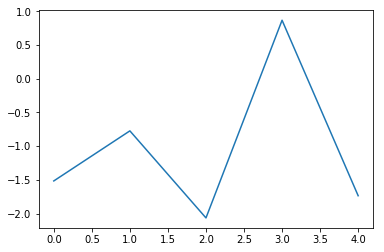

In [57]:
normals = pd.Series(np.random.normal(size=5))
normals.plot()

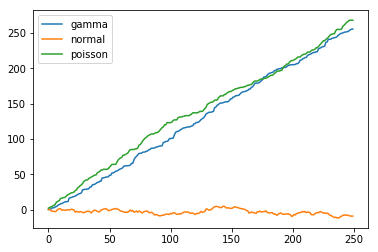

In [58]:
primjer = pd.DataFrame({'normal': np.random.normal(size=250), 
                       'gamma': np.random.gamma(1, size=250), 
                       'poisson': np.random.poisson(size=250)})
primjer.cumsum(0).plot()

Ovdje vidimo na nekim standardnim crtanjima da se mogu i dalje koristiti objekti za spremanje podataka koje smo koristili u prethodnom poglavlju. 

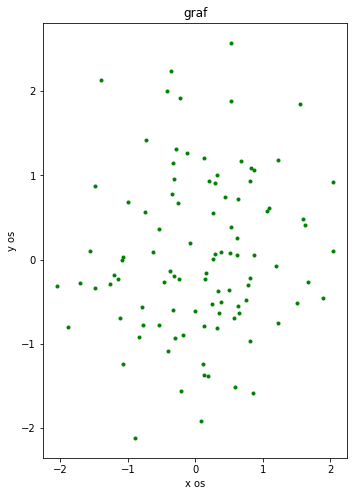

In [59]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('x os')
    ax1.set_ylabel('y os')
    ax1.set_title("graf")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'g.')

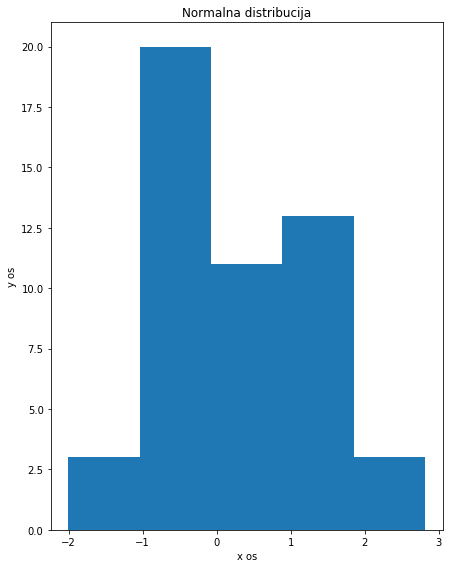

In [60]:
    fig = plt.figure(figsize=(12,8))
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=50), bins=5)
    ax2.set_xlabel('x os')
    ax2.set_ylabel('y os')
    ax2.set_title("Normalna distribucija")
    plt.tight_layout()
    plt.savefig("normal.png", dpi=150)

Ovdje smo vidjeli dva standardna oblika grafova, jedan scaterplot i histogram. Oni se često koriste u statistici. 